In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os


# Color Test

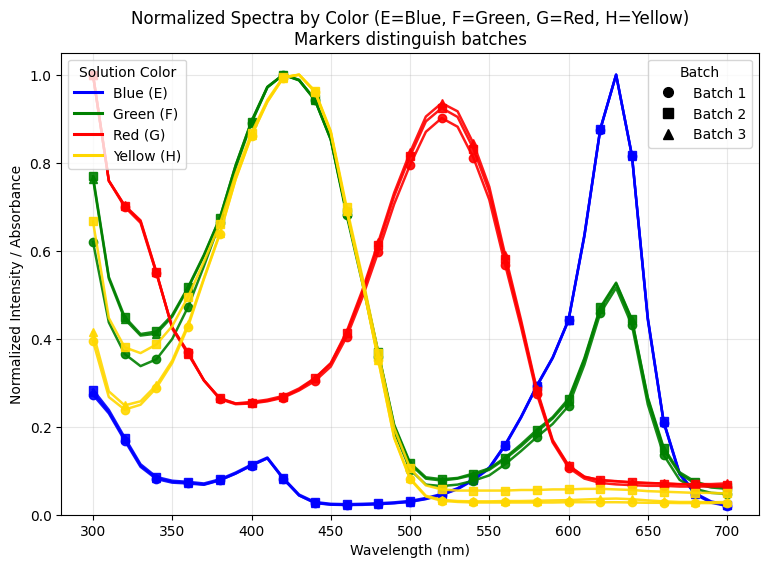

In [3]:
# Load data
df = pd.read_csv('Fractions_August19_2025.csv')

# Configs from your instruction
solution_colors = {
    "E": "blue",   # Blue
    "F": "green",  # Green
    "G": "red",    # Red
    "H": "gold"    # Yellow
}
# Batches in the file: 1 (Batch 1), 3 (Batch 2), 5 (Batch 3 per your latest note)
batch_cols = ["1", "3", "5"]
batch_labels = {"1": "Batch 1", "3": "Batch 2", "5": "Batch 3"}
batch_markers = {"1": "o", "3": "s", "5": "^"}

# Normalize helper (per-curve max)
def normalize_series(s: pd.Series) -> pd.Series:
    m = s.max()
    if pd.isna(m) or m == 0:
        return s * 0
    return s / m

w = df["Wavelength"]

plt.figure(figsize=(9, 6))

# Plot all four color families on the same axes
for base in ["E", "F", "G", "H"]:
    for b in batch_cols:
        col = f"{base}{b}"
        if col in df.columns:
            y = normalize_series(df[col])
            plt.plot(
                w, y,
                color=solution_colors[base],
                marker=batch_markers[b],
                markevery=max(len(w)//18, 1),  # sprinkle markers, not every point
                linewidth=1.8,
                alpha=0.9
            )

plt.title("Normalized Spectra by Color (E=Blue, F=Green, G=Red, H=Yellow)\nMarkers distinguish batches")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Intensity / Absorbance")
plt.ylim(0, 1.05)
plt.grid(True, alpha=0.3)

# Build two clean legends: one for colors, one for batches
color_handles = [
    Line2D([0], [0], color=solution_colors[c], lw=2.2, label={"E":"Blue (E)", "F":"Green (F)", "G":"Red (G)", "H":"Yellow (H)"}[c])
    for c in ["E", "F", "G", "H"]
]
batch_handles = [
    Line2D([0], [0], color="black", marker=batch_markers[b], linestyle="None", label=batch_labels[b], markersize=7)
    for b in batch_cols
]

leg1 = plt.legend(handles=color_handles, loc="upper left", title="Solution Color")
plt.gca().add_artist(leg1)
plt.legend(handles=batch_handles, loc="upper right", title="Batch")
plt.show()



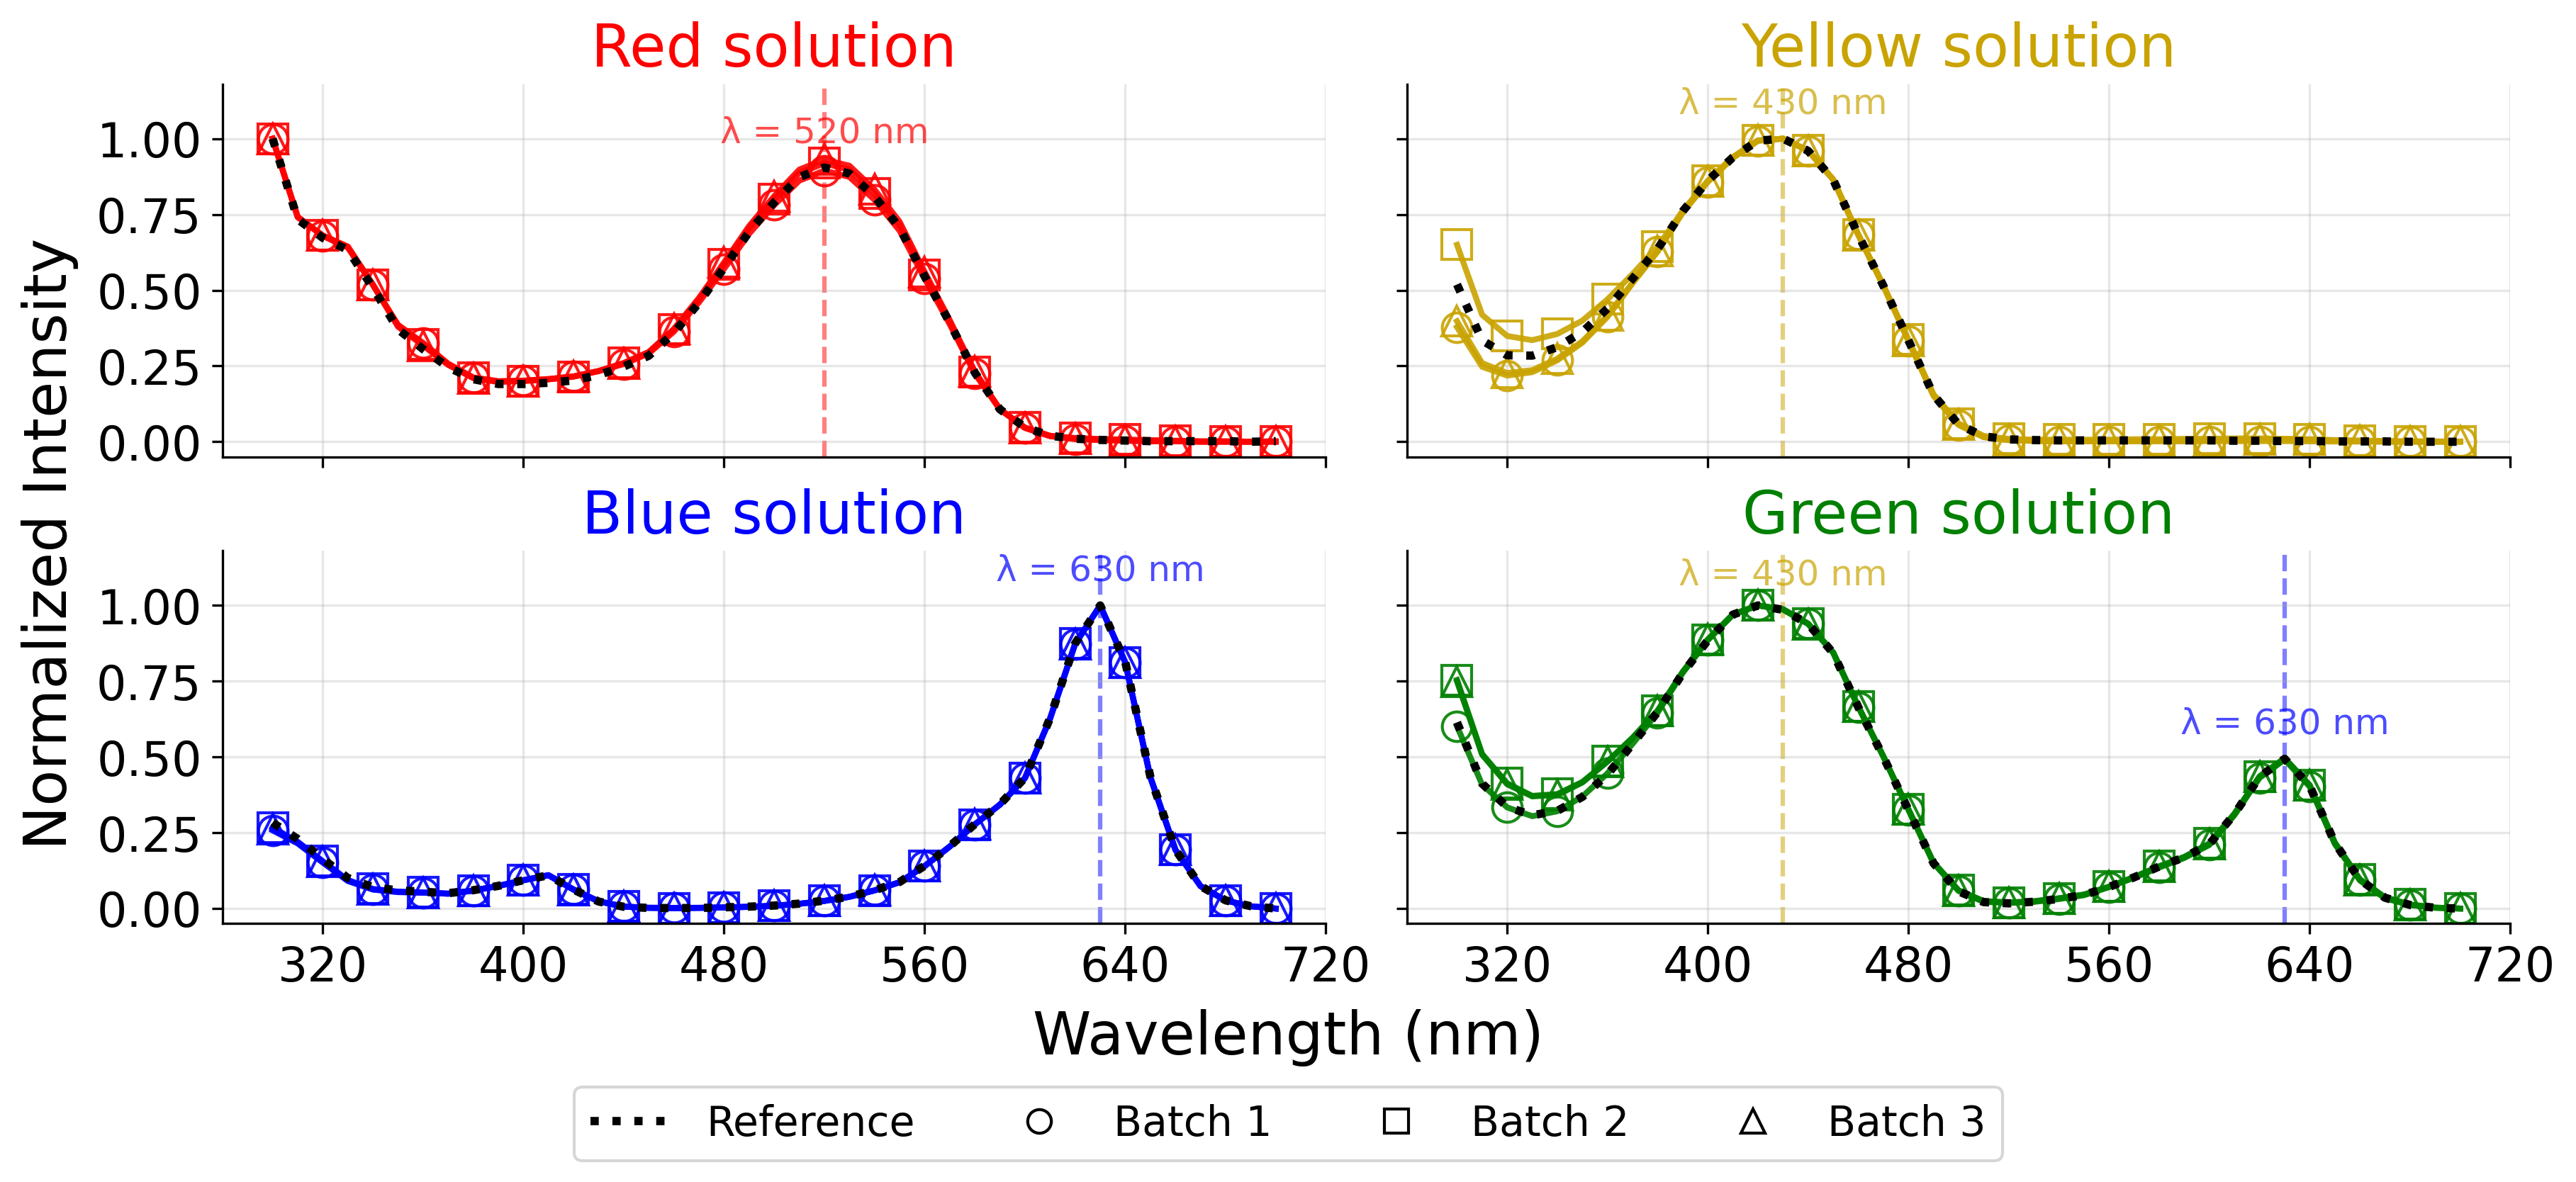

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator

# Load
df = pd.read_csv("Fractions_August19_2025.csv")
w = df["Wavelength"].values

solution_colors = {
    "E": "blue",
    "F": "green",
    "G": "red",
    "H": "#C9A300"  # darker gold/yellow for better visibility
}

panel_titles = {"E": "Blue", "F": "Green", "G": "Red", "H": "Yellow"}
batch_cols = ["1","3","5"]
batch_labels = {"1":"Batch 1","3":"Batch 2","5":"Batch 3"}
batch_markers = {"1":"o","3":"s","5":"^"}
ref_suffix = "12"

def minmax_normalize(y):
    y = np.asarray(y, float)
    r = y.max() - y.min()
    return (y - y.min())/r if r != 0 else np.zeros_like(y)

def find_peak_xy(wl, y, lo=350, hi=700):
    m = (wl>=lo) & (wl<=hi)
    if not np.any(m): return None
    i = np.nanargmax(y[m])
    return float(wl[m][i]), float(y[m][i])

fig, axes = plt.subplots(2,2, figsize=(12,5), sharex=True, sharey=True, constrained_layout=True, dpi = 300, facecolor='white')
axes = axes.flatten()
mark_every = max(len(w)//20, 1)

for i, base in enumerate(["G","H","E","F"]):
    ax = axes[i]

    # Reference
    ref_col = f"{base}{ref_suffix}"
    if ref_col in df.columns:
        y_ref = minmax_normalize(df[ref_col].values)
        ax.plot(w, y_ref, color="black", linestyle=":", linewidth=2.8,
                label="Reference", zorder=3)

        if base == "F":  # Green panel: show yellow@420 and blue@630
            # (target_nm, color_key)
            for target, ckey in [(430, "H"), (630, "E")]:
                idx = (np.abs(w - target)).argmin()
                px, py = w[idx], y_ref[idx]
                ax.axvline(px, color=solution_colors[ckey],
                        linewidth=1.5, linestyle="--", zorder=1, alpha=0.5)
                ax.text(px, min(py + 0.06, 1.1), f"λ = {int(round(px))} nm",
                        ha="center", va="bottom", fontsize=12,
                        color=solution_colors[ckey], alpha=0.7)
        else:
            # Other panels: line + label in the panel's own color
            pk = find_peak_xy(w, y_ref, lo=340, hi=720)
            if pk:
                px, py = pk
                ax.axvline(px, color=solution_colors[base],
                        linewidth=1.5, linestyle="--", zorder=1, alpha=0.5)
                ax.text(px, min(py + 0.06, 1.1), f"λ = {int(round(px))} nm",
                        ha="center", va="bottom", fontsize=12,
                        color=solution_colors[base], alpha=0.7)

    # Batches
    for b in batch_cols:
        col = f"{base}{b}"
        if col in df.columns:
            y = minmax_normalize(df[col].values)
            ax.plot(
                w, y,
                color=solution_colors[base],        # line color
                marker=batch_markers[b],
                markevery=mark_every,
                linewidth=2.0,
                alpha=0.9,
                label=batch_labels[b],
                zorder=2,
                markerfacecolor='none',             # <-- hollow markers
                markeredgecolor=solution_colors[base],
                markersize=10
            )


    ax.set_title(f"{panel_titles[base]} solution", fontsize=20, pad=6, c = solution_colors[base])
    ax.grid(alpha=0.3)
    ax.set_ylim(-0.05, 1.18)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.xaxis.set_major_locator(MaxNLocator(nbins=6, integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
    ax.tick_params(labelsize=16)

fig.supxlabel("Wavelength (nm)", fontsize=20)
fig.supylabel("Normalized Intensity", fontsize=20)

handles = [Line2D([0],[0], color="black", linestyle=":", lw=2.8, label="Reference")] + [
    Line2D([0],[0],
           color="black",
           marker=batch_markers[b],
           linestyle="None",
           lw=2,
           label=batch_labels[b],
           markerfacecolor='none',
           markeredgecolor="black",
           markersize=8)
    for b in batch_cols
]

fig.legend(handles=handles, loc="lower center", ncol=4,
           fontsize=14, bbox_to_anchor=(0.5, -0.1))

plt.show()


# Volume Accuracy

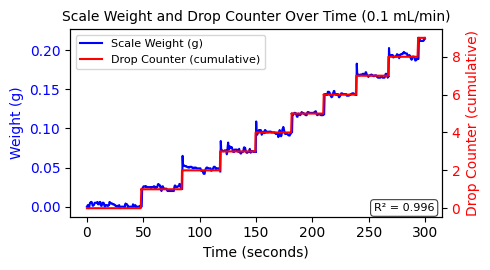

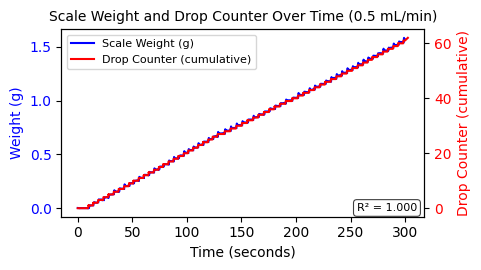

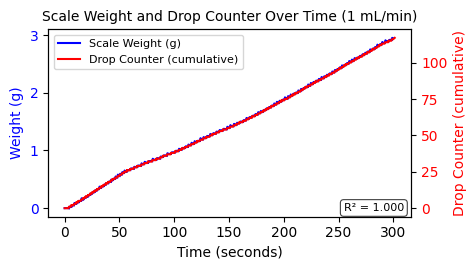

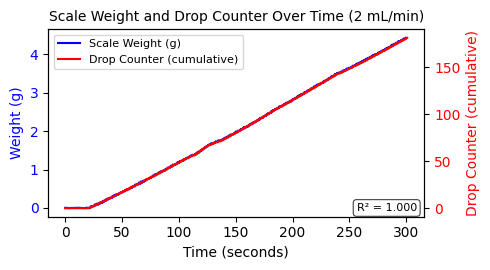

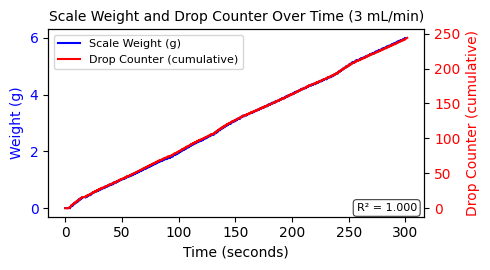

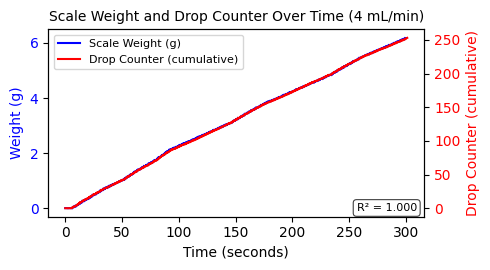

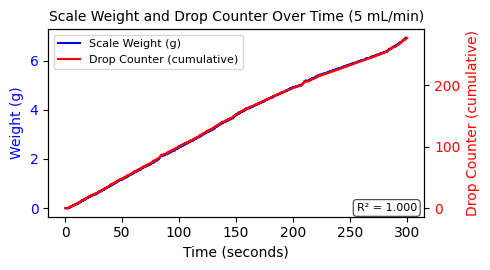

In [14]:
import os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === File List (in desired order) ===
csv_files = [
    "volume_accuracy_01ml_per_min.csv",
    "volume_accuracy_05ml_per_min.csv",
    "volume_accuracy_1ml_per_min.csv",
    "volume_accuracy_2ml_per_min.csv",
    "volume_accuracy_3ml_per_min.csv",
    "volume_accuracy_4ml_per_min.csv",
    "volume_accuracy_5ml_per_min.csv"
]

def _linfit_r2(x, y):
    """Return slope, intercept, R^2 for y ~ a*x + b using finite points only."""
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() < 2:
        return np.nan, np.nan, np.nan
    a, b = np.polyfit(x[mask], y[mask], 1)
    yhat = a * x[mask] + b
    ss_res = np.sum((y[mask] - yhat)**2)
    ss_tot = np.sum((y[mask] - y[mask].mean())**2)
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan
    return a, b, r2

def _pretty_rate_label(file):
    """Produce a label like '0.1 mL/min' or '2 mL/min' from filename."""
    m = re.search(r"volume_accuracy_(.+?)_per_min\.csv$", file)
    rate = m.group(1) if m else ""
    num = rate.replace("ml", "")
    if len(num) == 2 and num.startswith("0"):   # '01' -> '0.1', '05' -> '0.5'
        num_val = f"0.{num[1]}"
    else:
        num_val = num
    return f"{num_val} mL/min"

def _get_drop_series(df):
    """Return cumulative drop counter, tolerant to column naming."""
    for col in ["drop_counter", "vernier_drop", "drops"]:
        if col in df.columns:
            return pd.to_numeric(df[col], errors="coerce").ffill().fillna(0)
    raise KeyError("No drop counter column found (expected 'drop_counter' or 'vernier_drop').")

# === Plotting Function ===
def plot_volume_accuracy(file):
    label = _pretty_rate_label(file)

    # Load CSV
    df = pd.read_csv(file)
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

    # Prepare series (full series; no shifting)
    weight = pd.to_numeric(df["weight"], errors="coerce")
    drops = _get_drop_series(df)

    # Time from first timestamp
    df["time_sec"] = (df["timestamp"] - df["timestamp"].iloc[0]).dt.total_seconds()

    # R^2 between scale weight and drop counter
    _, _, r2 = _linfit_r2(drops, weight)

    # Compact plot
    fig, ax1 = plt.subplots(figsize=(5.0, 2.8))
    ax1.plot(df["time_sec"], weight, color="blue", label="Scale Weight (g)")
    ax1.set_xlabel("Time (seconds)")
    ax1.set_ylabel("Weight (g)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    ax2 = ax1.twinx()
    ax2.plot(df["time_sec"], drops, color="red", label="Drop Counter (cumulative)")
    ax2.set_ylabel("Drop Counter (cumulative)", color="red")
    ax2.tick_params(axis="y", labelcolor="red")

    # Combined legend
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left", fontsize=8)

    # R^2 annotation only
    ax1.text(
        0.98, 0.02, f"R² = {r2:.3f}" if np.isfinite(r2) else "R² = n/a",
        transform=ax1.transAxes, ha="right", va="bottom", fontsize=8,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.75, linewidth=0.8)
    )

    plt.title(f"Scale Weight and Drop Counter Over Time ({label})", fontsize=10)
    plt.tight_layout()
    plt.show()
    plt.close(fig)

# === Run the plotting for all files ===
for file in csv_files:
    if os.path.exists(file):
        plot_volume_accuracy(file)
    else:
        print(f"File not found: {file}")


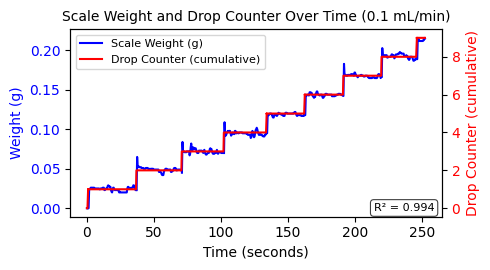

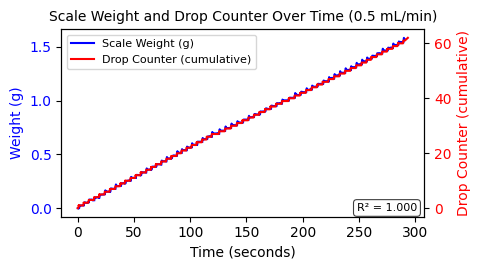

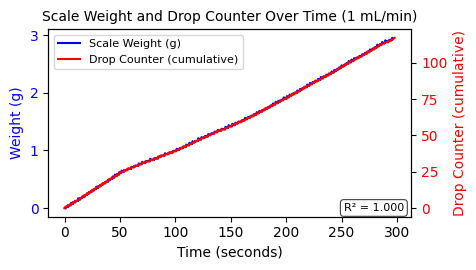

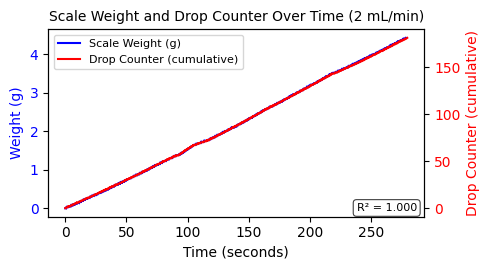

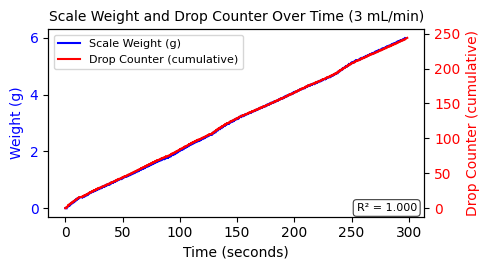

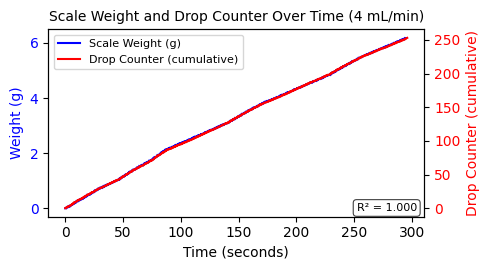

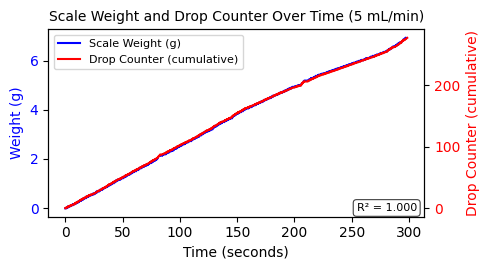

In [75]:
import os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === File List (in desired order) ===
csv_files = [
    "volume_accuracy_01ml_per_min.csv",
    "volume_accuracy_05ml_per_min.csv",
    "volume_accuracy_1ml_per_min.csv",
    "volume_accuracy_2ml_per_min.csv",
    "volume_accuracy_3ml_per_min.csv",
    "volume_accuracy_4ml_per_min.csv",
    "volume_accuracy_5ml_per_min.csv"
]

def _linfit_r2(x, y):
    """Return slope, intercept, R^2 for y ~ a*x + b using finite points only."""
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() < 2:
        return np.nan, np.nan, np.nan
    a, b = np.polyfit(x[mask], y[mask], 1)
    yhat = a * x[mask] + b
    ss_res = np.sum((y[mask] - yhat)**2)
    ss_tot = np.sum((y[mask] - y[mask].mean())**2)
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan
    return a, b, r2

def _pretty_rate_label(file):
    """Produce a label like '0.1 mL/min' or '2 mL/min' from filename."""
    m = re.search(r"volume_accuracy_(.+?)_per_min\.csv$", file)
    rate = m.group(1) if m else ""
    num = rate.replace("ml", "")
    if len(num) == 2 and num.startswith("0"):   # '01' -> '0.1', '05' -> '0.5'
        num_val = f"0.{num[1]}"
    else:
        num_val = num
    return f"{num_val} mL/min"

def _get_drop_series(df):
    """Return cumulative drop counter, tolerant to column naming."""
    for col in ["drop_counter", "vernier_drop", "drops"]:
        if col in df.columns:
            return pd.to_numeric(df[col], errors="coerce").ffill().fillna(0)
    raise KeyError("No drop counter column found (expected 'drop_counter' or 'vernier_drop').")

def _first_drop_index(drops: pd.Series) -> int:
    """Index of first positive increment in the cumulative counter."""
    d = drops.to_numpy()
    diffs = np.diff(d, prepend=d[0])
    pos = np.flatnonzero(diffs > 0)
    return int(pos[0]) if len(pos) else 0

# === Plotting Function (start 1s before first drop, re-zero drops at new start) ===
def plot_volume_accuracy(file):
    label = _pretty_rate_label(file)

    # Load CSV
    df = pd.read_csv(file)

    # Force proper datetime; coerce bad rows to NaT
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
    if df["timestamp"].isna().all():
        print(f"[WARN] All timestamps NaT in {file}; skipping.")
        return

    # Prepare series
    weight = pd.to_numeric(df["weight"], errors="coerce")
    drops  = _get_drop_series(df)

    # Find first detected drop (first positive increment)
    i_first = _first_drop_index(drops)
    first_ts = df["timestamp"].iloc[i_first]
    if pd.isna(first_ts):
        # fallback: first non-NaT timestamp
        first_ts = df["timestamp"].dropna().iloc[0]

    # Start 1s earlier than first drop (datetime-aware search)
    start_ts = first_ts - pd.Timedelta(seconds=1)
    # Use Pandas Series.searchsorted (handles datetime64[ns] safely)
    start_idx = int(df["timestamp"].searchsorted(start_ts, side="left"))

    # Slice from start_idx onward
    df = df.iloc[start_idx:].copy()
    weight = weight.iloc[start_idx:].reset_index(drop=True)
    drops  = drops.iloc[start_idx:].reset_index(drop=True)

    if len(df) < 2:
        print(f"[WARN] Not enough data after shifting in {file}; skipping plot.")
        return

    # Recompute time axis (t=0 at start) and re-zero drops
    df["time_sec"] = (df["timestamp"] - df["timestamp"].iloc[0]).dt.total_seconds()
    drops = drops - drops.iloc[0]

    # R^2 in shifted window
    _, _, r2 = _linfit_r2(drops, weight)

    # Compact plot
    fig, ax1 = plt.subplots(figsize=(5.0, 2.8))
    ax1.plot(df["time_sec"], weight, color="blue", label="Scale Weight (g)")
    ax1.set_xlabel("Time (seconds)")
    ax1.set_ylabel("Weight (g)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    #ax1.set_ylim(-0.350, 7.275)

    ax2 = ax1.twinx()
    ax2.plot(df["time_sec"], drops, color="red", label="Drop Counter (cumulative)")
    ax2.set_ylabel("Drop Counter (cumulative)", color="red")
    ax2.tick_params(axis="y", labelcolor="red")
    #ax2.set_ylim(-13.850, 290.850)

    # Combined legend
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left", fontsize=8)

    # R^2 annotation only
    ax1.text(
        0.98, 0.02, f"R² = {r2:.3f}" if np.isfinite(r2) else "R² = n/a",
        transform=ax1.transAxes, ha="right", va="bottom", fontsize=8,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.75, linewidth=0.8)
    )

    plt.title(f"Scale Weight and Drop Counter Over Time ({label})", fontsize=10)
    plt.tight_layout()
    plt.show()
    plt.close(fig)

# === Run the plotting for all files ===
for file in csv_files:
    if os.path.exists(file):
        plot_volume_accuracy(file)
    else:
        print(f"File not found: {file}")


Left (weight) ylim:  -0.350, 7.275
Right (drops)  ylim: -13.850, 290.850


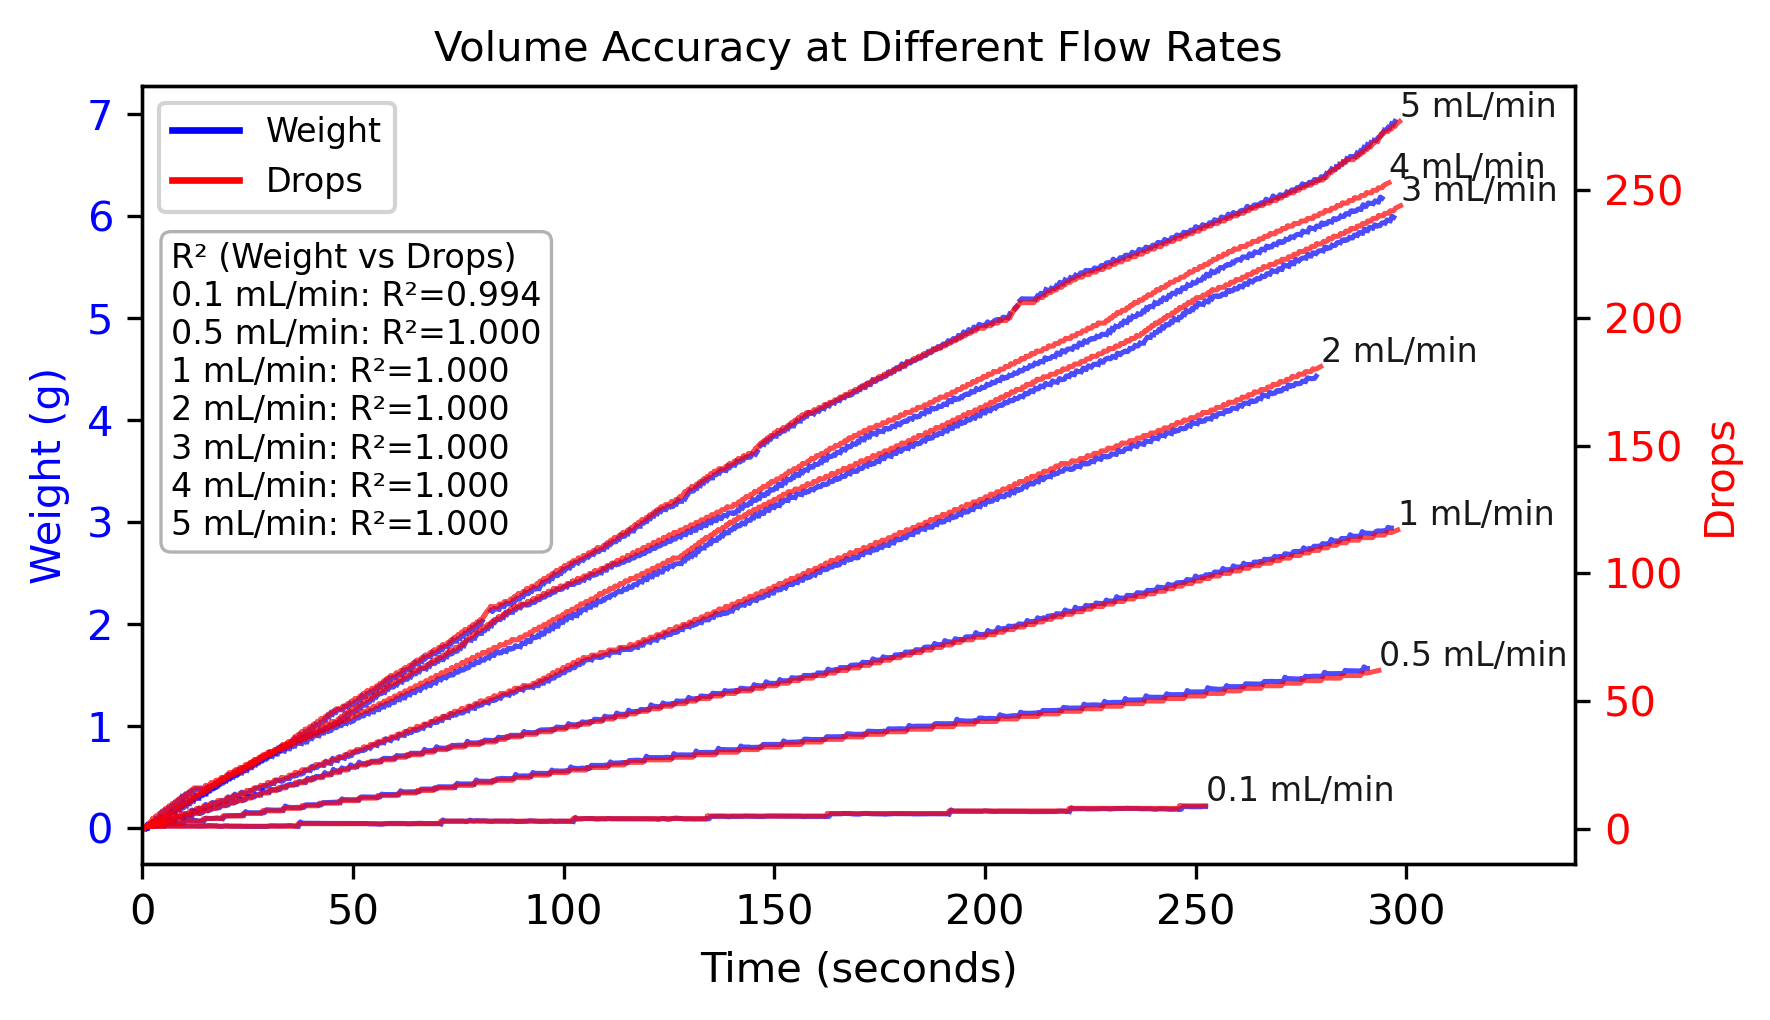

In [1]:
import os, re, itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# === File List (in desired order) ===
csv_files = [
    "volume_accuracy_01ml_per_min.csv",
    "volume_accuracy_05ml_per_min.csv",
    "volume_accuracy_1ml_per_min.csv",
    "volume_accuracy_2ml_per_min.csv",
    "volume_accuracy_3ml_per_min.csv",
    "volume_accuracy_4ml_per_min.csv",
    "volume_accuracy_5ml_per_min.csv"
]

def _linfit_r2(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    m = np.isfinite(x) & np.isfinite(y)
    if m.sum() < 2:
        return np.nan, np.nan, np.nan
    a, b = np.polyfit(x[m], y[m], 1)
    yhat = a * x[m] + b
    ss_res = np.sum((y[m] - yhat)**2)
    ss_tot = np.sum((y[m] - y[m].mean())**2)
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan
    return a, b, r2

def _pretty_rate_label(file):
    m = re.search(r"volume_accuracy_(.+?)_per_min\.csv$", file)
    rate = m.group(1) if m else ""
    num = rate.replace("ml", "")
    if len(num) == 2 and num.startswith("0"):   # '01' -> 0.1, '05' -> 0.5
        num_val = f"0.{num[1]}"
    else:
        num_val = num
    return f"{num_val} mL/min"

def _get_drop_series(df):
    for col in ["drop_counter", "vernier_drop", "drops"]:
        if col in df.columns:
            return pd.to_numeric(df[col], errors="coerce").ffill().fillna(0)
    raise KeyError("No drop counter column found (expected 'drop_counter' or 'vernier_drop').")

def _first_drop_index(drops: pd.Series) -> int:
    d = drops.to_numpy()
    diffs = np.diff(d, prepend=d[0])
    pos = np.flatnonzero(diffs > 0)
    return int(pos[0]) if len(pos) else 0

# === Plot ALL flow rates on one figure (shift to 1s before first drop, re-zero drops) ===
def plot_all_volume_accuracy(files):
    records = []
    for file in files:
        if not os.path.exists(file):
            print(f"[WARN] File not found: {file}")
            continue

        df = pd.read_csv(file)
        if "timestamp" not in df.columns or "weight" not in df.columns:
            print(f"[WARN] Missing required columns in {file}; skipping.")
            continue

        df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
        if df["timestamp"].isna().all():
            print(f"[WARN] All timestamps NaT in {file}; skipping.")
            continue

        weight = pd.to_numeric(df["weight"], errors="coerce")
        drops  = _get_drop_series(df)

        # Shift start: 1 s before first detected drop
        i_first = _first_drop_index(drops)
        first_ts = df["timestamp"].iloc[i_first]
        if pd.isna(first_ts):
            first_ts = df["timestamp"].dropna().iloc[0]
        start_ts = first_ts - pd.Timedelta(seconds=1)
        start_idx = int(df["timestamp"].searchsorted(start_ts, side="left"))

        df = df.iloc[start_idx:].copy()
        if len(df) < 2:
            print(f"[WARN] Not enough data after shifting in {file}; skipping.")
            continue

        weight = weight.iloc[start_idx:].reset_index(drop=True)
        drops  = drops.iloc[start_idx:].reset_index(drop=True)

        df["time_sec"] = (df["timestamp"] - df["timestamp"].iloc[0]).dt.total_seconds()
        drops = drops - drops.iloc[0]

        _, _, r2 = _linfit_r2(drops, weight)

        records.append(dict(
            label=_pretty_rate_label(file),
            t=df["time_sec"].to_numpy(),
            w=weight.to_numpy(),
            d=drops.to_numpy(),
            r2=r2
        ))

    if not records:
        print("[WARN] No valid files to plot.")
        return

    fig, ax1 = plt.subplots(figsize=(6, 3.5), dpi=300)
    ax2 = ax1.twinx()

    # Plot each series with solid lines
    for rec in records:
        ax1.plot(rec["t"], rec["w"], linestyle="-", color="blue", linewidth=1.2, alpha=0.7)
        ax2.plot(rec["t"], rec["d"], linestyle="-", color="red",  linewidth=1.2, alpha=0.7)

    # Axis labels
    ax1.set_xlabel("Time (seconds)")
    ax1.set_ylabel("Weight (g)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    ax2.set_ylabel("Drops", color="red")
    ax2.tick_params(axis="y", labelcolor="red")
    wmin, wmax = ax1.get_ylim()
    dmin, dmax = ax2.get_ylim()
    print(f"Left (weight) ylim:  {wmin:.3f}, {wmax:.3f}")
    print(f"Right (drops)  ylim: {dmin:.3f}, {dmax:.3f}")

    # Simple 2-item legend
    legend_lines = [
        Line2D([0], [0], color="blue", linewidth=1.6, label="Weight"),
        Line2D([0], [0], color="red",  linewidth=1.6, label="Drops"),
    ]
    ax1.legend(handles=legend_lines, loc="upper left", fontsize=8, framealpha=0.85)

    # Offsets for annotations
    w_all = [rec["w"] for rec in records if len(rec["w"]) > 0]
    d_all = [rec["d"] for rec in records if len(rec["d"]) > 0]
    if w_all:
        w_concat = np.concatenate(w_all)
        wy = np.nanmax(w_concat) - np.nanmin(w_concat)
        w_offset = 0.02 * wy if np.isfinite(wy) and wy > 0 else 0.0
    else:
        w_offset = 0.0
    if d_all:
        d_concat = np.concatenate(d_all)
        dy = np.nanmax(d_concat) - np.nanmin(d_concat)
        d_offset = 0.02 * dy if np.isfinite(dy) and dy > 0 else 0.0
    else:
        d_offset = 0.0

    # Flow-rate annotations (at last point of each curve)
    for rec in records:
        xt = rec["t"][-1]
        # label on drops axis
        ax2.text(xt, rec["d"][-1] + d_offset, rec["label"],
                 color="black", fontsize=8, ha="left", va="center", alpha=0.9,
                 bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0, linewidth=0.0))

    # R² summary box (optional)
    r2_lines = [f"{rec['label']}: R²={rec['r2']:.3f}" if np.isfinite(rec['r2']) else f"{rec['label']}: R²=n/a"
                for rec in records]
    ax1.text(
        0.02, 0.8, "R² (Weight vs Drops)\n" + "\n".join(r2_lines),
        transform=ax1.transAxes, ha="left", va="top", fontsize=8,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.3, linewidth=0.8)
    )

    plt.title("Volume Accuracy at Different Flow Rates", fontsize=10)
    plt.tight_layout()
    plt.xlim(0, 340)
    plt.show()
    plt.close(fig)

# === Run ===
plot_all_volume_accuracy(csv_files)


Left (weight) ylim:  -0.350, 7.275
Right (drops)  ylim: -13.850, 290.850


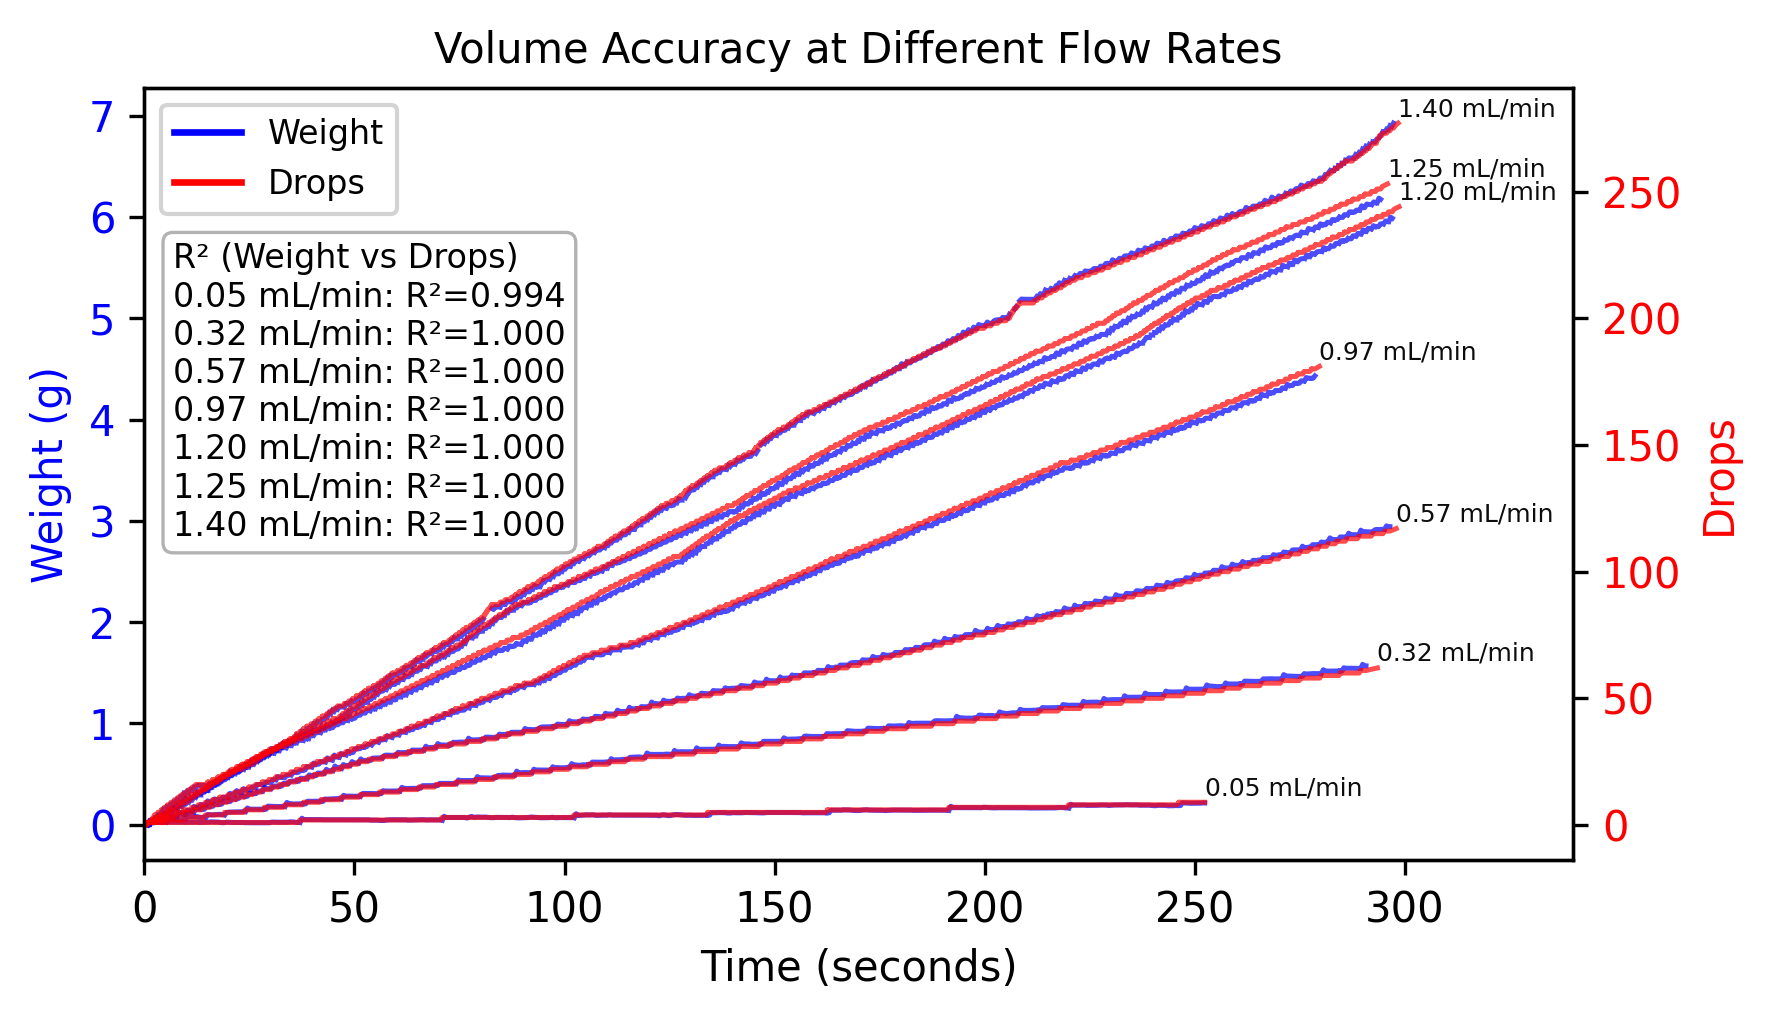

In [12]:
import os, re, itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# === File List (in desired order) ===
csv_files = [
    "volume_accuracy_01ml_per_min.csv",
    "volume_accuracy_05ml_per_min.csv",
    "volume_accuracy_1ml_per_min.csv",
    "volume_accuracy_2ml_per_min.csv",
    "volume_accuracy_3ml_per_min.csv",
    "volume_accuracy_4ml_per_min.csv",
    "volume_accuracy_5ml_per_min.csv"
]

DENSITY_G_PER_ML = 1.0  # change if your fluid is not ~1 g/mL

def _linfit_r2(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    m = np.isfinite(x) & np.isfinite(y)
    if m.sum() < 2:
        return np.nan, np.nan, np.nan
    a, b = np.polyfit(x[m], y[m], 1)
    yhat = a * x[m] + b
    ss_res = np.sum((y[m] - yhat)**2)
    ss_tot = np.sum((y[m] - y[m].mean())**2)
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan
    return a, b, r2

def _pretty_rate_label(file):
    m = re.search(r"volume_accuracy_(.+?)_per_min\.csv$", file)
    rate = m.group(1) if m else ""
    num = rate.replace("ml", "")
    if len(num) == 2 and num.startswith("0"):   # '01' -> 0.1, '05' -> 0.5
        num_val = f"0.{num[1]}"
    else:
        num_val = num
    return f"{num_val} mL/min"

def _expected_rate_value(file):
    m = re.search(r"volume_accuracy_(.+?)_per_min\.csv$", file)
    rate = m.group(1) if m else ""
    num = rate.replace("ml", "")
    if len(num) == 2 and num.startswith("0"):
        return float(f"0.{num[1]}")
    return float(num)

def _get_drop_series(df):
    for col in ["drop_counter", "vernier_drop", "drops"]:
        if col in df.columns:
            return pd.to_numeric(df[col], errors="coerce").ffill().fillna(0)
    raise KeyError("No drop counter column found (expected 'drop_counter' or 'vernier_drop').")

def _first_drop_index(drops: pd.Series) -> int:
    d = drops.to_numpy()
    diffs = np.diff(d, prepend=d[0])
    pos = np.flatnonzero(diffs > 0)
    return int(pos[0]) if len(pos) else 0

# === Plot ALL flow rates on one figure (shift to 1s before first drop, re-zero drops) ===
def plot_all_volume_accuracy(files):
    records = []
    for file in files:
        if not os.path.exists(file):
            print(f"[WARN] File not found: {file}")
            continue

        df = pd.read_csv(file)
        if "timestamp" not in df.columns or "weight" not in df.columns:
            print(f"[WARN] Missing required columns in {file}; skipping.")
            continue

        df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
        if df["timestamp"].isna().all():
            print(f"[WARN] All timestamps NaT in {file}; skipping.")
            continue

        weight = pd.to_numeric(df["weight"], errors="coerce")
        drops  = _get_drop_series(df)

        # Shift start: 1 s before first detected drop
        i_first = _first_drop_index(drops)
        first_ts = df["timestamp"].iloc[i_first]
        if pd.isna(first_ts):
            first_ts = df["timestamp"].dropna().iloc[0]
        start_ts = first_ts - pd.Timedelta(seconds=1)
        start_idx = int(df["timestamp"].searchsorted(start_ts, side="left"))

        df = df.iloc[start_idx:].copy()
        if len(df) < 2:
            print(f"[WARN] Not enough data after shifting in {file}; skipping.")
            continue

        weight = weight.iloc[start_idx:].reset_index(drop=True)
        drops  = drops.iloc[start_idx:].reset_index(drop=True)

        df["time_sec"] = (df["timestamp"] - df["timestamp"].iloc[0]).dt.total_seconds()
        drops = drops - drops.iloc[0]

        # Correlation between drops and weight (unchanged)
        _, _, r2_dw = _linfit_r2(drops, weight)

        # --- NEW: flow from weight vs time
        a_wt, b_wt, r2_wt = _linfit_r2(df["time_sec"].to_numpy(), weight.to_numpy())  # a_wt = g/s
        flow_ml_min = (a_wt * 60.0) / DENSITY_G_PER_ML if np.isfinite(a_wt) else np.nan
        expected = _expected_rate_value(file)

        records.append(dict(
            label=_pretty_rate_label(file),
            t=df["time_sec"].to_numpy(),
            w=weight.to_numpy(),
            d=drops.to_numpy(),
            r2=r2_dw,
            flow_ml_min=flow_ml_min,
            expected_ml_min=expected
        ))

    if not records:
        print("[WARN] No valid files to plot.")
        return

    fig, ax1 = plt.subplots(figsize=(6, 3.5), dpi=300)
    ax2 = ax1.twinx()

    # Plot each series with solid lines
    for rec in records:
        ax1.plot(rec["t"], rec["w"], linestyle="-", color="blue", linewidth=1.2, alpha=0.7)
        ax2.plot(rec["t"], rec["d"], linestyle="-", color="red",  linewidth=1.2, alpha=0.7)

    # Axis labels
    ax1.set_xlabel("Time (seconds)")
    ax1.set_ylabel("Weight (g)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    ax2.set_ylabel("Drops", color="red")
    ax2.tick_params(axis="y", labelcolor="red")
    wmin, wmax = ax1.get_ylim()
    dmin, dmax = ax2.get_ylim()
    print(f"Left (weight) ylim:  {wmin:.3f}, {wmax:.3f}")
    print(f"Right (drops)  ylim: {dmin:.3f}, {dmax:.3f}")

    # Simple 2-item legend
    legend_lines = [
        Line2D([0], [0], color="blue", linewidth=1.6, label="Weight"),
        Line2D([0], [0], color="red",  linewidth=1.6, label="Drops"),
    ]
    ax1.legend(handles=legend_lines, loc="upper left", fontsize=8, framealpha=0.85)

    # Offsets for annotations (on drops axis)
    d_all = [rec["d"] for rec in records if len(rec["d"]) > 0]
    if d_all:
        d_concat = np.concatenate(d_all)
        dy = np.nanmax(d_concat) - np.nanmin(d_concat)
        d_offset = 0.02 * dy if np.isfinite(dy) and dy > 0 else 0.0
    else:
        d_offset = 0.0

    # Annotate each curve with expected and measured flow
    for rec in records:
        xt = rec["t"][-1]
        yt = rec["d"][-1] + d_offset
        meas_txt = f"{rec['flow_ml_min']:.2f} mL/min" if np.isfinite(rec["flow_ml_min"]) else "n/a"
        ax2.text(
            xt, yt,
            f"{meas_txt}",   # e.g., "1 mL/min → 0.98 mL/min"
            color="black", fontsize=6, ha="left", va="center", alpha=0.95,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.0, linewidth=0.0)
        )

    # R² summary (drops vs weight, unchanged)
    r2_lines = [f"{rec['flow_ml_min']:.2f} mL/min: R²={rec['r2']:.3f}" if np.isfinite(rec['r2']) else f"{rec['flow_ml_min']:.2f} : R²=n/a"
                for rec in records]
    ax1.text(
        0.02, 0.8, "R² (Weight vs Drops)\n" + "\n".join(r2_lines),
        transform=ax1.transAxes, ha="left", va="top", fontsize=8,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.3, linewidth=0.8)
    )

    plt.title("Volume Accuracy at Different Flow Rates", fontsize=10)
    plt.tight_layout()
    plt.xlim(0, 340)
    plt.show()
    plt.close(fig)

# === Run ===
plot_all_volume_accuracy(csv_files)


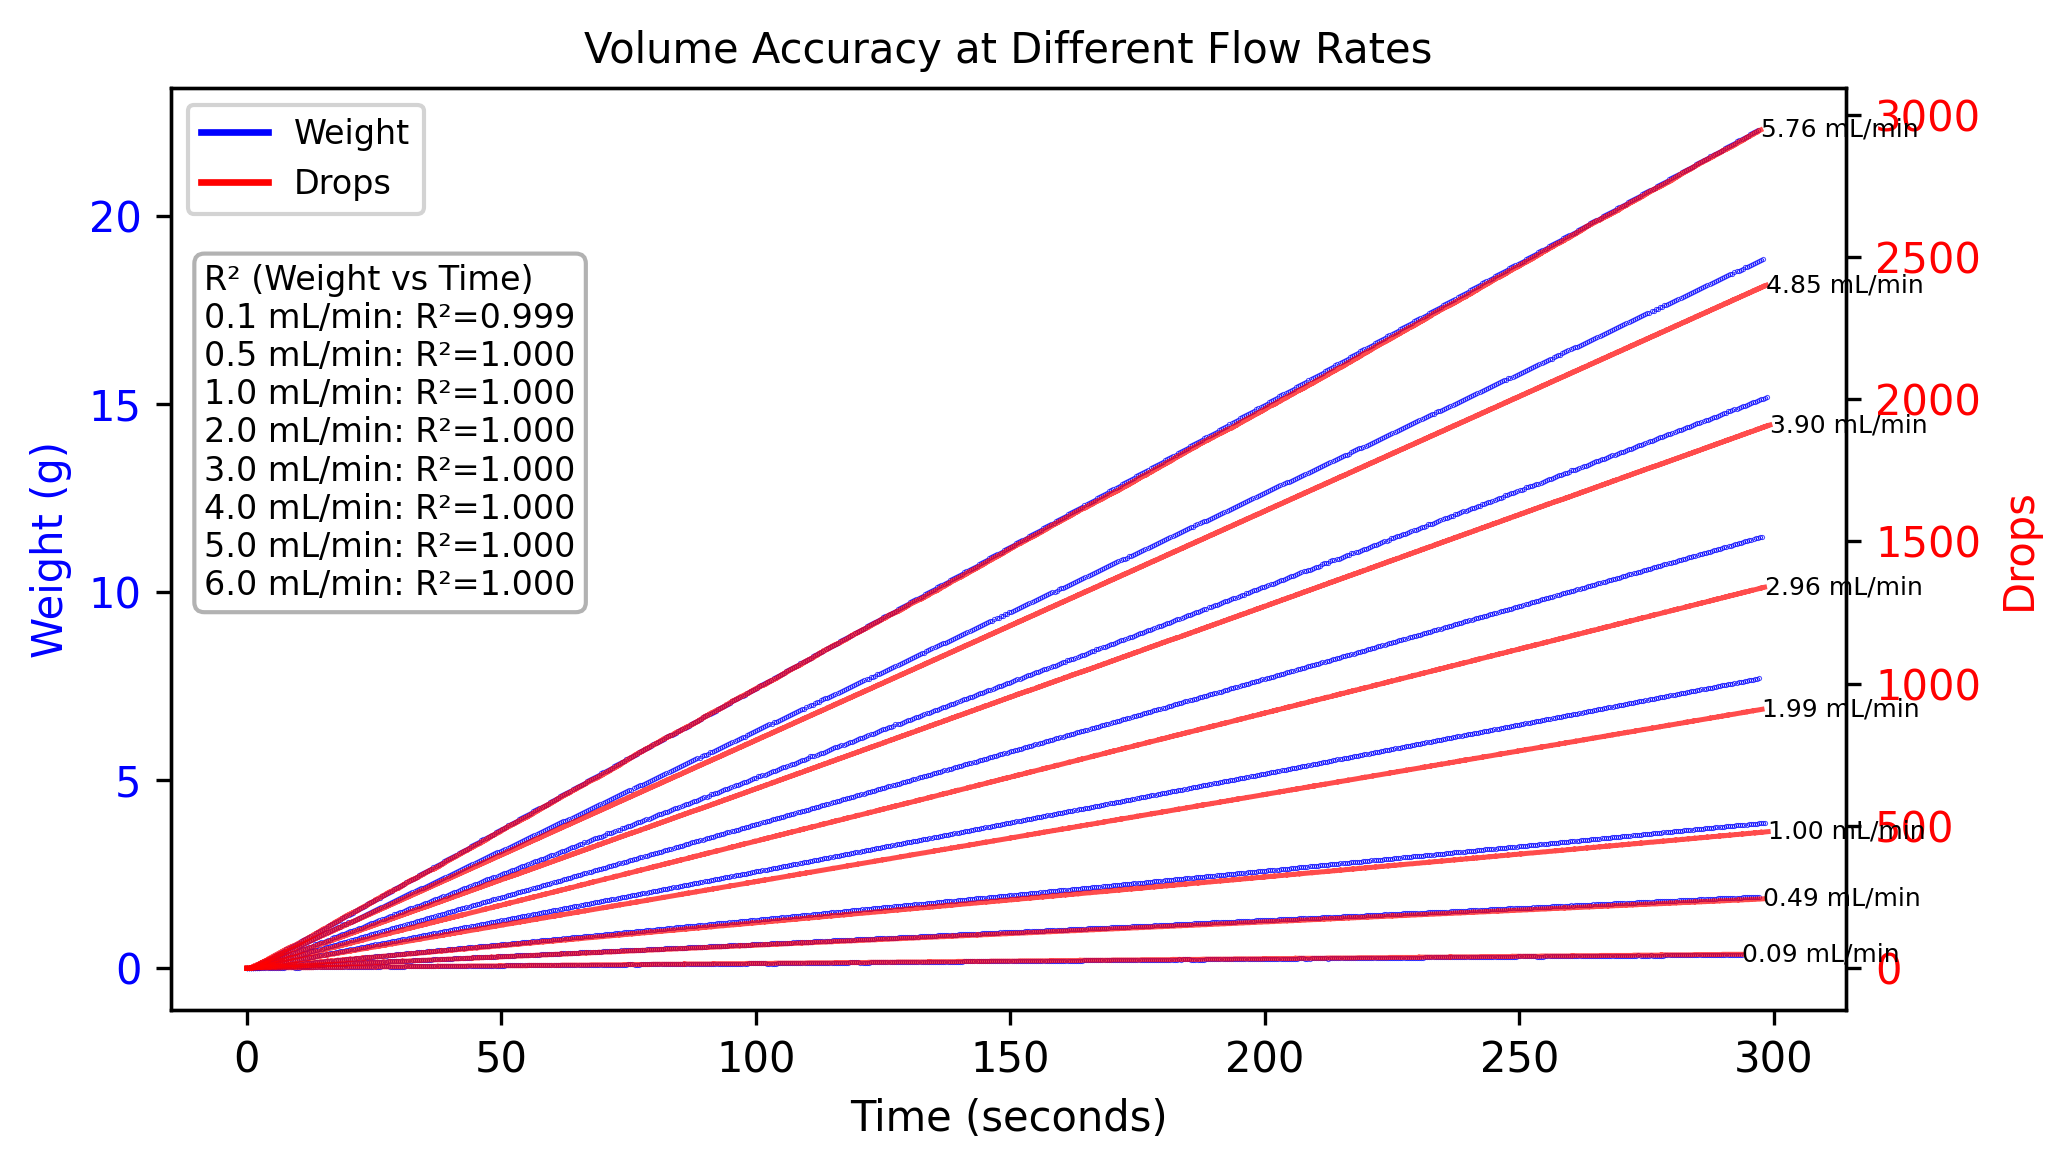

In [16]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# === File List (in desired order) ===
csv_files = [
    "viscosity_accuracy_0.1ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_0.5ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_1ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_2ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_3ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_4ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_5ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_6ml_per_min_IPA_small_1.csv"
]

DENSITY_G_PER_ML = 0.785  # g/mL, adjust if fluid density differs

# --- Helpers ---
def _linfit_r2(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() < 2:
        return np.nan, np.nan, np.nan
    a, b = np.polyfit(x[mask], y[mask], 1)
    yhat = a * x[mask] + b
    ss_res = np.sum((y[mask] - yhat) ** 2)
    ss_tot = np.sum((y[mask] - y[mask].mean()) ** 2)
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan
    return a, b, r2

def _parse_flowrate_from_filename(file):
    """
    Extract numeric flowrate from filenames like:
    viscosity_accuracy_0.1ml_per_min_IPA_small_1.csv
    """
    basename = os.path.basename(file)
    match = re.search(r"viscosity_accuracy_([\d\.]+)ml_per_min", basename)
    if not match:
        return None
    return float(match.group(1))

def _get_drop_series(df):
    for col in ["drop_counter", "vernier_drop", "drops"]:
        if col in df.columns:
            return pd.to_numeric(df[col], errors="coerce").ffill().fillna(0)
    raise KeyError("No drop counter column found. Expected 'drop_counter' or 'vernier_drop'.")

def _first_drop_index(drops: pd.Series) -> int:
    d = drops.to_numpy()
    diffs = np.diff(d, prepend=d[0])
    pos = np.flatnonzero(diffs > 0)
    return int(pos[0]) if len(pos) else 0

# --- Main Plotting Function ---
def plot_all_volume_accuracy(files):
    records = []
    
    for file in files:
        if not os.path.exists(file):
            print(f"[WARN] File not found: {file}")
            continue

        df = pd.read_csv(file)
        if "timestamp" not in df.columns or "weight" not in df.columns:
            print(f"[WARN] Missing required columns in {file}; skipping.")
            continue

        df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
        if df["timestamp"].isna().all():
            print(f"[WARN] All timestamps are NaT in {file}; skipping.")
            continue

        weight = pd.to_numeric(df["weight"], errors="coerce")
        drops = _get_drop_series(df)

        # Shift start to 1s before first detected drop
        i_first = _first_drop_index(drops)
        first_ts = df["timestamp"].iloc[i_first]
        if pd.isna(first_ts):
            first_ts = df["timestamp"].dropna().iloc[0]
        start_ts = first_ts - pd.Timedelta(seconds=1)
        start_idx = int(df["timestamp"].searchsorted(start_ts, side="left"))

        df = df.iloc[start_idx:].copy()
        if len(df) < 2:
            print(f"[WARN] Not enough data after shifting in {file}; skipping.")
            continue

        weight = weight.iloc[start_idx:].reset_index(drop=True)
        drops = drops.iloc[start_idx:].reset_index(drop=True)

        df["time_sec"] = (df["timestamp"] - df["timestamp"].iloc[0]).dt.total_seconds()
        drops = drops - drops.iloc[0]

        # Flowrate calculation (weight vs time)
        a_wt, _, r2_wt = _linfit_r2(df["time_sec"].to_numpy(), weight.to_numpy())  # g/s
        flow_ml_min = (a_wt * 60.0) / DENSITY_G_PER_ML if np.isfinite(a_wt) else np.nan

        # Parse flowrate from filename
        nominal_rate = _parse_flowrate_from_filename(file)

        records.append(dict(
            file=file,
            label=f"{nominal_rate} mL/min" if nominal_rate else "Unknown",
            t=df["time_sec"].to_numpy(),
            w=weight.to_numpy(),
            d=drops.to_numpy(),
            r2=r2_wt,
            flow_ml_min=flow_ml_min
        ))

    if not records:
        print("[WARN] No valid files to plot.")
        return

    # --- Plot ---
    fig, ax1 = plt.subplots(figsize=(7, 4), dpi=300)
    ax2 = ax1.twinx()

    for rec in records:
        ax1.plot(rec["t"], rec["w"], ".", markersize=0.5, color="blue", linewidth=1.2, alpha=0.7)
        ax2.plot(rec["t"], rec["d"], "-", markersize=4, color="red", linewidth=1.2, alpha=0.7)

    # Axis labels
    ax1.set_xlabel("Time (seconds)")
    ax1.set_ylabel("Weight (g)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    ax2.set_ylabel("Drops", color="red")
    ax2.tick_params(axis="y", labelcolor="red")

    # Legend
    legend_lines = [
        Line2D([0], [0], color="blue", linewidth=1.6, label="Weight"),
        Line2D([0], [0], color="red", linewidth=1.6, label="Drops"),
    ]
    ax1.legend(handles=legend_lines, loc="upper left", fontsize=8, framealpha=0.85)

    # Annotation
    for rec in records:
        xt = rec["t"][-1]
        yt = rec["d"][-1]
        meas_txt = f"{rec['flow_ml_min']:.2f} mL/min" if np.isfinite(rec["flow_ml_min"]) else "n/a"
        ax2.text(xt, yt, meas_txt, fontsize=6, color="black",
                 ha="left", va="center")

    # R² summary box
    r2_lines = [f"{rec['label']}: R²={rec['r2']:.3f}" for rec in records if np.isfinite(rec['r2'])]
    ax1.text(0.02, 0.45, "R² (Weight vs Time)\n" + "\n".join(r2_lines),
             transform=ax1.transAxes, fontsize=8,
             bbox=dict(boxstyle="round", facecolor="white", alpha=0.3))

    plt.title("Volume Accuracy at Different Flow Rates", fontsize=10)
    plt.tight_layout()
    plt.show()
    plt.close(fig)

# === Run ===
plot_all_volume_accuracy(csv_files)


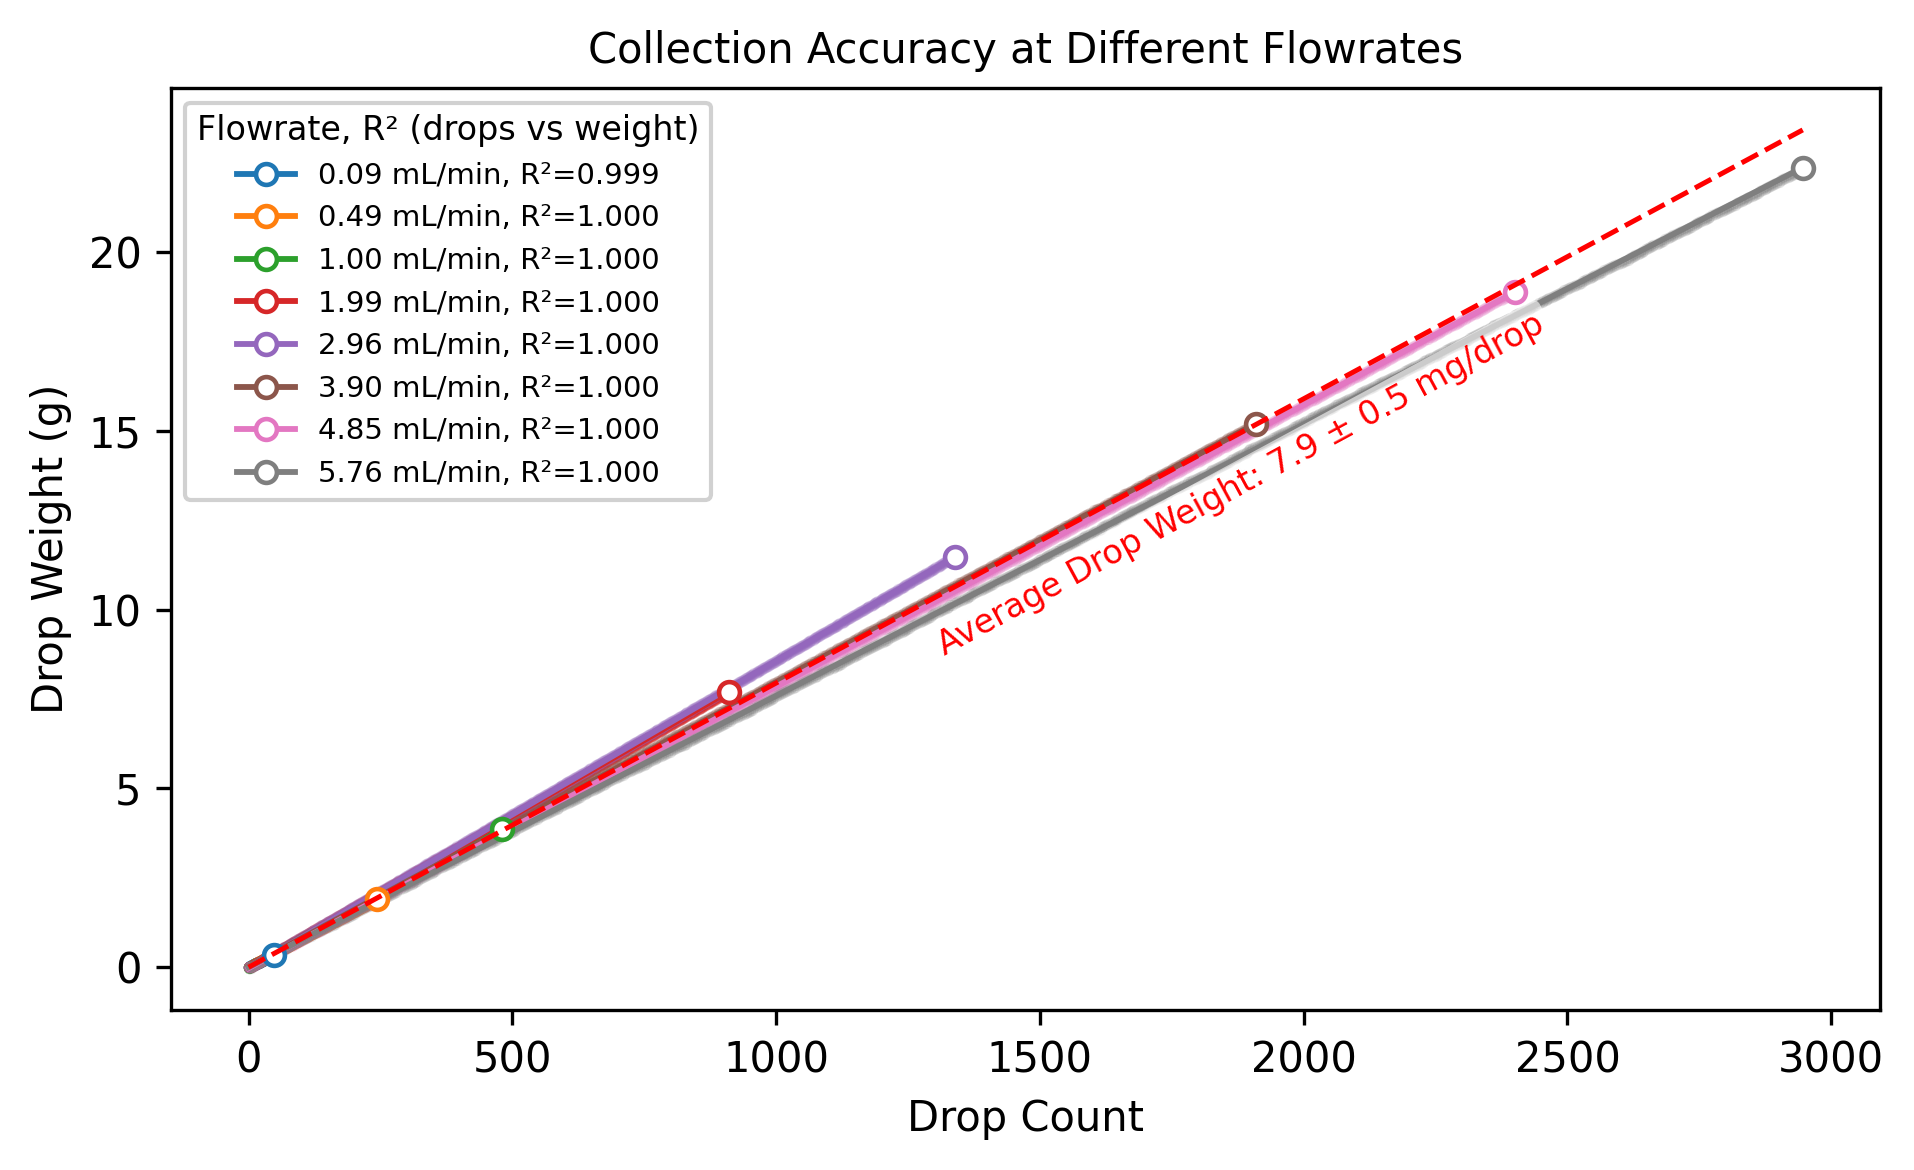

In [10]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# === File List (in desired order) ===
csv_files = [
    "viscosity_accuracy_0.1ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_0.5ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_1ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_2ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_3ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_4ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_5ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_6ml_per_min_IPA_small_1.csv"
]

DENSITY_G_PER_ML = 0.785  # g/mL, adjust if fluid density differs

# --- Helpers ---
def _linfit_r2(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() < 2:
        return np.nan, np.nan, np.nan
    a, b = np.polyfit(x[mask], y[mask], 1)
    yhat = a * x[mask] + b
    ss_res = np.sum((y[mask] - yhat) ** 2)
    ss_tot = np.sum((y[mask] - y[mask].mean()) ** 2)
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan
    return a, b, r2

def _parse_flowrate_from_filename(file):
    """
    Extract numeric flowrate from filenames like:
    viscosity_accuracy_0.1ml_per_min_IPA_small_1.csv
    """
    basename = os.path.basename(file)
    match = re.search(r"viscosity_accuracy_([\d\.]+)ml_per_min", basename)
    if not match:
        return None
    return float(match.group(1))

def _get_drop_series(df):
    for col in ["drop_counter", "vernier_drop", "drops"]:
        if col in df.columns:
            return pd.to_numeric(df[col], errors="coerce").ffill().fillna(0)
    raise KeyError("No drop counter column found. Expected 'drop_counter' or 'vernier_drop'.")

def _first_drop_index(drops: pd.Series) -> int:
    d = drops.to_numpy()
    diffs = np.diff(d, prepend=d[0])
    pos = np.flatnonzero(diffs > 0)
    return int(pos[0]) if len(pos) else 0


def plot_weight_vs_drops(files):
    cmap = plt.get_cmap("tab10")
    color_cycle = [cmap(i % 10) for i in range(len(files))]

    fig, ax = plt.subplots(figsize=(6.5, 4), facecolor="white", dpi=300)
    ax.set_facecolor("white")

    slopes_g_per_drop = []   # for avg & std
    global_xmin = np.inf
    global_xmax = -np.inf

    # Collect legend pieces
    legend_handles = []
    legend_labels = []

    for idx, file in enumerate(files):
        if not os.path.exists(file):
            print(f"[WARN] File not found: {file}")
            continue

        df = pd.read_csv(file)
        if "timestamp" not in df.columns or "weight" not in df.columns:
            print(f"[WARN] Missing required columns in {file}; skipping.")
            continue

        df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
        weight = pd.to_numeric(df["weight"], errors="coerce")
        drops = _get_drop_series(df)

        # Shift start ~1 s before first detected drop
        i_first = _first_drop_index(drops)
        first_ts = df["timestamp"].iloc[i_first] if i_first < len(df) else df["timestamp"].dropna().iloc[0]
        if pd.isna(first_ts):
            first_ts = df["timestamp"].dropna().iloc[0]
        start_ts = first_ts - pd.Timedelta(seconds=1)
        start_idx = int(df["timestamp"].searchsorted(start_ts, side="left"))

        if start_idx >= len(df) - 1:
            print(f"[WARN] Not enough data in {file}; skipping.")
            continue

        drops = drops.iloc[start_idx:].reset_index(drop=True)
        weight = weight.iloc[start_idx:].reset_index(drop=True)
        drops = drops - drops.iloc[0]

        # Fit weight vs drops (slope = g/drop)
        a_g_per_drop, b, r2_wd = _linfit_r2(drops.to_numpy(), weight.to_numpy())
        if not np.isfinite(a_g_per_drop):
            continue

        # Fit weight vs time for actual flowrate
        df2 = df.iloc[start_idx:].copy()
        df2["time_sec"] = (df2["timestamp"] - df2["timestamp"].iloc[0]).dt.total_seconds()
        a_wt, _, _ = _linfit_r2(df2["time_sec"].to_numpy(), weight.to_numpy())  # g/s
        flow_ml_min = (a_wt * 60.0) / DENSITY_G_PER_ML if np.isfinite(a_wt) else np.nan

        # Scatter (under lines/markers)
        ax.scatter(drops, weight, s=3, alpha=0.2, color=color_cycle[idx], zorder=1)

        # Fit line
        xfit = np.array([np.nanmin(drops), np.nanmax(drops)])
        yfit = a_g_per_drop * xfit + b
        ax.plot(xfit, yfit, "-", lw=1.4, color=color_cycle[idx], zorder=2)

        # Endpoint marker on top
        ax.plot([xfit[-1]], [yfit[-1]], "o", mfc="white", mec=color_cycle[idx], mew=1.1, ms=5, zorder=5)

        # Legend (flowrate + R² only)
        handle = Line2D([], [], color=color_cycle[idx], lw=1.4,
                        marker="o", mfc="white", mec=color_cycle[idx], mew=1.1, ms=5)
        legend_handles.append(handle)
        legend_labels.append(f'{flow_ml_min:.2f} mL/min, R²={r2_wd:.3f}')

        # Bounds & slopes
        slopes_g_per_drop.append(a_g_per_drop)
        global_xmin = min(global_xmin, np.nanmin(drops))
        global_xmax = max(global_xmax, np.nanmax(drops))

    # Average slope line + annotation aligned to line in screen coords
    valid_slopes = np.array([s for s in slopes_g_per_drop if np.isfinite(s)], dtype=float)
    if valid_slopes.size and np.isfinite(global_xmin) and np.isfinite(global_xmax) and global_xmax > global_xmin:
        a_avg = float(valid_slopes.mean())         # g/drop
        a_std = float(valid_slopes.std(ddof=1)) if valid_slopes.size > 1 else 0.0

        xline = np.linspace(global_xmin, global_xmax, 200)
        yline = a_avg * xline
        ax.plot(xline, yline, "r--", lw=1.2, zorder=10)

        # Choose an annotation point on the line
        x_annot = global_xmin + 0.45 * (global_xmax - global_xmin)
        y_annot = a_avg * x_annot - 2

        # Compute rotation that matches the line *in display coords*
        fig.canvas.draw()  # ensure transforms are current
        dx = 0.2 * (global_xmax - global_xmin)  # small step along x for angle calc
        p1 = ax.transData.transform((x_annot, y_annot))
        p2 = ax.transData.transform((x_annot + dx, y_annot + a_avg * dx))
        angle_deg = np.degrees(np.arctan2(p2[1] - p1[1], p2[0] - p1[0]))

        ax.text(
            x_annot, y_annot,
            f"Average Drop Weight: {a_avg*1000:.1f} ± {a_std*1000:.1f} mg/drop",
            color="red", fontsize=8, rotation=angle_deg-3, rotation_mode="anchor",
            va="bottom", ha="left", zorder=11,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.6, lw=0)
        )

    ax.set_xlabel("Drop Count")
    ax.set_ylabel("Drop Weight (g)")
    ax.set_title("Collection Accuracy at Different Flowrates", fontsize=10)

    if legend_handles:
        ax.legend(legend_handles, legend_labels,
                  title="Flowrate, R² (drops vs weight)",
                  fontsize=7, title_fontsize=8, framealpha=0.9, loc="best")

    plt.tight_layout()
    plt.show()
plot_weight_vs_drops(csv_files)

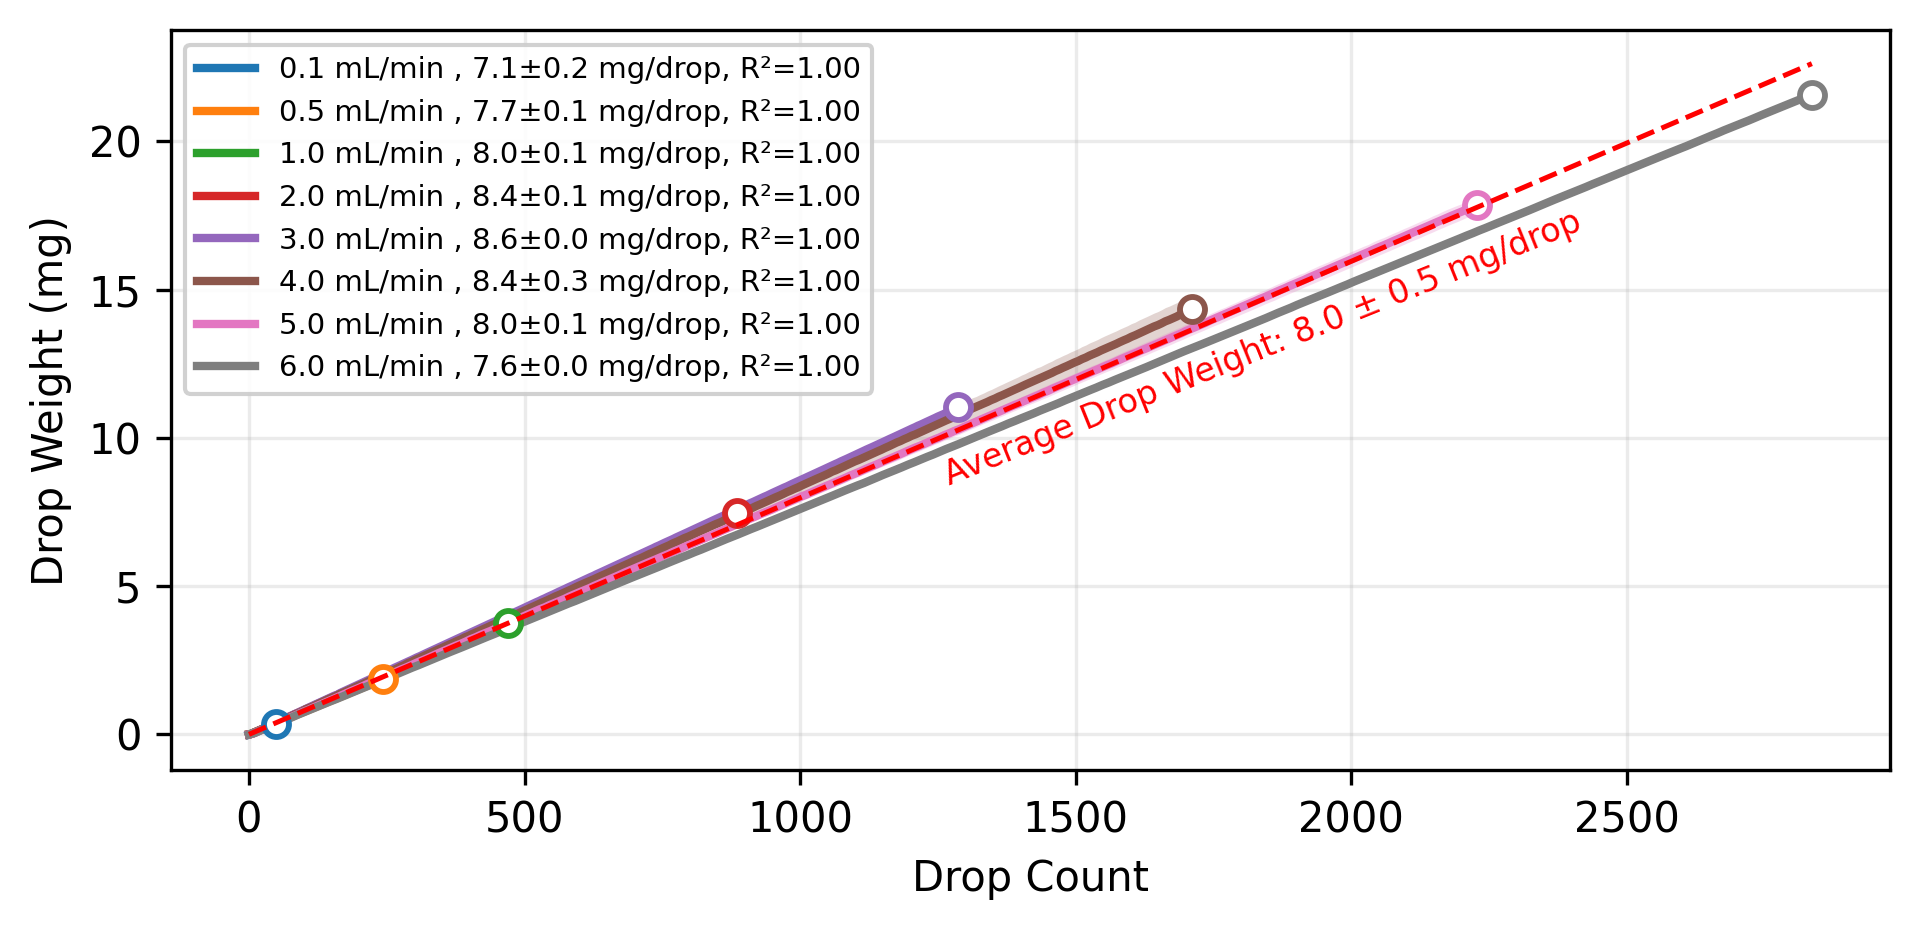

In [12]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# === File List (edit as needed) ===
csv_files = [
    "viscosity_accuracy_0.1ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_0.1ml_per_min_IPA_small_2.csv",
    "viscosity_accuracy_0.1ml_per_min_IPA_small_3.csv",
    "viscosity_accuracy_0.1ml_per_min_IPA_small_4.csv",
    "viscosity_accuracy_0.5ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_0.5ml_per_min_IPA_small_2.csv",
    "viscosity_accuracy_0.5ml_per_min_IPA_small_3.csv",
    "viscosity_accuracy_0.5ml_per_min_IPA_small_4.csv",
    "viscosity_accuracy_1ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_1ml_per_min_IPA_small_2.csv",
    "viscosity_accuracy_1ml_per_min_IPA_small_3.csv",
    "viscosity_accuracy_1ml_per_min_IPA_small_4.csv",
    "viscosity_accuracy_2ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_2ml_per_min_IPA_small_2.csv",
    "viscosity_accuracy_2ml_per_min_IPA_small_3.csv",
    "viscosity_accuracy_2ml_per_min_IPA_small_4.csv",
    "viscosity_accuracy_3ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_3ml_per_min_IPA_small_2.csv",
    "viscosity_accuracy_3ml_per_min_IPA_small_3.csv",
    "viscosity_accuracy_3ml_per_min_IPA_small_4.csv",
    "viscosity_accuracy_4ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_4ml_per_min_IPA_small_2.csv",
    "viscosity_accuracy_4ml_per_min_IPA_small_3.csv",
    "viscosity_accuracy_4ml_per_min_IPA_small_4.csv",
    "viscosity_accuracy_5ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_5ml_per_min_IPA_small_2.csv",
    "viscosity_accuracy_5ml_per_min_IPA_small_3.csv",
    "viscosity_accuracy_5ml_per_min_IPA_small_4.csv",
    "viscosity_accuracy_6ml_per_min_IPA_small_1.csv",
    "viscosity_accuracy_6ml_per_min_IPA_small_2.csv",
    "viscosity_accuracy_6ml_per_min_IPA_small_3.csv",
    "viscosity_accuracy_6ml_per_min_IPA_small_4.csv"
]

# --- Helpers ---
def _linfit_r2(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    m = np.isfinite(x) & np.isfinite(y)
    if m.sum() < 2:
        return np.nan, np.nan, np.nan
    a, b = np.polyfit(x[m], y[m], 1)
    yhat = a * x[m] + b
    ss_res = np.sum((y[m] - yhat) ** 2)
    ss_tot = np.sum((y[m] - y[m].mean()) ** 2)
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan
    return a, b, r2

def _parse_flowrate_from_filename(file):
    """Extract numeric flowrate from names like '..._0.5ml_per_min_...csv'."""
    basename = os.path.basename(file)
    m = re.search(r"viscosity_accuracy_([\d\.]+)ml_per_min", basename)
    return float(m.group(1)) if m else None

def _get_drop_series(df):
    for col in ["drop_counter", "vernier_drop", "drops"]:
        if col in df.columns:
            return pd.to_numeric(df[col], errors="coerce").ffill().fillna(0)
    raise KeyError("No drop counter column found (expected 'drop_counter' or 'vernier_drop' or 'drops').")

def _first_drop_index(drops: pd.Series) -> int:
    d = drops.to_numpy()
    diffs = np.diff(d, prepend=d[0])
    pos = np.flatnonzero(diffs > 0)
    return int(pos[0]) if len(pos) else 0

# --- Plotting (grouped) ---
def plot_weight_vs_drops_grouped(files, n_points=250):
    def _clean_xy(drops, weight):
        m = np.isfinite(drops) & np.isfinite(weight)
        x = drops[m].astype(float)
        y = weight[m].astype(float)
        if x.size < 2:
            return np.array([]), np.array([])
        order = np.argsort(x)
        x, y = x[order], y[order]
        x_unique, idx_start = np.unique(x, return_index=True)
        counts = np.diff(np.r_[idx_start, x.size])
        y_sums = np.add.reduceat(y, idx_start)
        y_unique = y_sums / counts
        if x_unique.size < 2:
            return np.array([]), np.array([])
        return x_unique, y_unique

    fig, ax = plt.subplots(figsize=(6.5, 3.2), facecolor="white", dpi=300)
    ax.set_facecolor("white")
    ax.set_axisbelow(True)
    ax.grid(True, alpha=0.25, linewidth=0.8)

    # --- collect curves by flowrate ---
    grouped = {}
    for file in files:
        if not os.path.exists(file):
            print(f"[WARN] File not found: {file}")
            continue
        df = pd.read_csv(file)
        if "timestamp" not in df.columns or "weight" not in df.columns:
            print(f"[WARN] Missing required columns in {file}; skipping.")
            continue

        flow = _parse_flowrate_from_filename(file)
        if flow is None:
            print(f"[WARN] Could not parse flowrate from {file}")
            continue

        df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
        weight = pd.to_numeric(df["weight"], errors="coerce")
        drops  = _get_drop_series(df)

        # align to ~1 s before first drop
        i_first = _first_drop_index(drops)
        first_ts = df["timestamp"].iloc[i_first] if i_first < len(df) else df["timestamp"].dropna().iloc[0]
        if pd.isna(first_ts):
            first_ts = df["timestamp"].dropna().iloc[0]
        start_ts = first_ts - pd.Timedelta(seconds=1)
        start_idx = int(df["timestamp"].searchsorted(start_ts, side="left"))
        if start_idx >= len(df) - 1:
            print(f"[WARN] Not enough data in {file}; skipping.")
            continue

        drops  = drops.iloc[start_idx:].reset_index(drop=True) - drops.iloc[start_idx]
        weight = weight.iloc[start_idx:].reset_index(drop=True)

        x_u, y_u = _clean_xy(drops.to_numpy(), weight.to_numpy())
        if x_u.size < 2:
            print(f"[WARN] Curve too short after cleaning: {file}")
            continue

        a, b, r2 = _linfit_r2(x_u, y_u)
        grouped.setdefault(flow, []).append({"x": x_u, "y": y_u, "slope": a, "r2": r2})

    if not grouped:
        print("No valid data found.")
        return

    # fixed color per flowrate
    flows = sorted(grouped.keys())
    cmap = plt.get_cmap("tab10")
    color_for = {f: cmap(i % 10) for i, f in enumerate(flows)}

    handles, labels = [], []
    all_slopes = []                 # <-- collect for overall average
    global_xmin, global_xmax = np.inf, -np.inf  # <-- track x-limits used

    for flow in flows:
        reps = grouped[flow]
        if not reps:
            continue

        # common grid limited to coverage of all replicates
        xmax_common = np.min([np.nanmax(r["x"]) for r in reps])
        if not np.isfinite(xmax_common) or xmax_common <= 0:
            continue
        x = np.linspace(0.0, xmax_common, n_points)

        Ys, slopes, r2s = [], [], []
        for r in reps:
            Ys.append(np.interp(x, r["x"], r["y"]))
            if np.isfinite(r["slope"]): slopes.append(r["slope"])
            if np.isfinite(r["r2"]):    r2s.append(r["r2"])

        Y = np.vstack(Ys)
        y_mean = Y.mean(axis=0)
        y_std  = Y.std(axis=0, ddof=1) if Y.shape[0] > 1 else np.zeros_like(y_mean)

        # ensure band visible even if std≈0
        y_rng = max(1e-9, float(y_mean.max() - y_mean.min()))
        y_std = np.maximum(y_std, 0.003 * y_rng)

        c = color_for[flow]
        ax.fill_between(x, y_mean - y_std, y_mean + y_std, color=c, alpha=0.25, lw=0, zorder=1)
        line, = ax.plot(x, y_mean, color=c, lw=2.0, zorder=2)
        ax.plot([x[-1]], [y_mean[-1]], "o", mfc="white", mec=c, mew=1.4, ms=6, zorder=3)

        # legend text
        n = Y.shape[0]
        slope_txt = ""
        if slopes:
            s_mean = np.mean(slopes)
            s_std  = np.std(slopes, ddof=1) if len(slopes) > 1 else 0.0
            slope_txt = f", {s_mean*1000:.1f}±{s_std*1000:.1f} mg/drop"
        r2_txt = f", R²={np.mean(r2s):.2f}" if r2s else ""
        handles.append(line)
        labels.append(f"{flow:.1f} mL/min {slope_txt}{r2_txt}")

        # --- for overall average line/annotation ---
        all_slopes.extend(slopes)
        global_xmin = min(global_xmin, float(x[0]))
        global_xmax = max(global_xmax, float(x[-1]))

    # === RED OVERALL-AVERAGE LINE + ANGLED ANNOTATION ===
    valid_slopes = np.array([s for s in all_slopes if np.isfinite(s)], dtype=float)
    if valid_slopes.size and np.isfinite(global_xmin) and np.isfinite(global_xmax) and global_xmax > global_xmin:
        a_avg = float(valid_slopes.mean())                         # g/drop
        a_std = float(valid_slopes.std(ddof=1)) if valid_slopes.size > 1 else 0.0

        xline = np.linspace(global_xmin, global_xmax, 200)
        yline = a_avg * xline
        ax.plot(xline, yline, "r--", lw=1.2, zorder=10)

        # pick an annotation point and rotate text along the line (display coords)
        x_annot = global_xmin + 0.45 * (global_xmax - global_xmin)
        y_annot = a_avg * x_annot - 2  # shift slightly down; tweak if needed

        fig.canvas.draw()  # ensure transforms are current
        dx = 0.2 * (global_xmax - global_xmin)
        p1 = ax.transData.transform((x_annot, y_annot))
        p2 = ax.transData.transform((x_annot + dx, y_annot + a_avg * dx))
        angle_deg = np.degrees(np.arctan2(p2[1] - p1[1], p2[0] - p1[0]))

        ax.text(
            x_annot, y_annot,
            f"Average Drop Weight: {a_avg*1000:.1f} ± {a_std*1000:.1f} mg/drop",
            color="red", fontsize=8, rotation=angle_deg-4, rotation_mode="anchor",
            va="bottom", ha="left", zorder=11,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0, lw=0)
        )
    # ====================================================

    ax.set_xlabel("Drop Count")
    ax.set_ylabel("Drop Weight (mg)")
    #ax.set_title("Collection Accuracy at Different Flowrates", fontsize=10)
    if handles:
        ax.legend(handles, labels, fontsize=7, framealpha=0.9, loc="best")
    plt.tight_layout()
    plt.show()
plot_weight_vs_drops_grouped(csv_files)

# Viscosity

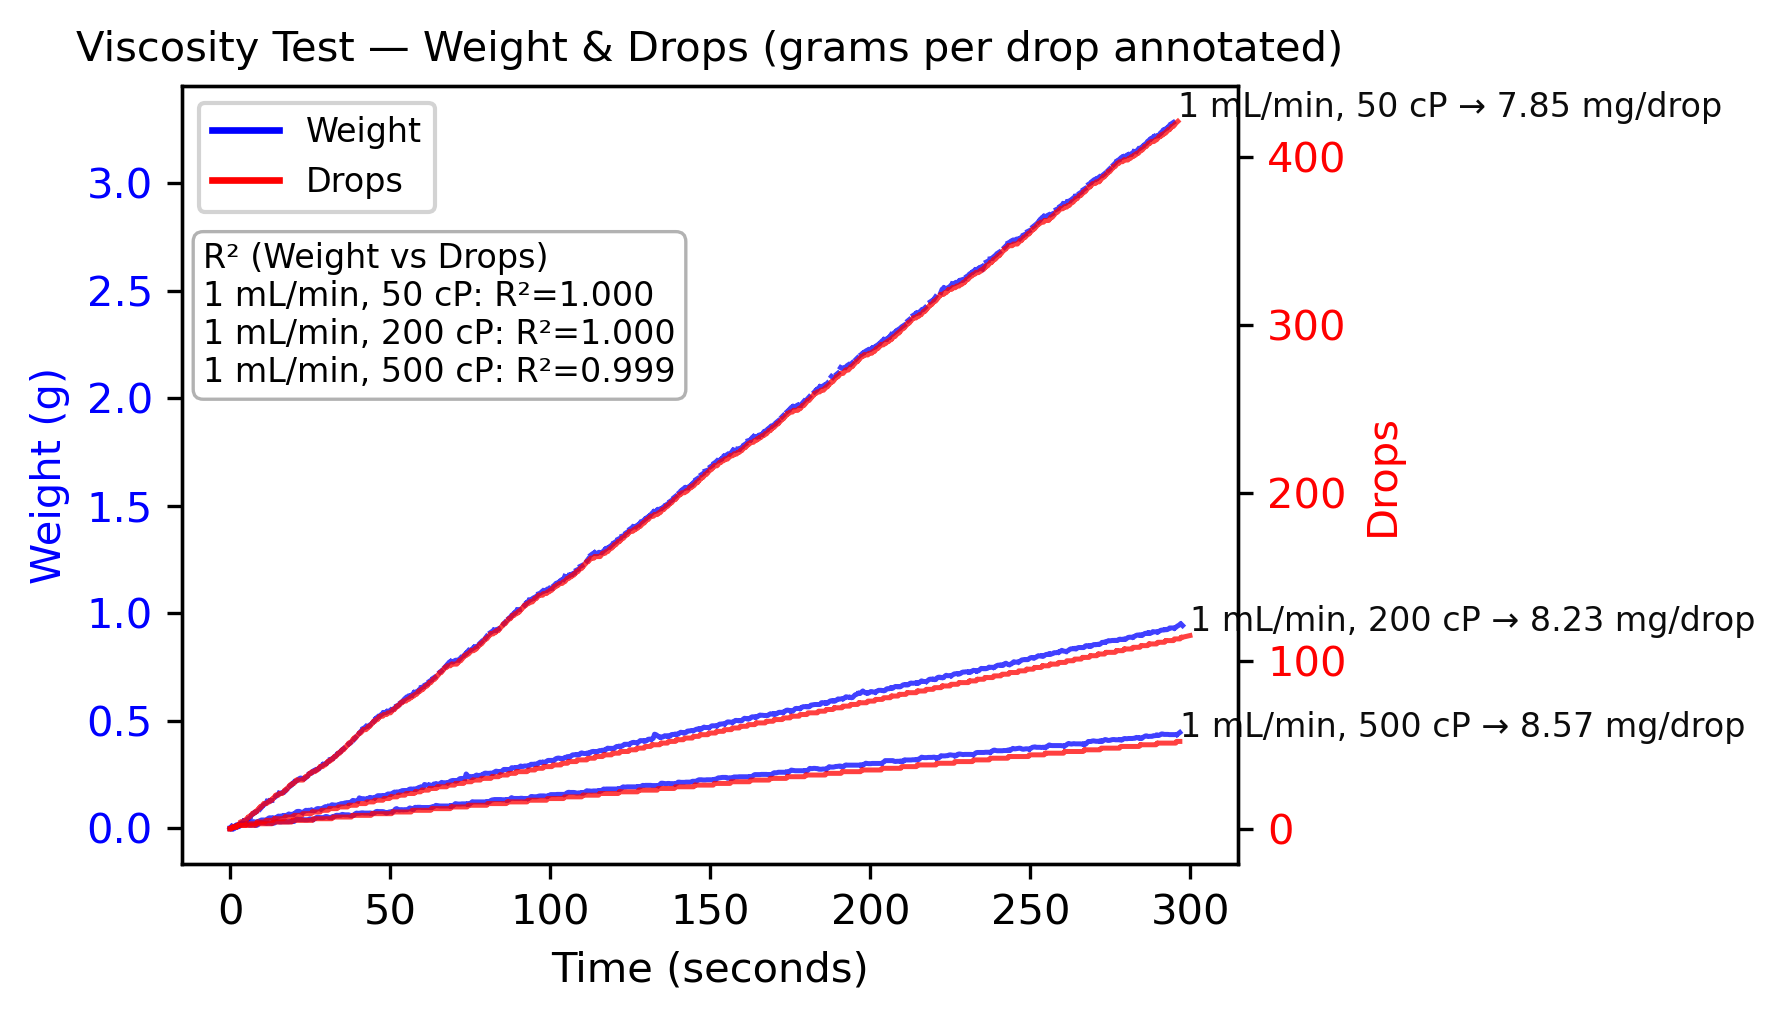


=== Grams per Drop Summary ===
                                             file             label  \
0   viscosity_accuracy_1ml_per_min_50cP_small.csv   1 mL/min, 50 cP   
1  viscosity_accuracy_1ml_per_min_200cP_small.csv  1 mL/min, 200 cP   
2  viscosity_accuracy_1ml_per_min_500cP_small.csv  1 mL/min, 500 cP   

   grams_per_drop  mg_per_drop  R2_weight_vs_drops  
0          0.0079       7.8531              1.0000  
1          0.0082       8.2293              0.9997  
2          0.0086       8.5746              0.9992  


In [11]:
import os, re, itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# === File List (in desired order) ===
csv_files = [
    "viscosity_accuracy_1ml_per_min_50cP_small.csv",
    "viscosity_accuracy_1ml_per_min_200cP_small.csv",
    "viscosity_accuracy_1ml_per_min_500cP_small.csv"
]

def _linfit_r2(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    m = np.isfinite(x) & np.isfinite(y)
    if m.sum() < 2:
        return np.nan, np.nan, np.nan
    a, b = np.polyfit(x[m], y[m], 1)
    yhat = a * x[m] + b
    ss_res = np.sum((y[m] - yhat)**2)
    ss_tot = np.sum((y[m] - y[m].mean())**2)
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan
    return a, b, r2

def _pretty_visc_label(file):
    """
    From: viscosity_accuracy_1ml_per_min_50cP_small.csv
    To:   1 mL/min, 50 cP
    """
    m = re.search(r"viscosity_accuracy_(.+?)_per_min_(\d+)cP", file)
    if m:
        rate_raw = m.group(1)  # e.g., "1ml"
        visc_cp = m.group(2)   # e.g., "50"
        rate_num = re.sub(r"ml$", "", rate_raw)
        try:
            rate_num = float(rate_num)
            rate_str = f"{rate_num:g} mL/min"
        except Exception:
            rate_str = f"{rate_raw} /min"
        return f"{rate_str}, {visc_cp} cP"
    # Fallback
    return os.path.basename(file)

def _get_drop_series(df):
    for col in ["drop_counter", "vernier_drop", "drops"]:
        if col in df.columns:
            return pd.to_numeric(df[col], errors="coerce").ffill().fillna(0)
    raise KeyError("No drop counter column found (expected 'drop_counter' or 'vernier_drop').")

def _first_drop_index(drops: pd.Series) -> int:
    d = drops.to_numpy()
    diffs = np.diff(d, prepend=d[0])
    pos = np.flatnonzero(diffs > 0)
    return int(pos[0]) if len(pos) else 0

# === Plot ALL (shift to 1s before first drop, re-zero drops) and annotate g/drop ===
def plot_all_viscosity_g_per_drop(files):
    records = []
    table_rows = []  # for console summary

    for file in files:
        if not os.path.exists(file):
            print(f"[WARN] File not found: {file}")
            continue

        df = pd.read_csv(file)
        if "timestamp" not in df.columns or "weight" not in df.columns:
            print(f"[WARN] Missing required columns in {file}; skipping.")
            continue

        df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
        if df["timestamp"].isna().all():
            print(f"[WARN] All timestamps NaT in {file}; skipping.")
            continue

        weight = pd.to_numeric(df["weight"], errors="coerce")
        drops  = _get_drop_series(df)

        # Shift start: 1 s before first detected drop
        i_first = _first_drop_index(drops)
        first_ts = df["timestamp"].iloc[i_first] if i_first < len(df) else df["timestamp"].dropna().iloc[0]
        if pd.isna(first_ts):
            first_ts = df["timestamp"].dropna().iloc[0]
        start_ts = first_ts - pd.Timedelta(seconds=1)
        start_idx = int(df["timestamp"].searchsorted(start_ts, side="left"))

        df = df.iloc[start_idx:].copy()
        if len(df) < 2:
            print(f"[WARN] Not enough data after shifting in {file}; skipping.")
            continue

        weight = weight.iloc[start_idx:].reset_index(drop=True)
        drops  = drops.iloc[start_idx:].reset_index(drop=True)

        # Time axis and drop re-zero
        df["time_sec"] = (df["timestamp"] - df["timestamp"].iloc[0]).dt.total_seconds()
        drops = drops - drops.iloc[0]

        # grams/drop by OLS: weight ~ a*drops + b
        a_g_per_drop, b_w0, r2_wd = _linfit_r2(drops, weight)
        mg_per_drop = a_g_per_drop * 1000.0 if np.isfinite(a_g_per_drop) else np.nan

        label = _pretty_visc_label(file)
        records.append(dict(
            label=label,
            t=df["time_sec"].to_numpy(),
            w=weight.to_numpy(),
            d=drops.to_numpy(),
            g_per_drop=a_g_per_drop,
            mg_per_drop=mg_per_drop,
            r2=r2_wd
        ))

        table_rows.append({
            "file": os.path.basename(file),
            "label": label,
            "grams_per_drop": a_g_per_drop,
            "mg_per_drop": mg_per_drop,
            "R2_weight_vs_drops": r2_wd
        })

    if not records:
        print("[WARN] No valid files to plot.")
        return

    # === Plot
    fig, ax1 = plt.subplots(figsize=(6, 3.5), dpi=300)
    ax2 = ax1.twinx()

    # Plot each series
    for rec in records:
        ax1.plot(rec["t"], rec["w"], "-", color="blue", linewidth=1.2, alpha=0.75)
        ax2.plot(rec["t"], rec["d"], "-", color="red",  linewidth=1.2, alpha=0.75)

    # Axes labels
    ax1.set_xlabel("Time (seconds)")
    ax1.set_ylabel("Weight (g)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    ax2.set_ylabel("Drops", color="red")
    ax2.tick_params(axis="y", labelcolor="red")

    # Simple 2-item legend
    legend_lines = [
        Line2D([0], [0], color="blue", linewidth=1.6, label="Weight"),
        Line2D([0], [0], color="red",  linewidth=1.6, label="Drops"),
    ]
    ax1.legend(handles=legend_lines, loc="upper left", fontsize=8, framealpha=0.85)

    # Annotation offset on the right axis
    d_all = [rec["d"] for rec in records if len(rec["d"]) > 0]
    if d_all:
        d_concat = np.concatenate(d_all)
        dy = np.nanmax(d_concat) - np.nanmin(d_concat)
        d_offset = 0.02 * dy if np.isfinite(dy) and dy > 0 else 0.0
    else:
        d_offset = 0.0

    # Annotate mg/drop near the tail of each RED curve
    for rec in records:
        xt = rec["t"][-1]
        yt = rec["d"][-1] + d_offset
        mg_txt = f"{rec['mg_per_drop']:.2f} mg/drop" if np.isfinite(rec["mg_per_drop"]) else "n/a"
        ax2.text(
            xt, yt,
            f"{rec['label']} → {mg_txt}",
            color="black", fontsize=8, ha="left", va="center", alpha=0.95,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.0, linewidth=0.0)
        )

    # Optional: R² summary box
    r2_lines = [
        f"{rec['label']}: R²={rec['r2']:.3f}" if np.isfinite(rec['r2']) else f"{rec['label']}: R²=n/a"
        for rec in records
    ]
    ax1.text(
        0.02, 0.80, "R² (Weight vs Drops)\n" + "\n".join(r2_lines),
        transform=ax1.transAxes, ha="left", va="top", fontsize=8,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.3, linewidth=0.8)
    )

    plt.title("Viscosity Test — Weight & Drops (grams per drop annotated)", fontsize=10)
    plt.tight_layout()
    plt.show()
    plt.close(fig)

    # === Console summary
    df_summary = pd.DataFrame(table_rows)
    if not df_summary.empty:
        with pd.option_context('display.max_rows', None, 'display.float_format', '{:.4f}'.format):
            print("\n=== Grams per Drop Summary ===")
            print(df_summary[["file", "label", "grams_per_drop", "mg_per_drop", "R2_weight_vs_drops"]])
    else:
        print("[WARN] No summary to print.")

# === Run ===
plot_all_viscosity_g_per_drop(csv_files)


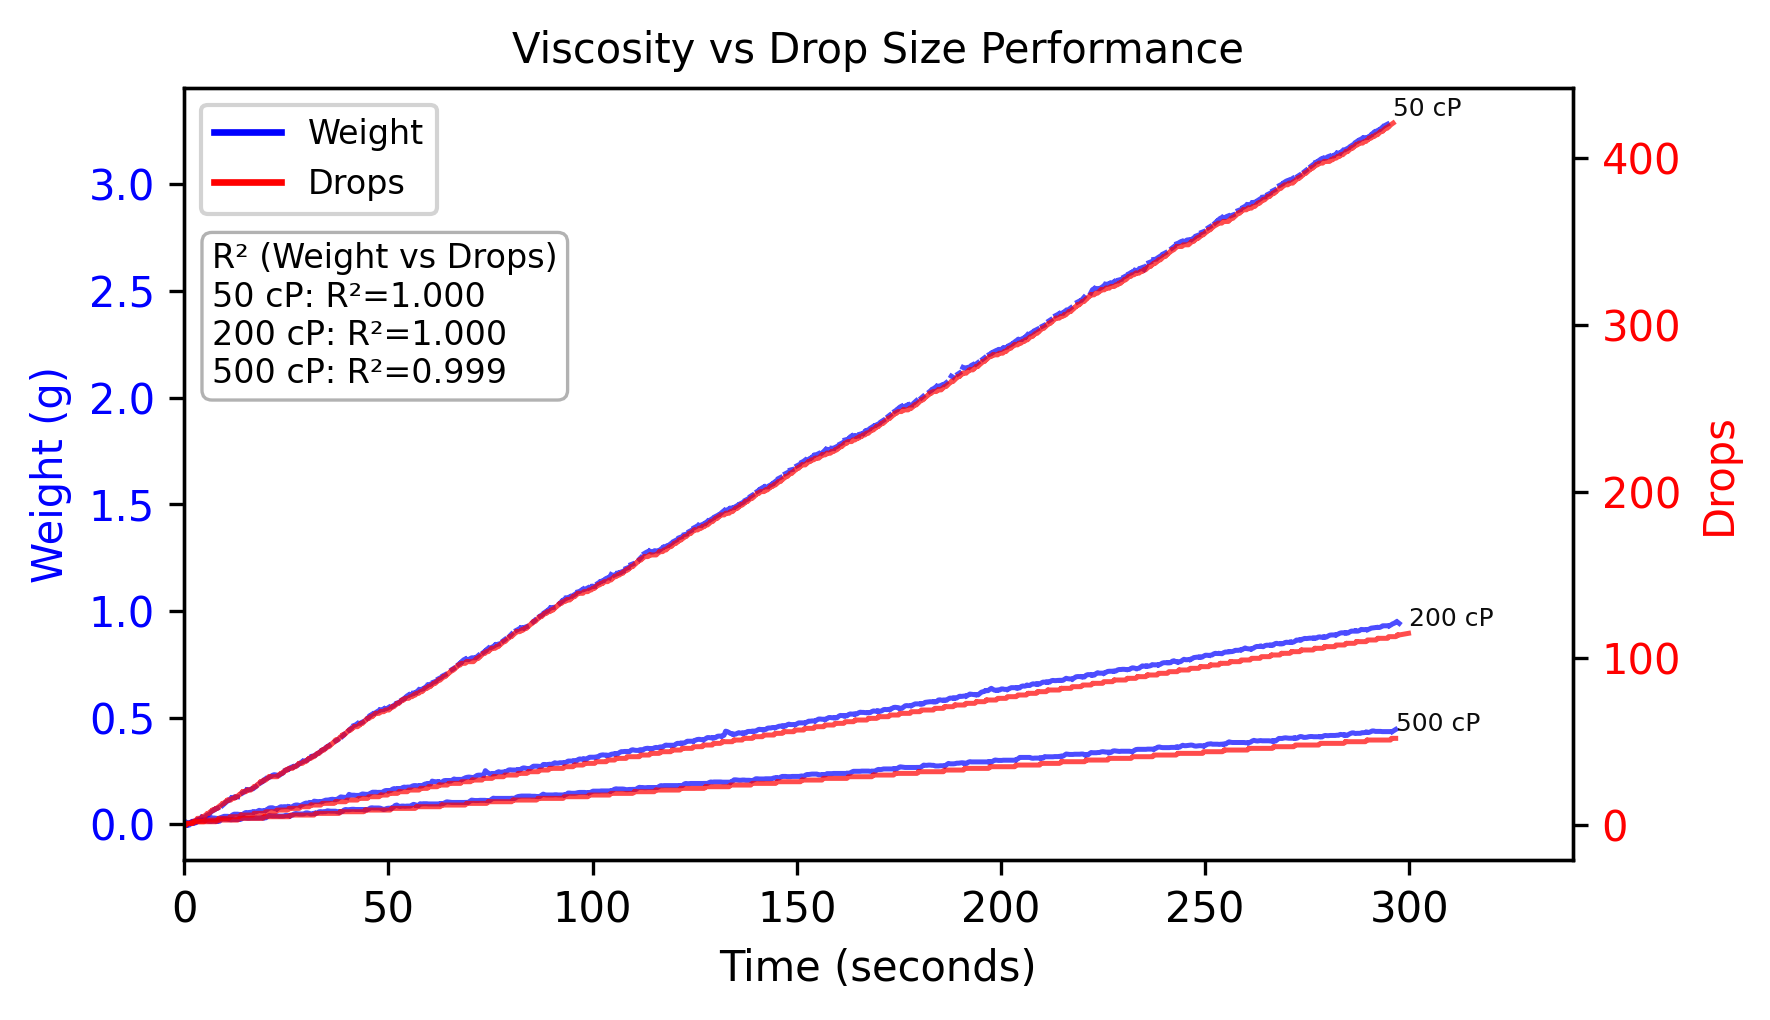

In [14]:
import os, re, itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# === File List for Viscosity Tests ===
csv_files = [
    "viscosity_accuracy_1ml_per_min_50cP_small.csv",
    "viscosity_accuracy_1ml_per_min_200cP_small.csv",
    "viscosity_accuracy_1ml_per_min_500cP_small.csv"
]

DENSITY_G_PER_ML = 1.0  # Adjust if fluid density differs

def _linfit_r2(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    m = np.isfinite(x) & np.isfinite(y)
    if m.sum() < 2:
        return np.nan, np.nan, np.nan
    a, b = np.polyfit(x[m], y[m], 1)
    yhat = a * x[m] + b
    ss_res = np.sum((y[m] - yhat)**2)
    ss_tot = np.sum((y[m] - y[m].mean())**2)
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan
    return a, b, r2

def _pretty_viscosity_label(file):
    """
    Extract viscosity label like '50 cP', '200 cP', '500 cP'
    from filename format: viscosity_accuracy_1ml_per_min_50cP_small.csv
    """
    m = re.search(r"_(\d+)cP", file)
    return f"{m.group(1)} cP" if m else "Unknown"

def _get_drop_series(df):
    for col in ["drop_counter", "vernier_drop", "drops"]:
        if col in df.columns:
            return pd.to_numeric(df[col], errors="coerce").ffill().fillna(0)
    raise KeyError("No drop counter column found (expected 'drop_counter' or 'vernier_drop').")

def _first_drop_index(drops: pd.Series) -> int:
    d = drops.to_numpy()
    diffs = np.diff(d, prepend=d[0])
    pos = np.flatnonzero(diffs > 0)
    return int(pos[0]) if len(pos) else 0

# === Plot function for viscosity tests ===
def plot_viscosity_accuracy(files):
    records = []
    for file in files:
        if not os.path.exists(file):
            print(f"[WARN] File not found: {file}")
            continue

        df = pd.read_csv(file)
        if "timestamp" not in df.columns or "weight" not in df.columns:
            print(f"[WARN] Missing required columns in {file}; skipping.")
            continue

        df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
        if df["timestamp"].isna().all():
            print(f"[WARN] All timestamps NaT in {file}; skipping.")
            continue

        weight = pd.to_numeric(df["weight"], errors="coerce")
        drops  = _get_drop_series(df)

        # Shift start: 1 s before first detected drop
        i_first = _first_drop_index(drops)
        first_ts = df["timestamp"].iloc[i_first]
        if pd.isna(first_ts):
            first_ts = df["timestamp"].dropna().iloc[0]
        start_ts = first_ts - pd.Timedelta(seconds=1)
        start_idx = int(df["timestamp"].searchsorted(start_ts, side="left"))

        df = df.iloc[start_idx:].copy()
        if len(df) < 2:
            print(f"[WARN] Not enough data after shifting in {file}; skipping.")
            continue

        weight = weight.iloc[start_idx:].reset_index(drop=True)
        drops  = drops.iloc[start_idx:].reset_index(drop=True)

        df["time_sec"] = (df["timestamp"] - df["timestamp"].iloc[0]).dt.total_seconds()
        drops = drops - drops.iloc[0]

        # Correlation between drops and weight
        _, _, r2_dw = _linfit_r2(drops, weight)

        # Calculate average drop weight in mg
        total_weight = weight.iloc[-1] - weight.iloc[0]  # grams
        total_drops = drops.iloc[-1]
        avg_drop_weight_mg = (total_weight / total_drops * 1000.0) if total_drops > 0 else np.nan

        records.append(dict(
            label=_pretty_viscosity_label(file),
            t=df["time_sec"].to_numpy(),
            w=weight.to_numpy(),
            d=drops.to_numpy(),
            r2=r2_dw,
            avg_drop_weight_mg=avg_drop_weight_mg
        ))

    if not records:
        print("[WARN] No valid files to plot.")
        return

    fig, ax1 = plt.subplots(figsize=(6, 3.5), dpi=300)
    ax2 = ax1.twinx()

    # Plot each series
    for rec in records:
        ax1.plot(rec["t"], rec["w"], linestyle="-", color="blue", linewidth=1.2, alpha=0.7)
        ax2.plot(rec["t"], rec["d"], linestyle="-", color="red",  linewidth=1.2, alpha=0.7)

    # Axis labels
    ax1.set_xlabel("Time (seconds)")
    ax1.set_ylabel("Weight (g)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    ax2.set_ylabel("Drops", color="red")
    ax2.tick_params(axis="y", labelcolor="red")

    # Determine annotation offset
    d_all = [rec["d"] for rec in records if len(rec["d"]) > 0]
    if d_all:
        d_concat = np.concatenate(d_all)
        dy = np.nanmax(d_concat) - np.nanmin(d_concat)
        d_offset = 0.02 * dy if np.isfinite(dy) and dy > 0 else 0.0
    else:
        d_offset = 0.0

    # Legend
    legend_lines = [
        Line2D([0], [0], color="blue", linewidth=1.6, label="Weight"),
        Line2D([0], [0], color="red",  linewidth=1.6, label="Drops"),
    ]
    ax1.legend(handles=legend_lines, loc="upper left", fontsize=8, framealpha=0.85)

    # Annotate each line with average drop weight
    for rec in records:
        xt = rec["t"][-1]
        yt = rec["d"][-1] + d_offset
        drop_txt = f"{rec['avg_drop_weight_mg']:.2f} mg/drop" if np.isfinite(rec['avg_drop_weight_mg']) else "n/a"
        ax2.text(
            xt, yt,
            f"{rec['label']}",
            color="black", fontsize=6, ha="left", va="center", alpha=0.95,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.0, linewidth=0.0)
        )

    # R² summary
    r2_lines = [
        f"{rec['label']}: R²={rec['r2']:.3f}" if np.isfinite(rec['r2']) else f"{rec['label']}: R²=n/a"
        for rec in records
    ]
    ax1.text(
        0.02, 0.8, "R² (Weight vs Drops)\n" + "\n".join(r2_lines),
        transform=ax1.transAxes, ha="left", va="top", fontsize=8,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.3, linewidth=0.8)
    )

    plt.title("Viscosity vs Drop Size Performance", fontsize=10)
    plt.tight_layout()
    plt.xlim(0, 340)
    plt.show()
    plt.close(fig)

# === Run ===
plot_viscosity_accuracy(csv_files)


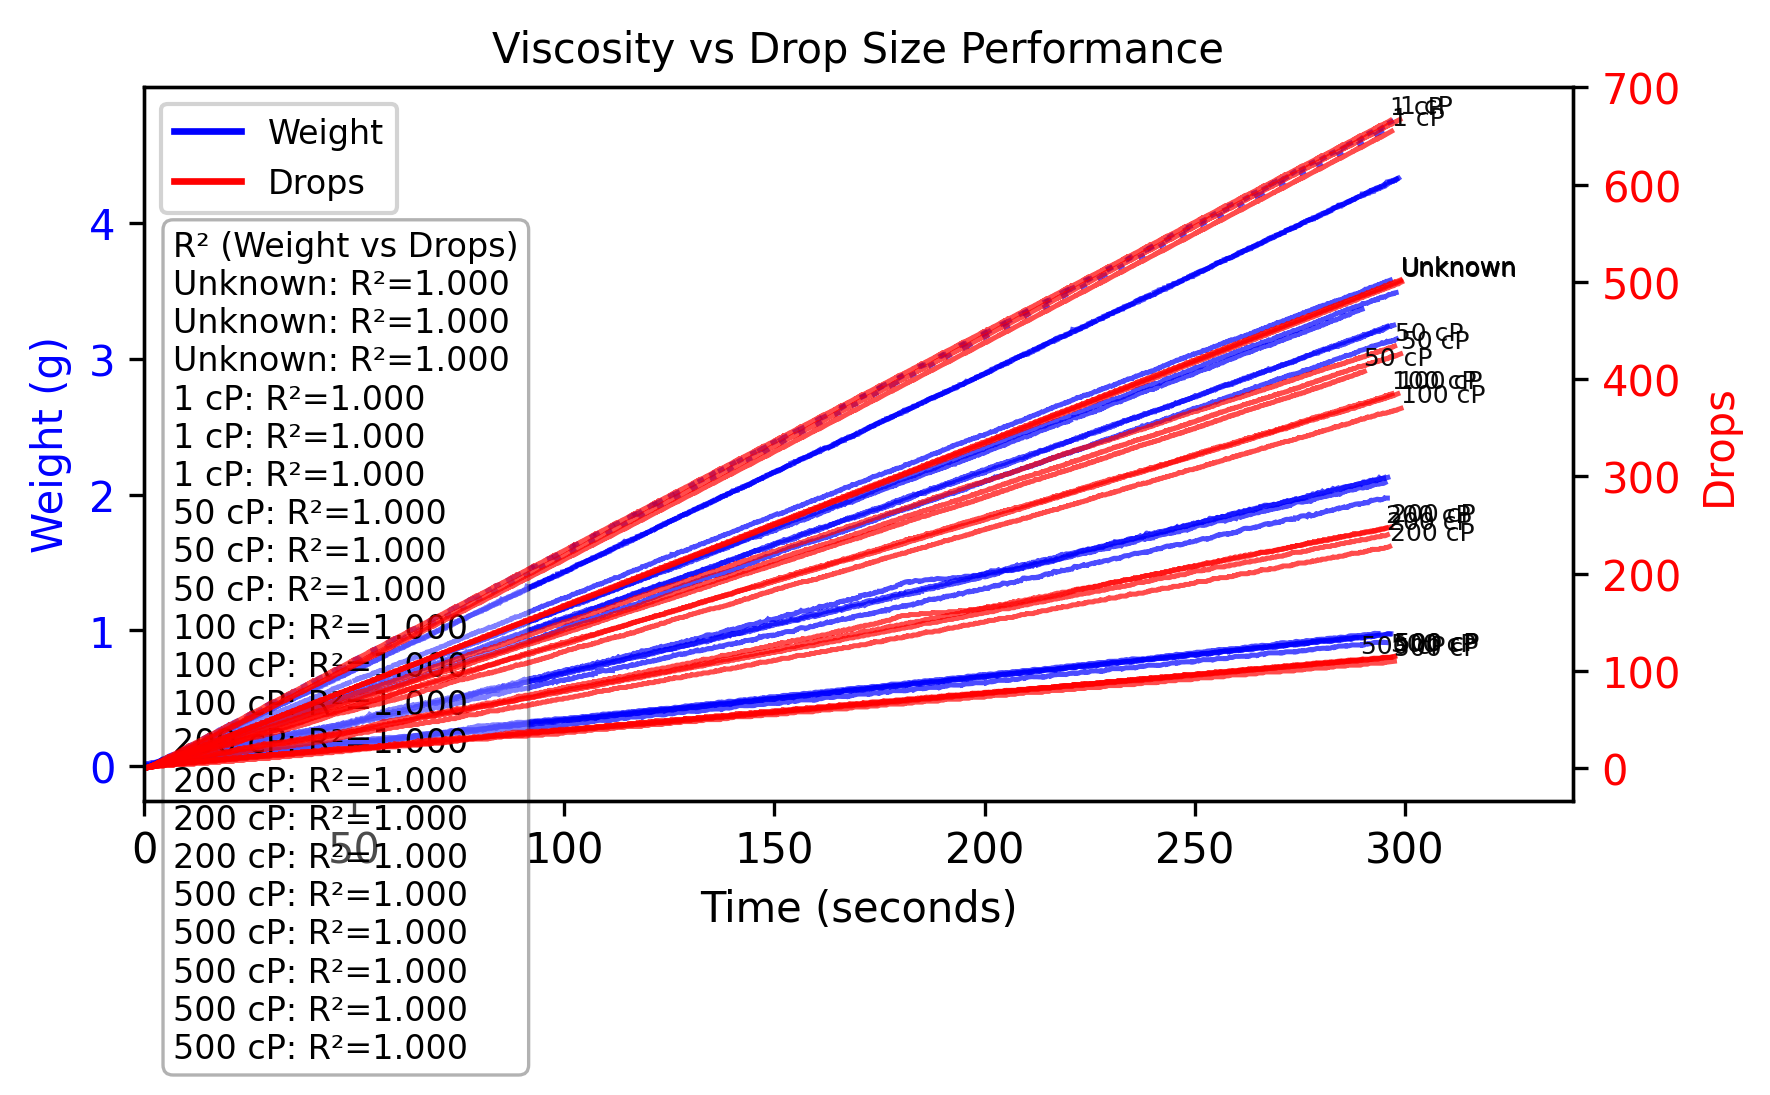

In [2]:
csv_files = [
    "viscosity_accuracy_1ml_per_min_0.45cP_small_1.csv",
    "viscosity_accuracy_1ml_per_min_0.45cP_small_2.csv",
    "viscosity_accuracy_1ml_per_min_0.45cP_small_3.csv",
    "viscosity_accuracy_1ml_per_min_1cP_small_1.csv",
    "viscosity_accuracy_1ml_per_min_1cP_small_2.csv",
    "viscosity_accuracy_1ml_per_min_1cP_small_3.csv",
    "viscosity_accuracy_1ml_per_min_50cP_small_1.csv",
    "viscosity_accuracy_1ml_per_min_50cP_small_2.csv",
    "viscosity_accuracy_1ml_per_min_50cP_small_3.csv",  # <-- missing comma fixed here
    "viscosity_accuracy_1ml_per_min_100cP_small_1.csv",
    "viscosity_accuracy_1ml_per_min_100cP_small_2.csv",
    "viscosity_accuracy_1ml_per_min_100cP_small_3.csv",
    "viscosity_accuracy_1ml_per_min_200cP_small_1.csv",
    "viscosity_accuracy_1ml_per_min_200cP_small_2.csv",
    "viscosity_accuracy_1ml_per_min_200cP_small_3.csv",
    "viscosity_accuracy_1ml_per_min_200cP_small_4.csv",
    "viscosity_accuracy_1ml_per_min_500cP_small_1.csv",
    "viscosity_accuracy_1ml_per_min_500cP_small_2.csv",
    "viscosity_accuracy_1ml_per_min_500cP_small_3.csv",
    "viscosity_accuracy_1ml_per_min_500cP_small_4.csv",
    "viscosity_accuracy_1ml_per_min_500cP_small_5.csv"
]
import os, re, itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


DENSITY_G_PER_ML = 1.0  # Adjust if fluid density differs

def _linfit_r2(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    m = np.isfinite(x) & np.isfinite(y)
    if m.sum() < 2:
        return np.nan, np.nan, np.nan
    a, b = np.polyfit(x[m], y[m], 1)
    yhat = a * x[m] + b
    ss_res = np.sum((y[m] - yhat)**2)
    ss_tot = np.sum((y[m] - y[m].mean())**2)
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan
    return a, b, r2

def _pretty_viscosity_label(file):
    """
    Extract viscosity label like '50 cP', '200 cP', '500 cP'
    from filename format: viscosity_accuracy_1ml_per_min_50cP_small.csv
    """
    m = re.search(r"_(\d+)cP", file)
    return f"{m.group(1)} cP" if m else "Unknown"

def _get_drop_series(df):
    for col in ["drop_counter", "vernier_drop", "drops"]:
        if col in df.columns:
            return pd.to_numeric(df[col], errors="coerce").ffill().fillna(0)
    raise KeyError("No drop counter column found (expected 'drop_counter' or 'vernier_drop').")

def _first_drop_index(drops: pd.Series) -> int:
    d = drops.to_numpy()
    diffs = np.diff(d, prepend=d[0])
    pos = np.flatnonzero(diffs > 0)
    return int(pos[0]) if len(pos) else 0

# === Plot function for viscosity tests ===
def plot_viscosity_accuracy(files):
    records = []
    for file in files:
        if not os.path.exists(file):
            print(f"[WARN] File not found: {file}")
            continue

        df = pd.read_csv(file)
        if "timestamp" not in df.columns or "weight" not in df.columns:
            print(f"[WARN] Missing required columns in {file}; skipping.")
            continue

        df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
        if df["timestamp"].isna().all():
            print(f"[WARN] All timestamps NaT in {file}; skipping.")
            continue

        weight = pd.to_numeric(df["weight"], errors="coerce")
        drops  = _get_drop_series(df)

        # Shift start: 1 s before first detected drop
        i_first = _first_drop_index(drops)
        first_ts = df["timestamp"].iloc[i_first]
        if pd.isna(first_ts):
            first_ts = df["timestamp"].dropna().iloc[0]
        start_ts = first_ts - pd.Timedelta(seconds=1)
        start_idx = int(df["timestamp"].searchsorted(start_ts, side="left"))

        df = df.iloc[start_idx:].copy()
        if len(df) < 2:
            print(f"[WARN] Not enough data after shifting in {file}; skipping.")
            continue

        weight = weight.iloc[start_idx:].reset_index(drop=True)
        drops  = drops.iloc[start_idx:].reset_index(drop=True)

        df["time_sec"] = (df["timestamp"] - df["timestamp"].iloc[0]).dt.total_seconds()
        drops = drops - drops.iloc[0]

        # Correlation between drops and weight
        _, _, r2_dw = _linfit_r2(drops, weight)

        # Calculate average drop weight in mg
        total_weight = weight.iloc[-1] - weight.iloc[0]  # grams
        total_drops = drops.iloc[-1]
        avg_drop_weight_mg = (total_weight / total_drops * 1000.0) if total_drops > 0 else np.nan

        records.append(dict(
            label=_pretty_viscosity_label(file),
            t=df["time_sec"].to_numpy(),
            w=weight.to_numpy(),
            d=drops.to_numpy(),
            r2=r2_dw,
            avg_drop_weight_mg=avg_drop_weight_mg
        ))

    if not records:
        print("[WARN] No valid files to plot.")
        return

    fig, ax1 = plt.subplots(figsize=(6, 3.5), dpi=300)
    ax2 = ax1.twinx()

    # Plot each series
    for rec in records:
        ax1.plot(rec["t"], rec["w"], linestyle="-", color="blue", linewidth=1.2, alpha=0.7)
        ax2.plot(rec["t"], rec["d"], linestyle="-", color="red",  linewidth=1.2, alpha=0.7)

    # Axis labels
    ax1.set_xlabel("Time (seconds)")
    ax1.set_ylabel("Weight (g)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    ax2.set_ylabel("Drops", color="red")
    ax2.tick_params(axis="y", labelcolor="red")

    # Determine annotation offset
    d_all = [rec["d"] for rec in records if len(rec["d"]) > 0]
    if d_all:
        d_concat = np.concatenate(d_all)
        dy = np.nanmax(d_concat) - np.nanmin(d_concat)
        d_offset = 0.02 * dy if np.isfinite(dy) and dy > 0 else 0.0
    else:
        d_offset = 0.0

    # Legend
    legend_lines = [
        Line2D([0], [0], color="blue", linewidth=1.6, label="Weight"),
        Line2D([0], [0], color="red",  linewidth=1.6, label="Drops"),
    ]
    ax1.legend(handles=legend_lines, loc="upper left", fontsize=8, framealpha=0.85)

    # Annotate each line with average drop weight
    for rec in records:
        xt = rec["t"][-1]
        yt = rec["d"][-1] + d_offset
        drop_txt = f"{rec['avg_drop_weight_mg']:.2f} mg/drop" if np.isfinite(rec['avg_drop_weight_mg']) else "n/a"
        ax2.text(
            xt, yt,
            f"{rec['label']}",
            color="black", fontsize=6, ha="left", va="center", alpha=0.95,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.0, linewidth=0.0)
        )

    # R² summary
    r2_lines = [
        f"{rec['label']}: R²={rec['r2']:.3f}" if np.isfinite(rec['r2']) else f"{rec['label']}: R²=n/a"
        for rec in records
    ]
    ax1.text(
        0.02, 0.8, "R² (Weight vs Drops)\n" + "\n".join(r2_lines),
        transform=ax1.transAxes, ha="left", va="top", fontsize=8,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.3, linewidth=0.8)
    )

    plt.title("Viscosity vs Drop Size Performance", fontsize=10)
    plt.tight_layout()
    plt.xlim(0, 340)
    plt.show()
    plt.close(fig)

# === Run ===
plot_viscosity_accuracy(csv_files)



=== Processed Data ===
    Viscosity (cP) Surface    mg/drop        R²
0                1     Big  23.844935  0.993854
1                1     Big  25.742737  0.999593
2                1     Big  25.354742  0.999796
3                1     Big  24.612982  0.999884
4                1     Big  24.770270  0.999889
5                1     Big  24.501210  0.999883
6                1     Big  25.228763  0.999888
7               50   Small   7.853109  0.999975
8               50     Big  18.993712  0.999819
9              200   Small   8.229277  0.999723
10             200     Big  19.318257  0.998650
11             500   Small   8.574572  0.999166
12             500     Big  15.654285  0.998934


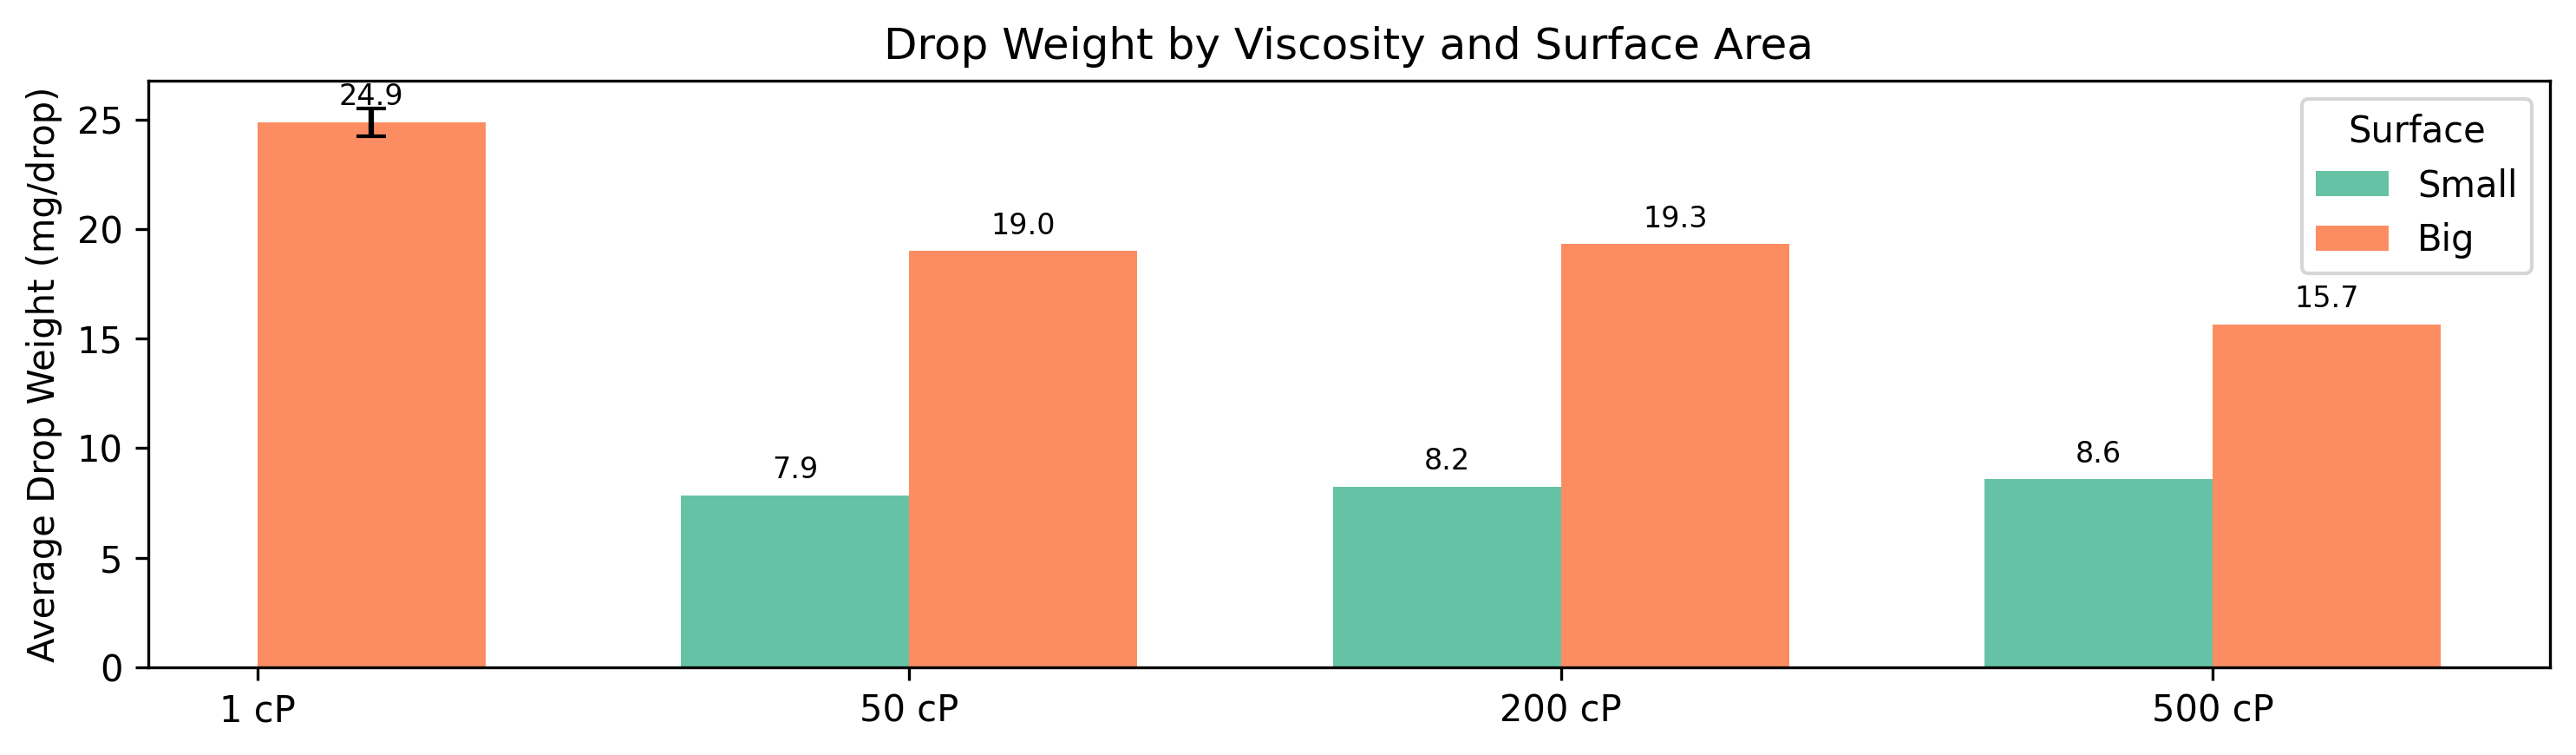

In [32]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # For modern color palettes

# === Input Files ===
flowrate_csvs = [
    "volume_accuracy_01ml_per_min.csv",
    "volume_accuracy_05ml_per_min.csv",
    "volume_accuracy_1ml_per_min.csv",
    "volume_accuracy_2ml_per_min.csv",
    "volume_accuracy_3ml_per_min.csv",
    "volume_accuracy_4ml_per_min.csv",
    "volume_accuracy_5ml_per_min.csv"
]

viscosity_csvs = [
    "viscosity_accuracy_1ml_per_min_50cP_small.csv",
    "viscosity_accuracy_1ml_per_min_50cP_big.csv",
    "viscosity_accuracy_1ml_per_min_200cP_small.csv",
    "viscosity_accuracy_1ml_per_min_200cP_big.csv",
    "viscosity_accuracy_1ml_per_min_500cP_small.csv",
    "viscosity_accuracy_1ml_per_min_500cP_big.csv"
]

all_csv_files = flowrate_csvs + viscosity_csvs

# === Linear regression with R² ===
def _linfit_r2(x, y):
    """Ordinary least squares: y ~ a*x + b, returning slope, intercept, and R²."""
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() < 2:
        return np.nan, np.nan, np.nan
    a, b = np.polyfit(x[mask], y[mask], 1)
    yhat = a * x[mask] + b
    ss_res = np.sum((y[mask] - yhat)**2)
    ss_tot = np.sum((y[mask] - y[mask].mean())**2)
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan
    return a, b, r2

# === Identify drop counter column ===
def _get_drop_series(df):
    for col in ["drop_counter", "vernier_drop", "drops", "Drop Count", "Counter"]:
        if col in df.columns:
            return pd.to_numeric(df[col], errors="coerce").ffill().fillna(0)
    raise KeyError("No drop counter column found!")

# === Find index of first detected drop ===
def _first_drop_index(drops: pd.Series) -> int:
    d = drops.to_numpy()
    diffs = np.diff(d, prepend=d[0])
    pos = np.flatnonzero(diffs > 0)
    return int(pos[0]) if len(pos) else 0

# === Extract metadata (viscosity and surface size) ===
def extract_metadata(file):
    """
    Extract viscosity (cP) and surface area type (small/big).
    Water (1 cP) is always treated as 'Big'.
    """
    basename = os.path.basename(file).lower()
    if "viscosity" in basename:
        m = re.search(r"_(\d+)cp", basename)
        viscosity = int(m.group(1)) if m else None
        surface = "Big" if "big" in basename else "Small"
    else:
        viscosity = 1  # Water assumed to be 1 cP
        surface = "Big"  # Treat water as Big by default
    return viscosity, surface

# === Calculate mg/drop using linear regression ===
def calculate_mg_per_drop(file):
    if not os.path.exists(file):
        return None, None

    df = pd.read_csv(file)
    if "weight" not in df.columns:
        return None, None

    # Identify drop count
    drops = _get_drop_series(df)
    weight = pd.to_numeric(df["weight"], errors="coerce")

    # Align start to 1 second before first drop
    i_first = _first_drop_index(drops)
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
    first_ts = df["timestamp"].iloc[i_first] if i_first < len(df) else df["timestamp"].dropna().iloc[0]
    if pd.isna(first_ts):
        first_ts = df["timestamp"].dropna().iloc[0]
    start_ts = first_ts - pd.Timedelta(seconds=1)
    start_idx = int(df["timestamp"].searchsorted(start_ts, side="left"))

    weight = weight.iloc[start_idx:].reset_index(drop=True)
    drops = drops.iloc[start_idx:].reset_index(drop=True)

    # Re-zero drops
    drops = drops - drops.iloc[0]

    # Linear regression: weight ~ drops
    a, b, r2 = _linfit_r2(drops.to_numpy(), weight.to_numpy())
    if not np.isfinite(a):
        return None, None

    return a * 1000.0, r2  # mg/drop

# === Process all files into DataFrame ===
data_records = []
for file in all_csv_files:
    viscosity, surface = extract_metadata(file)
    mg_per_drop, r2 = calculate_mg_per_drop(file)
    if mg_per_drop is not None:
        data_records.append({
            "Viscosity (cP)": viscosity,
            "Surface": surface,
            "mg/drop": mg_per_drop,
            "R²": r2
        })

df_results = pd.DataFrame(data_records)
print("\n=== Processed Data ===")
print(df_results)

# === Prepare for Bar Plot ===
summary = (
    df_results.groupby(["Viscosity (cP)", "Surface"])["mg/drop"]
    .agg(['mean', 'std'])
    .reset_index()
)

# Ensure correct plotting order
sorted_viscosities = sorted(summary["Viscosity (cP)"].unique())
surface_types = ["Small", "Big"]

# Seaborn color palette
colors = sns.color_palette("Set2", len(surface_types))

# Map each group to a unique position
bar_width = 0.35
x = np.arange(len(sorted_viscosities))

# === Plot ===
plt.figure(figsize=(10, 3), dpi=300)
for i, surface in enumerate(surface_types):
    subset = summary[summary["Surface"] == surface]
    means = []
    stds = []
    for visc in sorted_viscosities:
        row = subset[subset["Viscosity (cP)"] == visc]
        if not row.empty:
            means.append(row["mean"].values[0])
            stds.append(row["std"].values[0])
        else:
            means.append(np.nan)
            stds.append(np.nan)

    # Bar positions for this group
    offset = (i - 0.5) * bar_width
    bars = plt.bar(
        x + offset,
        means,
        width=bar_width,
        yerr=stds,
        capsize=4,
        label=surface,
        color=colors[i]
    )

    # === Annotate each bar with its mean value ===
    for xi, mean_val in zip(x + offset, means):
        if np.isfinite(mean_val):
            plt.text(
                xi, mean_val + 0.5,  # Position slightly above the bar
                f"{mean_val:.1f}",
                ha="center", va="bottom",
                fontsize=8
            )

# Labels and titles
plt.xticks(x, [f"{v} cP" for v in sorted_viscosities])
plt.ylabel("Average Drop Weight (mg/drop)")
plt.title("Drop Weight by Viscosity and Surface Area")
plt.legend(title="Surface")
plt.tight_layout()
plt.show()



=== Processed Data ===
                                            Filename  Viscosity (cP) Surface  \
0     viscosity_accuracy_1ml_per_min_1cP_small_1.csv               1   Small   
1     viscosity_accuracy_1ml_per_min_1cP_small_2.csv               1   Small   
2     viscosity_accuracy_1ml_per_min_1cP_small_3.csv               1   Small   
3    viscosity_accuracy_1ml_per_min_50cP_small_1.csv              50   Small   
4    viscosity_accuracy_1ml_per_min_50cP_small_2.csv              50   Small   
5    viscosity_accuracy_1ml_per_min_50cP_small_3.csv              50   Small   
6   viscosity_accuracy_1ml_per_min_100cP_small_1.csv             100   Small   
7   viscosity_accuracy_1ml_per_min_100cP_small_2.csv             100   Small   
8   viscosity_accuracy_1ml_per_min_100cP_small_3.csv             100   Small   
9   viscosity_accuracy_1ml_per_min_200cP_small_1.csv             200   Small   
10  viscosity_accuracy_1ml_per_min_200cP_small_2.csv             200   Small   
11  viscosity_ac

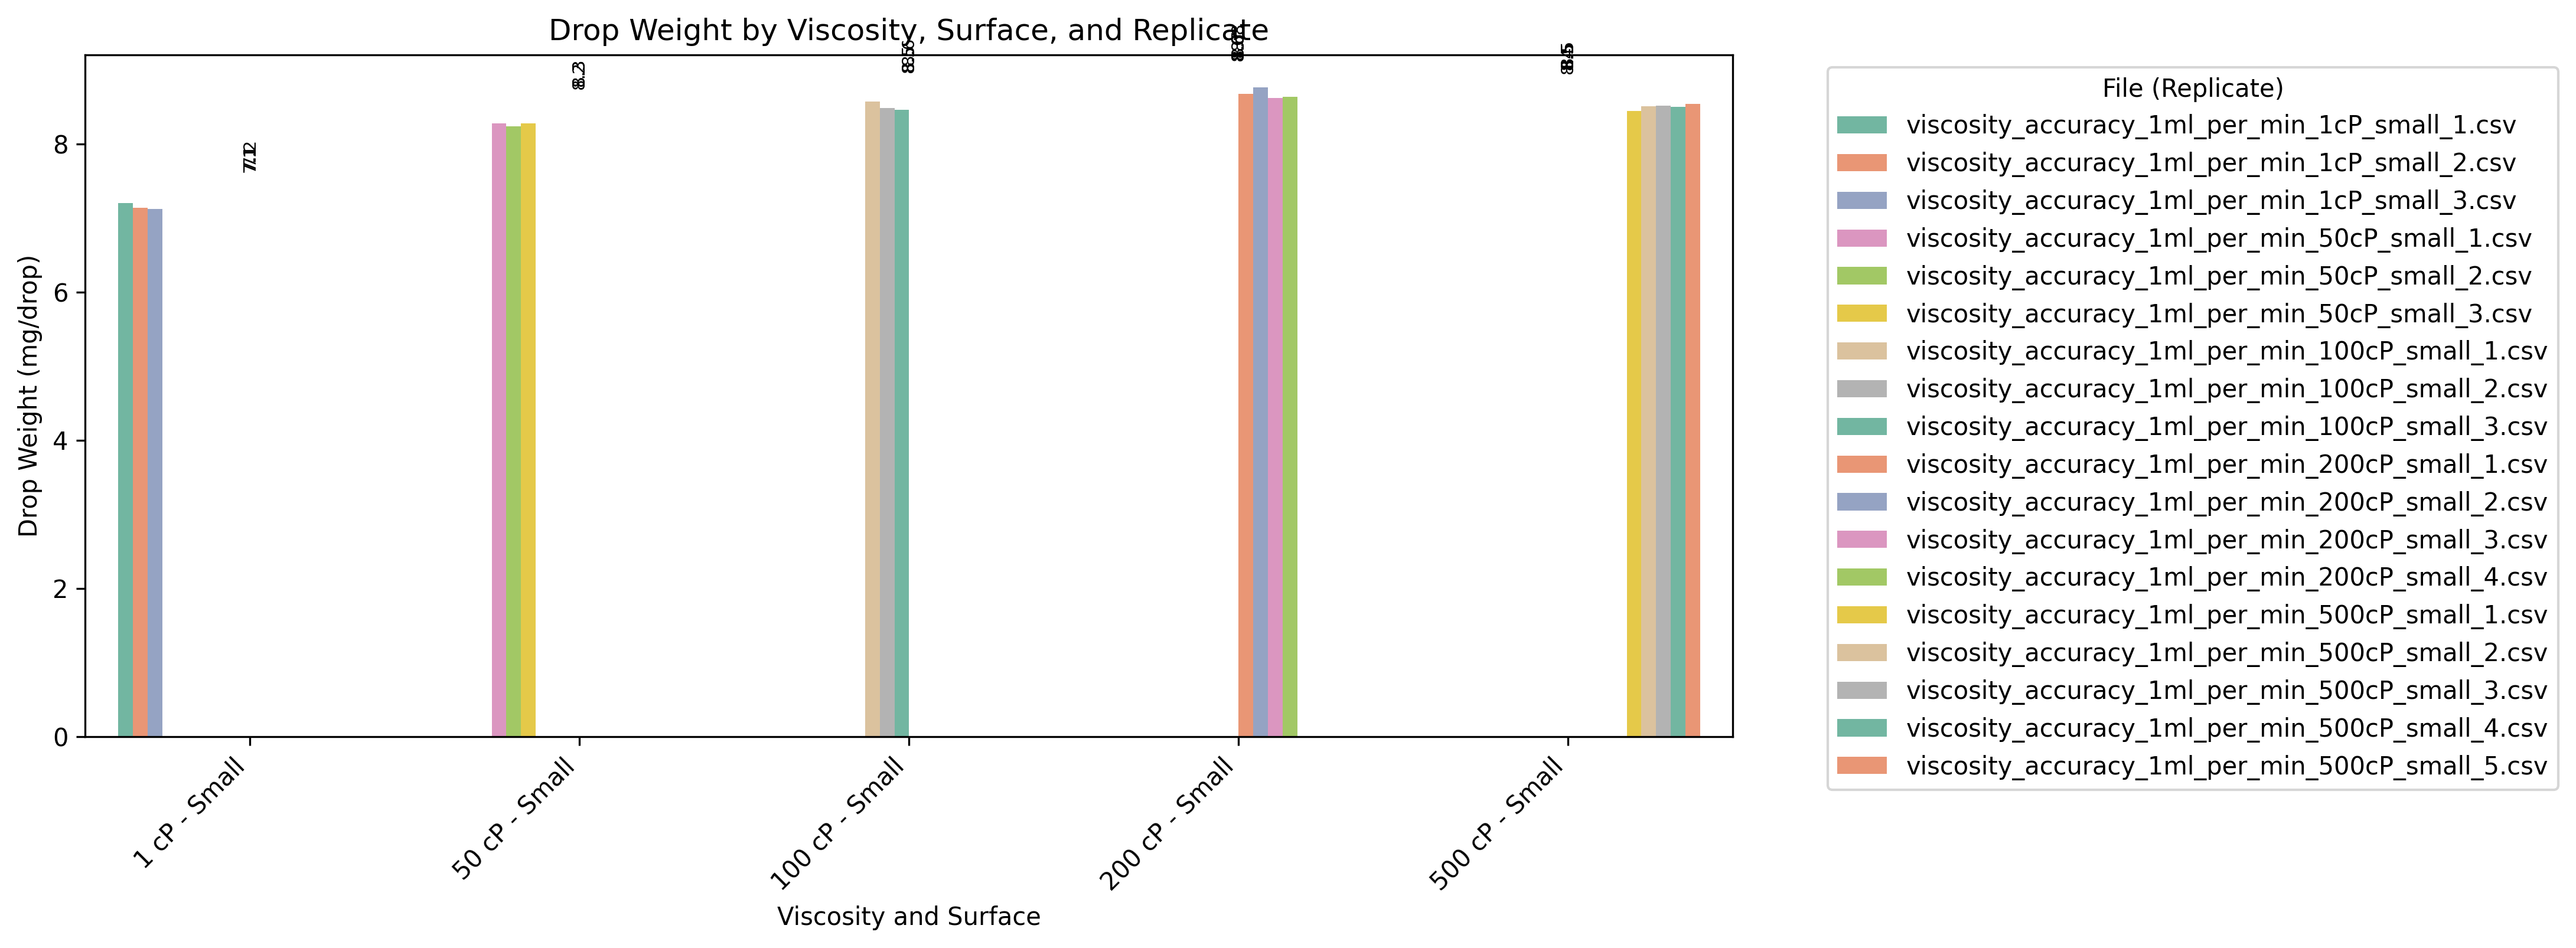

In [9]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



viscosity_csvs = [
    "viscosity_accuracy_1ml_per_min_1cP_small_1.csv",
    "viscosity_accuracy_1ml_per_min_1cP_small_2.csv",
    "viscosity_accuracy_1ml_per_min_1cP_small_3.csv",
    "viscosity_accuracy_1ml_per_min_50cP_small_1.csv",
    "viscosity_accuracy_1ml_per_min_50cP_small_2.csv",
    "viscosity_accuracy_1ml_per_min_50cP_small_3.csv",
    "viscosity_accuracy_1ml_per_min_100cP_small_1.csv",
    "viscosity_accuracy_1ml_per_min_100cP_small_2.csv",
    "viscosity_accuracy_1ml_per_min_100cP_small_3.csv",
    "viscosity_accuracy_1ml_per_min_200cP_small_1.csv",
    "viscosity_accuracy_1ml_per_min_200cP_small_2.csv",
    "viscosity_accuracy_1ml_per_min_200cP_small_3.csv",
    "viscosity_accuracy_1ml_per_min_200cP_small_4.csv",
    "viscosity_accuracy_1ml_per_min_500cP_small_1.csv",
    "viscosity_accuracy_1ml_per_min_500cP_small_2.csv",
    "viscosity_accuracy_1ml_per_min_500cP_small_3.csv",
    "viscosity_accuracy_1ml_per_min_500cP_small_4.csv",
    "viscosity_accuracy_1ml_per_min_500cP_small_5.csv"
]

all_csv_files = viscosity_csvs

# === Linear regression with R² ===
def _linfit_r2(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() < 2:
        return np.nan, np.nan, np.nan
    a, b = np.polyfit(x[mask], y[mask], 1)
    yhat = a * x[mask] + b
    ss_res = np.sum((y[mask] - yhat)**2)
    ss_tot = np.sum((y[mask] - y[mask].mean())**2)
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan
    return a, b, r2

# === Identify drop counter column ===
def _get_drop_series(df):
    for col in ["drop_counter", "vernier_drop", "drops", "Drop Count", "Counter"]:
        if col in df.columns:
            return pd.to_numeric(df[col], errors="coerce").ffill().fillna(0)
    raise KeyError("No drop counter column found!")

# === Find index of first detected drop ===
def _first_drop_index(drops: pd.Series) -> int:
    d = drops.to_numpy()
    diffs = np.diff(d, prepend=d[0])
    pos = np.flatnonzero(diffs > 0)
    return int(pos[0]) if len(pos) else 0

# === Extract metadata (viscosity and surface size) ===
def extract_metadata(file):
    basename = os.path.basename(file).lower()
    if "viscosity" in basename:
        m = re.search(r"_(\d+)cp", basename)
        viscosity = int(m.group(1)) if m else None
        if "small" in basename:
            surface = "Small"
        elif "big" in basename:
            surface = "Big"
        else:
            surface = "Unknown"
    else:
        viscosity = 1
        surface = "Big"
    return viscosity, surface

# === Calculate mg/drop using linear regression ===
def calculate_mg_per_drop(file):
    if not os.path.exists(file):
        return None, None
    df = pd.read_csv(file)
    if "weight" not in df.columns:
        return None, None
    drops = _get_drop_series(df)
    weight = pd.to_numeric(df["weight"], errors="coerce")
    i_first = _first_drop_index(drops)
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
    first_ts = df["timestamp"].iloc[i_first] if i_first < len(df) else df["timestamp"].dropna().iloc[0]
    if pd.isna(first_ts):
        first_ts = df["timestamp"].dropna().iloc[0]
    start_ts = first_ts - pd.Timedelta(seconds=1)
    start_idx = int(df["timestamp"].searchsorted(start_ts, side="left"))
    weight = weight.iloc[start_idx:].reset_index(drop=True)
    drops = drops.iloc[start_idx:].reset_index(drop=True)
    drops = drops - drops.iloc[0]
    a, b, r2 = _linfit_r2(drops.to_numpy(), weight.to_numpy())
    if not np.isfinite(a):
        return None, None
    return a * 1000.0, r2  # mg/drop

# === Process all files into DataFrame ===
data_records = []
for file in all_csv_files:
    viscosity, surface = extract_metadata(file)
    mg_per_drop, r2 = calculate_mg_per_drop(file)
    if mg_per_drop is not None:
        data_records.append({
            "Filename": os.path.basename(file),
            "Viscosity (cP)": viscosity,
            "Surface": surface,
            "mg/drop": mg_per_drop,
            "R²": r2
        })

df_results = pd.DataFrame(data_records)
print("\n=== Processed Data ===")
print(df_results)

# === Plot Each File Individually ===
plt.figure(figsize=(12, 5), dpi=300)

# Create a category for grouped x-axis labels
df_results["Viscosity_Surface"] = df_results["Viscosity (cP)"].astype(str) + " cP - " + df_results["Surface"]

# Sort categories for cleaner plot
cat_order = sorted(df_results["Viscosity_Surface"].unique(), key=lambda x: (int(x.split()[0]), x.split()[-1]))

# Bar plot using seaborn
sns.barplot(
    data=df_results,
    x="Viscosity_Surface",
    y="mg/drop",
    hue="Filename",  # Each replicate is shown separately
    dodge=True,
    palette="Set2",
    errorbar=None
)

# Annotate each bar with its mg/drop value
for i, row in df_results.iterrows():
    xpos = cat_order.index(row["Viscosity_Surface"])
    yval = row["mg/drop"]
    plt.text(
        xpos, yval + 0.5, f"{yval:.1f}", ha="center", va="bottom", fontsize=7, rotation=90
    )

# Labels and formatting
plt.ylabel("Drop Weight (mg/drop)")
plt.xlabel("Viscosity and Surface")
plt.title("Drop Weight by Viscosity, Surface, and Replicate")
plt.xticks(rotation=45, ha="right")
#plt.tight_layout()
plt.legend(title="File (Replicate)", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()



=== Processed Data (replicates) ===
                                         Filename  Viscosity (cP) Surface  mg/drop       R²
viscosity_accuracy_1ml_per_min_0.45cP_small_1.csv            0.45   Small 8.697706 0.999992
viscosity_accuracy_1ml_per_min_0.45cP_small_2.csv            0.45   Small 8.684969 0.999991
viscosity_accuracy_1ml_per_min_0.45cP_small_3.csv            0.45   Small 8.674180 0.999991
   viscosity_accuracy_1ml_per_min_1cP_small_1.csv            1.00   Small 7.202892 0.999974
   viscosity_accuracy_1ml_per_min_1cP_small_2.csv            1.00   Small 7.136503 0.999980
   viscosity_accuracy_1ml_per_min_1cP_small_3.csv            1.00   Small 7.116400 0.999994
  viscosity_accuracy_1ml_per_min_50cP_small_1.csv           50.00   Small 8.276271 0.999990
  viscosity_accuracy_1ml_per_min_50cP_small_2.csv           50.00   Small 8.238937 0.999988
  viscosity_accuracy_1ml_per_min_50cP_small_3.csv           50.00   Small 8.275329 0.999968
 viscosity_accuracy_1ml_per_min_100cP_small

C:\Users\wang9\AppData\Local\Temp\ipykernel_73244\1140898831.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\wang9\AppData\Local\Temp\ipykernel_73244\1140898831.py:188: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(order, fontsize=10)


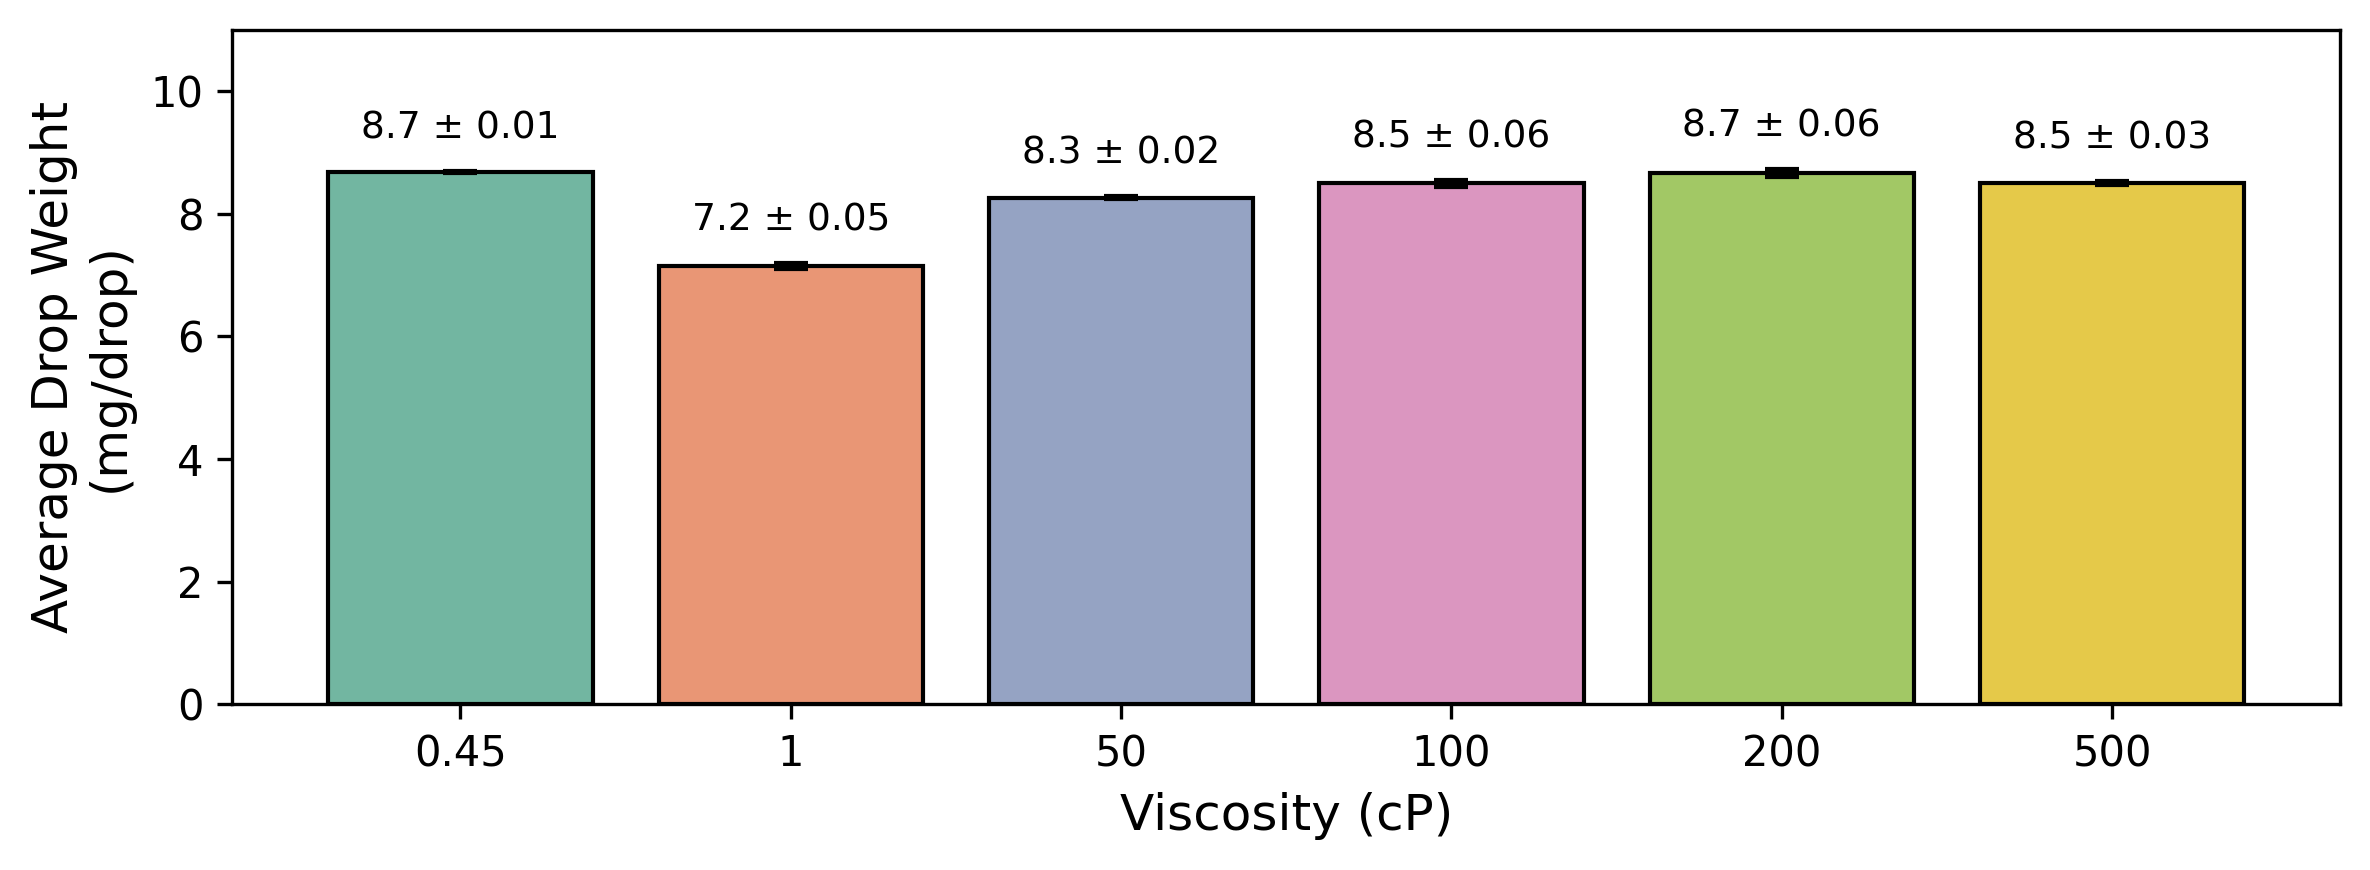

In [3]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# Input CSVs
# =========================
viscosity_csvs = [
    "viscosity_accuracy_1ml_per_min_0.45cP_small_1.csv",
    "viscosity_accuracy_1ml_per_min_0.45cP_small_2.csv",
    "viscosity_accuracy_1ml_per_min_0.45cP_small_3.csv",
    "viscosity_accuracy_1ml_per_min_1cP_small_1.csv",
    "viscosity_accuracy_1ml_per_min_1cP_small_2.csv",
    "viscosity_accuracy_1ml_per_min_1cP_small_3.csv",
    "viscosity_accuracy_1ml_per_min_50cP_small_1.csv",
    "viscosity_accuracy_1ml_per_min_50cP_small_2.csv",
    "viscosity_accuracy_1ml_per_min_50cP_small_3.csv",
    "viscosity_accuracy_1ml_per_min_100cP_small_1.csv",
    "viscosity_accuracy_1ml_per_min_100cP_small_2.csv",
    "viscosity_accuracy_1ml_per_min_100cP_small_3.csv",
    "viscosity_accuracy_1ml_per_min_200cP_small_1.csv",
    "viscosity_accuracy_1ml_per_min_200cP_small_2.csv",
    "viscosity_accuracy_1ml_per_min_200cP_small_3.csv",
    "viscosity_accuracy_1ml_per_min_200cP_small_4.csv",
    "viscosity_accuracy_1ml_per_min_500cP_small_1.csv",
    "viscosity_accuracy_1ml_per_min_500cP_small_2.csv",
    "viscosity_accuracy_1ml_per_min_500cP_small_3.csv",
    "viscosity_accuracy_1ml_per_min_500cP_small_4.csv",
    "viscosity_accuracy_1ml_per_min_500cP_small_5.csv"
]

all_csv_files = viscosity_csvs

# =========================
# Helpers
# =========================
def _linfit_r2(x, y):
    """Simple linear fit y = a*x + b with R^2."""
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    m = np.isfinite(x) & np.isfinite(y)
    if m.sum() < 2:
        return np.nan, np.nan, np.nan
    a, b = np.polyfit(x[m], y[m], 1)
    yhat = a * x[m] + b
    ss_res = np.sum((y[m] - yhat)**2)
    ss_tot = np.sum((y[m] - y[m].mean())**2)
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan
    return a, b, r2

def _get_drop_series(df):
    for col in ["drop_counter", "vernier_drop", "drops", "Drop Count", "Counter"]:
        if col in df.columns:
            return pd.to_numeric(df[col], errors="coerce").ffill().fillna(0)
    raise KeyError("No drop counter column found!")

def _first_drop_index(drops: pd.Series) -> int:
    d = drops.to_numpy()
    diffs = np.diff(d, prepend=d[0])
    pos = np.flatnonzero(diffs > 0)
    return int(pos[0]) if len(pos) else 0

def extract_metadata(file):
    basename = os.path.basename(file).lower()
    viscosity, surface = None, "Unknown"
    if "viscosity" in basename:
        m = re.search(r"_([0-9]+(?:\.[0-9]+)?)cp", basename)
        viscosity = float(m.group(1)) if m else None
        surface = "Small" if "small" in basename else ("Big" if "big" in basename else "Unknown")
    else:
        viscosity, surface = 1.0, "Big"
    return viscosity, surface

def calculate_mg_per_drop(file):
    if not os.path.exists(file):
        return None, None
    df = pd.read_csv(file)
    if "weight" not in df.columns:
        return None, None

    weight = pd.to_numeric(df["weight"], errors="coerce")
    drops = _get_drop_series(df)

    # align start
    start_idx = 0
    if "timestamp" in df.columns:
        i_first = _first_drop_index(drops)
        df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
        if df["timestamp"].notna().any():
            first_ts = df["timestamp"].iloc[i_first] if i_first < len(df) else df["timestamp"].dropna().iloc[0]
            if pd.isna(first_ts):
                first_ts = df["timestamp"].dropna().iloc[0]
            start_ts = first_ts - pd.Timedelta(seconds=1)
            start_idx = int(df["timestamp"].searchsorted(start_ts, side="left"))

    weight = weight.iloc[start_idx:].reset_index(drop=True)
    drops = drops.iloc[start_idx:].reset_index(drop=True)
    if len(drops) == 0 or len(weight) == 0:
        return None, None

    drops = drops - drops.iloc[0]  # rebase
    a, b, r2 = _linfit_r2(drops.to_numpy(), weight.to_numpy())
    if not np.isfinite(a):
        return None, None
    return a * 1000.0, r2  # mg/drop


# =========================
# Process all files
# =========================
data_records = []
for file in all_csv_files:
    viscosity, surface = extract_metadata(file)
    mg_per_drop, r2 = calculate_mg_per_drop(file)
    if viscosity is not None and mg_per_drop is not None:
        data_records.append({
            "Filename": os.path.basename(file),
            "Viscosity (cP)": float(viscosity),
            "Surface": surface,
            "mg/drop": mg_per_drop,
            "R²": r2
        })

df_results = pd.DataFrame(data_records)
if not df_results.empty:
    df_results["Viscosity (cP)"] = df_results["Viscosity (cP)"].astype(float).round(2)

print("\n=== Processed Data (replicates) ===")
print(df_results.sort_values(["Viscosity (cP)", "Filename"]).to_string(index=False))


# =========================
# Summarize & Plot
# =========================
summary = (
    df_results.groupby("Viscosity (cP)", as_index=False)
    .agg(**{
        "Average (mg/drop)": ("mg/drop", "mean"),
        "Std Dev": ("mg/drop", "std"),
        "Replicates": ("mg/drop", "count"),
    })
    .sort_values("Viscosity (cP)")
)

summary["ViscLabel"] = summary["Viscosity (cP)"].map(lambda v: f"{v:g}")
order = summary["ViscLabel"].tolist()

plt.figure(figsize=(8, 3), dpi=300, facecolor="white")
ax = sns.barplot(
    data=summary,
    x="ViscLabel",
    y="Average (mg/drop)",
    order=order,
    palette="Set2",
    edgecolor="black"
)

# Error bars
xs = [p.get_x() + p.get_width()/2 for p in ax.patches]
ax.errorbar(
    xs,
    summary["Average (mg/drop)"],
    yerr=summary["Std Dev"],
    fmt="none",
    ecolor="black",
    elinewidth=1,
    capsize=4,
    zorder=10
)

# Annotations
for x, mean, sd in zip(xs, summary["Average (mg/drop)"], summary["Std Dev"]):
    if np.isfinite(mean) and np.isfinite(sd):
        ax.text(
            x,
            mean + sd + 0.4,
            f"{mean:.1f} ± {sd:.2f}",
            ha="center",
            va="bottom",
            fontsize=9
        )

ax.set_ylabel("Average Drop Weight\n(mg/drop)", fontsize=12)
ax.set_xlabel("Viscosity (cP)", fontsize=12)
ax.set_xticklabels(order, fontsize=10)
ax.tick_params(axis="y", labelsize=10)
ax.set_ylim(0, 11)

plt.tight_layout()
plt.show()



=== Summary by Viscosity ===
 Viscosity (cP)  Average (mg/drop)  Std Dev  Replicates
            1.0           7.151932 0.045263           3
           50.0           8.263512 0.021288           3
          100.0           8.501758 0.057439           3
          200.0           8.670360 0.064808           4
          500.0           8.499515 0.034204           5


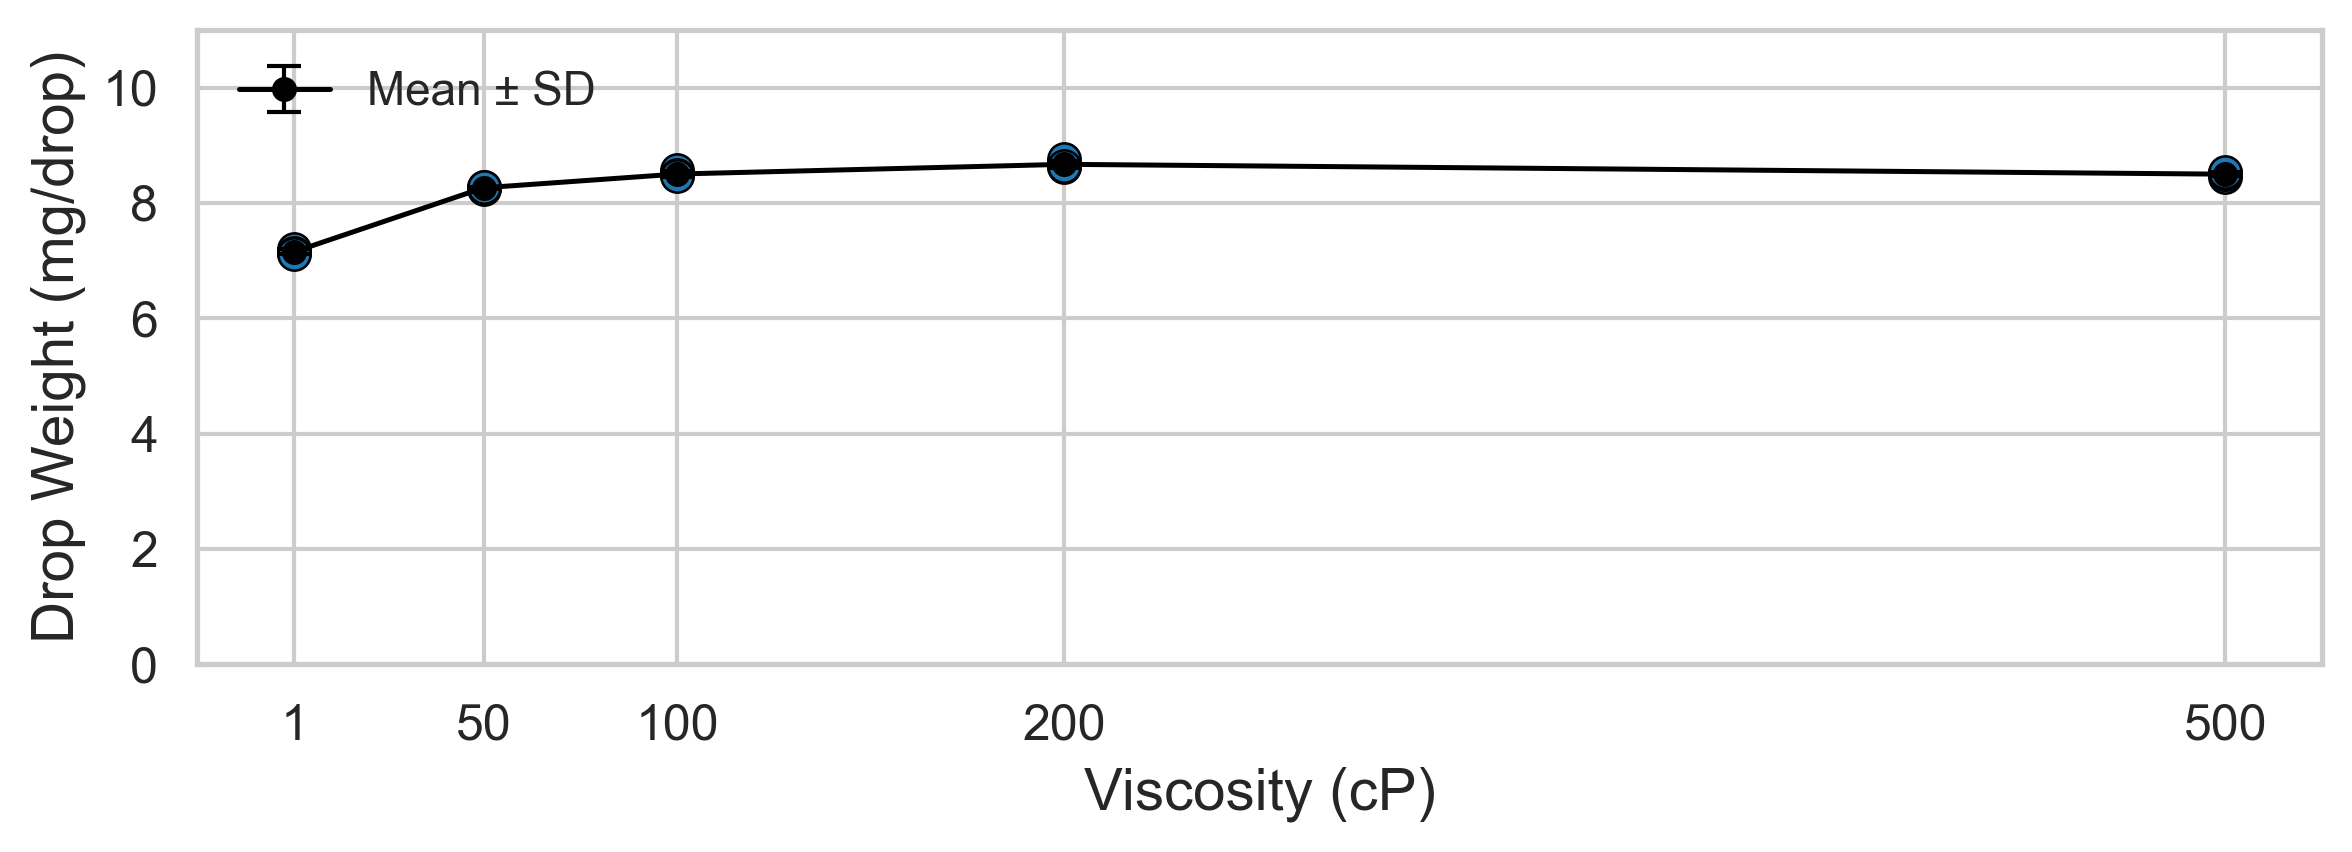

In [15]:
# =========================
# Summarize & Plot
# =========================
if df_results.empty:
    print("\n[WARN] No valid results to summarize.")
else:
    summary = (
        df_results.groupby("Viscosity (cP)", as_index=False)
        .agg(**{
            "Average (mg/drop)": ("mg/drop", "mean"),
            "Std Dev": ("mg/drop", "std"),
            "Replicates": ("mg/drop", "count"),
        })
        .sort_values("Viscosity (cP)")
    )

    print("\n=== Summary by Viscosity ===")
    print(summary.to_string(index=False))

    # For cleaner x-axis labels
    summary["ViscLabel"] = summary["Viscosity (cP)"].map(lambda v: f"{v:g}")
    unique_visc = summary["Viscosity (cP)"].to_numpy()

    # ---- Scatter plot of all replicates + mean line ----
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(8, 3), dpi=300, facecolor="white")
    ax = plt.gca()

    # Scatter: all replicates
    sns.scatterplot(
        data=df_results,
        x="Viscosity (cP)",
        y="mg/drop",
        s=60,
        color="tab:blue",
        edgecolor="black",
        ax=ax
    )

    # Mean ± std as a line with error bars
    ax.errorbar(
        summary["Viscosity (cP)"],
        summary["Average (mg/drop)"],
        yerr=summary["Std Dev"],
        fmt="-o",
        color="black",
        ecolor="black",
        elinewidth=1,
        capsize=4,
        markersize=5,
        linewidth=1.2,
        label="Mean ± SD"
    )

    # X-axis ticks at the viscosities you actually used
    ax.set_xticks(unique_visc)
    ax.set_xticklabels(summary["ViscLabel"], fontsize=12)

    ax.set_ylabel("Drop Weight (mg/drop)", fontsize=14)
    ax.set_xlabel("Viscosity (cP)", fontsize=14)
    ax.tick_params(axis="y", labelsize=12)
    ax.set_ylim(0, 11)  # adjust if needed

    ax.legend(frameon=False, fontsize=11, loc="upper left")

    plt.tight_layout()
    plt.show()


# NMR

[OK] Fraction 1: 50374 points loaded.


ppm  intensity
0  0.500033   -109.776
1  0.500272   -265.319
2  0.500510   -420.863
3  0.500748   -142.173
4  0.500986    136.516

[OK] Fraction 2: 50374 points loaded.


ppm  intensity
0  0.500074    456.158
1  0.500313    416.735
2  0.500551    377.312
3  0.500789    239.038
4  0.501027    100.763

[OK] Fraction 3: 50373 points loaded.


ppm  intensity
0  0.500130    346.813
1  0.500368    610.965
2  0.500606    875.118
3  0.500844   1139.270
4  0.501082    873.392

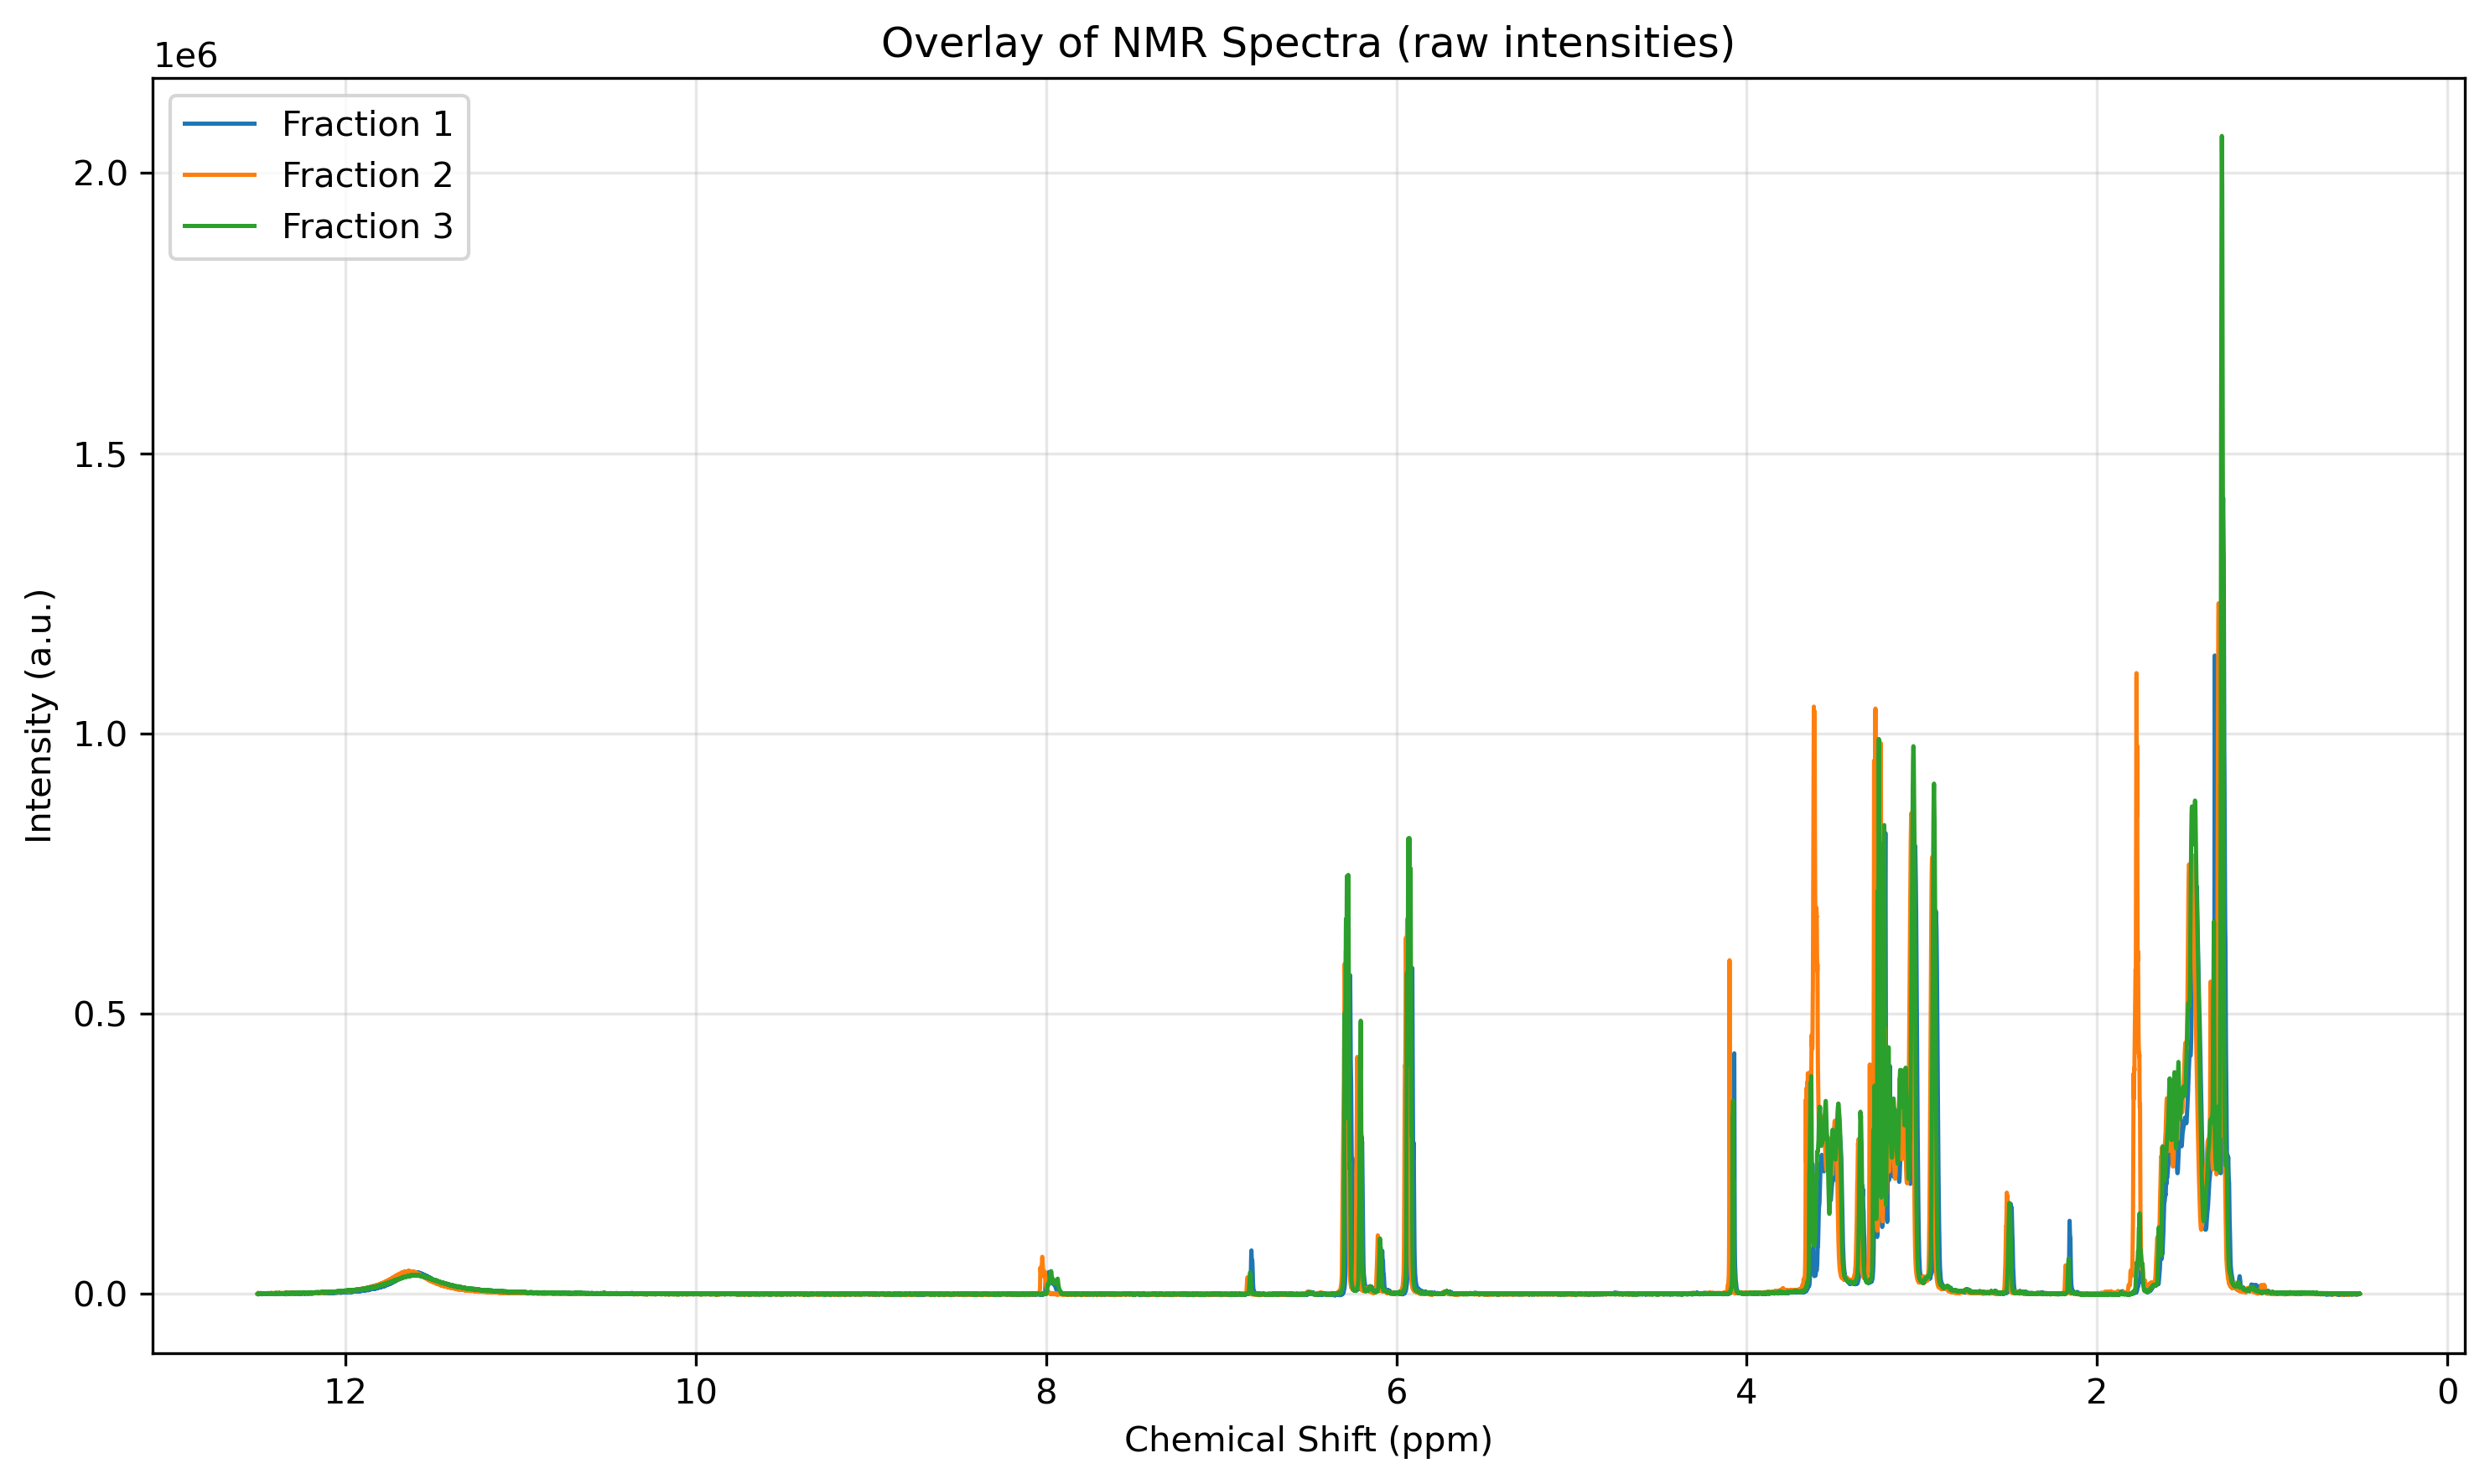

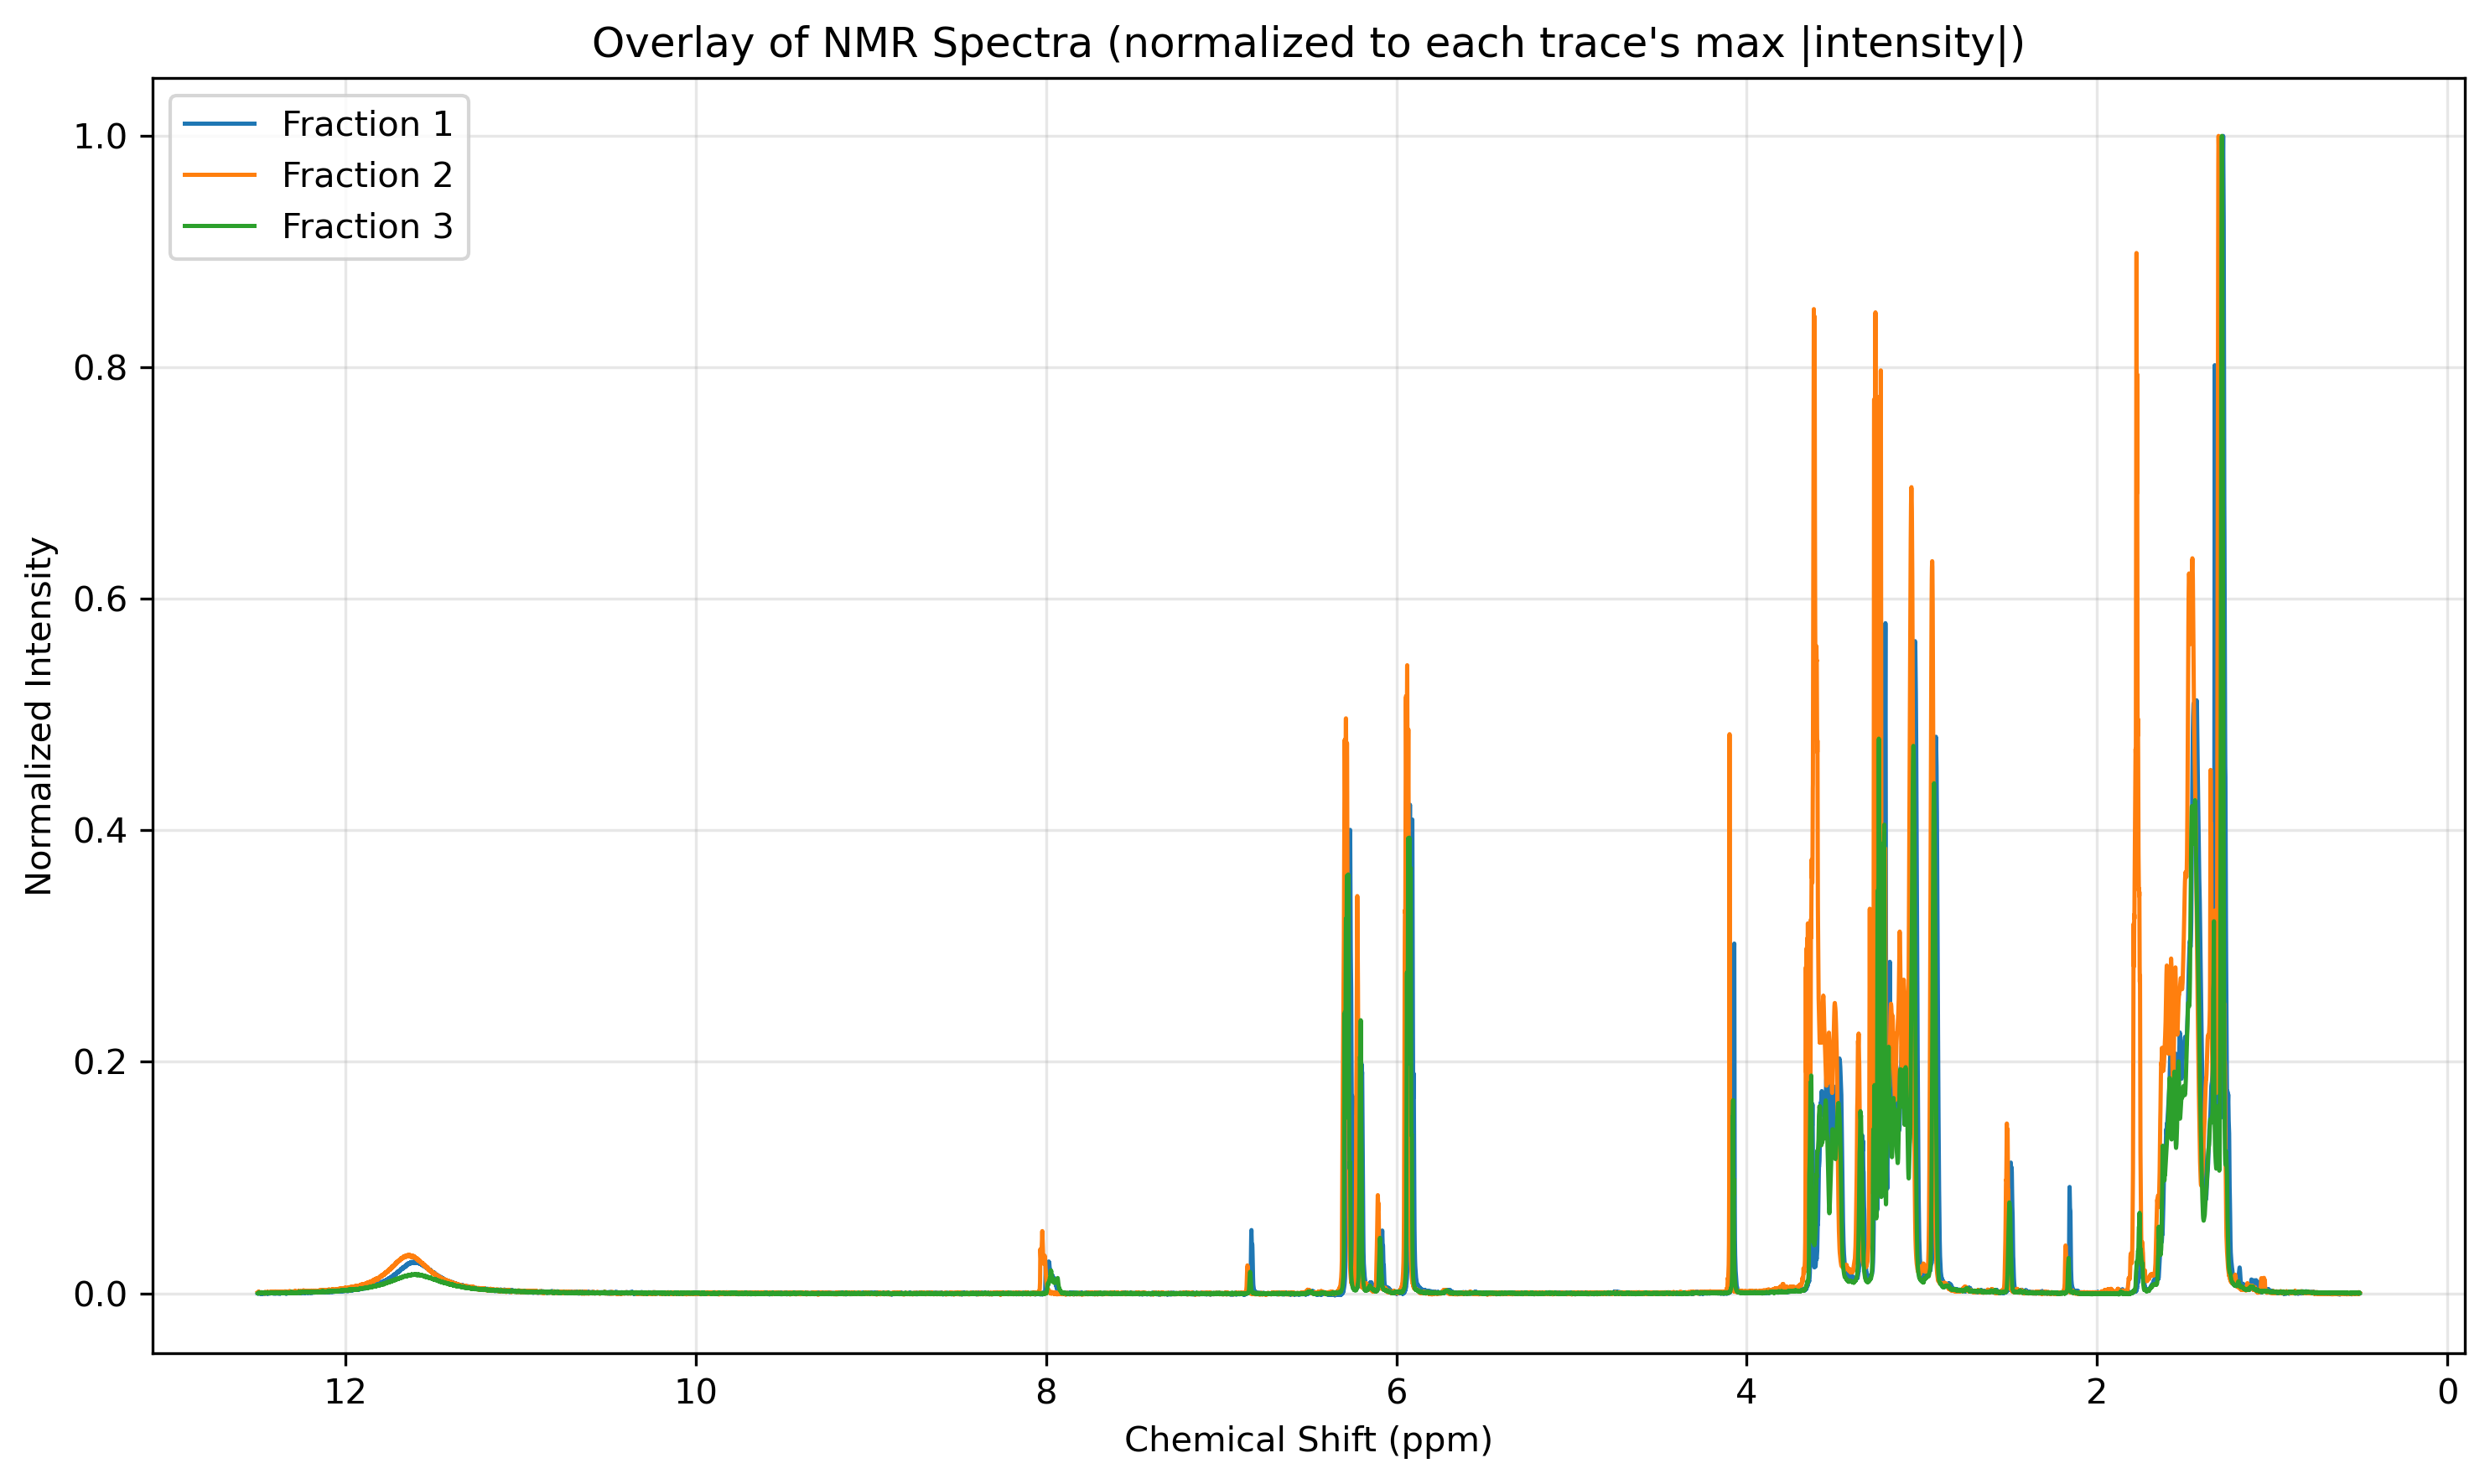

In [6]:
# --- NMR Overlay Plot (Jupyter Notebook version) ---
# Robustly parse 2-column NMR files (ppm, intensity) and overlay-plot (raw + normalized).

import re
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ---------- CONFIG ----------
# Update these paths to your NMR files (relative or absolute)
paths = [
    ("NMR_data/NMR HCW_8_1.csv", "Fraction 1"),
    ("NMR_data/NMR HCW_8_2.csv", "Fraction 2"),
    ("NMR_data/NMR HCW_8_3.csv", "Fraction 3"),
]
# ----------------------------


def load_two_cols_loose(path: str) -> pd.DataFrame:
    """
    Robustly parse a 2-column NMR file where columns are ppm and intensity.
    Splits each line on tabs, commas, semicolons, or whitespace.
    """
    rows = []
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            parts = re.split(r"[\t,; ]+", line)
            if len(parts) >= 2:
                try:
                    x = float(parts[0])
                    y = float(parts[1])
                    rows.append((x, y))
                except ValueError:
                    continue
    return pd.DataFrame(rows, columns=["ppm", "intensity"])


# --- Load Data ---
dfs = {}
for path, label in paths:
    if not Path(path).exists():
        print(f"[Warning] File not found: {path}")
        continue
    df = load_two_cols_loose(path)
    df = df.sort_values("ppm").reset_index(drop=True)
    dfs[label] = df
    print(f"[OK] {label}: {len(df)} points loaded.")
    display(df.head(5))

if not dfs:
    raise ValueError("No valid spectra found! Check file paths or format.")

# --- Overlay Plot (Raw) ---
plt.figure(figsize=(10, 6), dpi=300)
for label, df in dfs.items():
    plt.plot(df["ppm"], df["intensity"], label=label, lw=1.2)
plt.gca().invert_xaxis()
plt.xlabel("Chemical Shift (ppm)")
plt.ylabel("Intensity (a.u.)")
plt.title("Overlay of NMR Spectra (raw intensities)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Overlay Plot (Normalized) ---
plt.figure(figsize=(10, 6), dpi=300)
for label, df in dfs.items():
    y = df["intensity"].values
    y_norm = y / (abs(y).max() if abs(y).max() != 0 else 1.0)
    plt.plot(df["ppm"], y_norm, label=label, lw=1.2)
plt.gca().invert_xaxis()
plt.xlabel("Chemical Shift (ppm)")
plt.ylabel("Normalized Intensity")
plt.title("Overlay of NMR Spectra (normalized to each trace's max |intensity|)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


[OK] Fraction 1: 50374 points (baseline corrected)
[OK] Fraction 2: 50374 points (baseline corrected)
[OK] Fraction 3: 50373 points (baseline corrected)


Fraction  Fc area (set to 1)  COOH area (Fc-normalized)  COOH/Fc ratio
0  Fraction 1                 1.0                   6.064258       6.064258
1  Fraction 2                 1.0                   6.076283       6.076283
2  Fraction 3                 1.0                   5.319157       5.319157

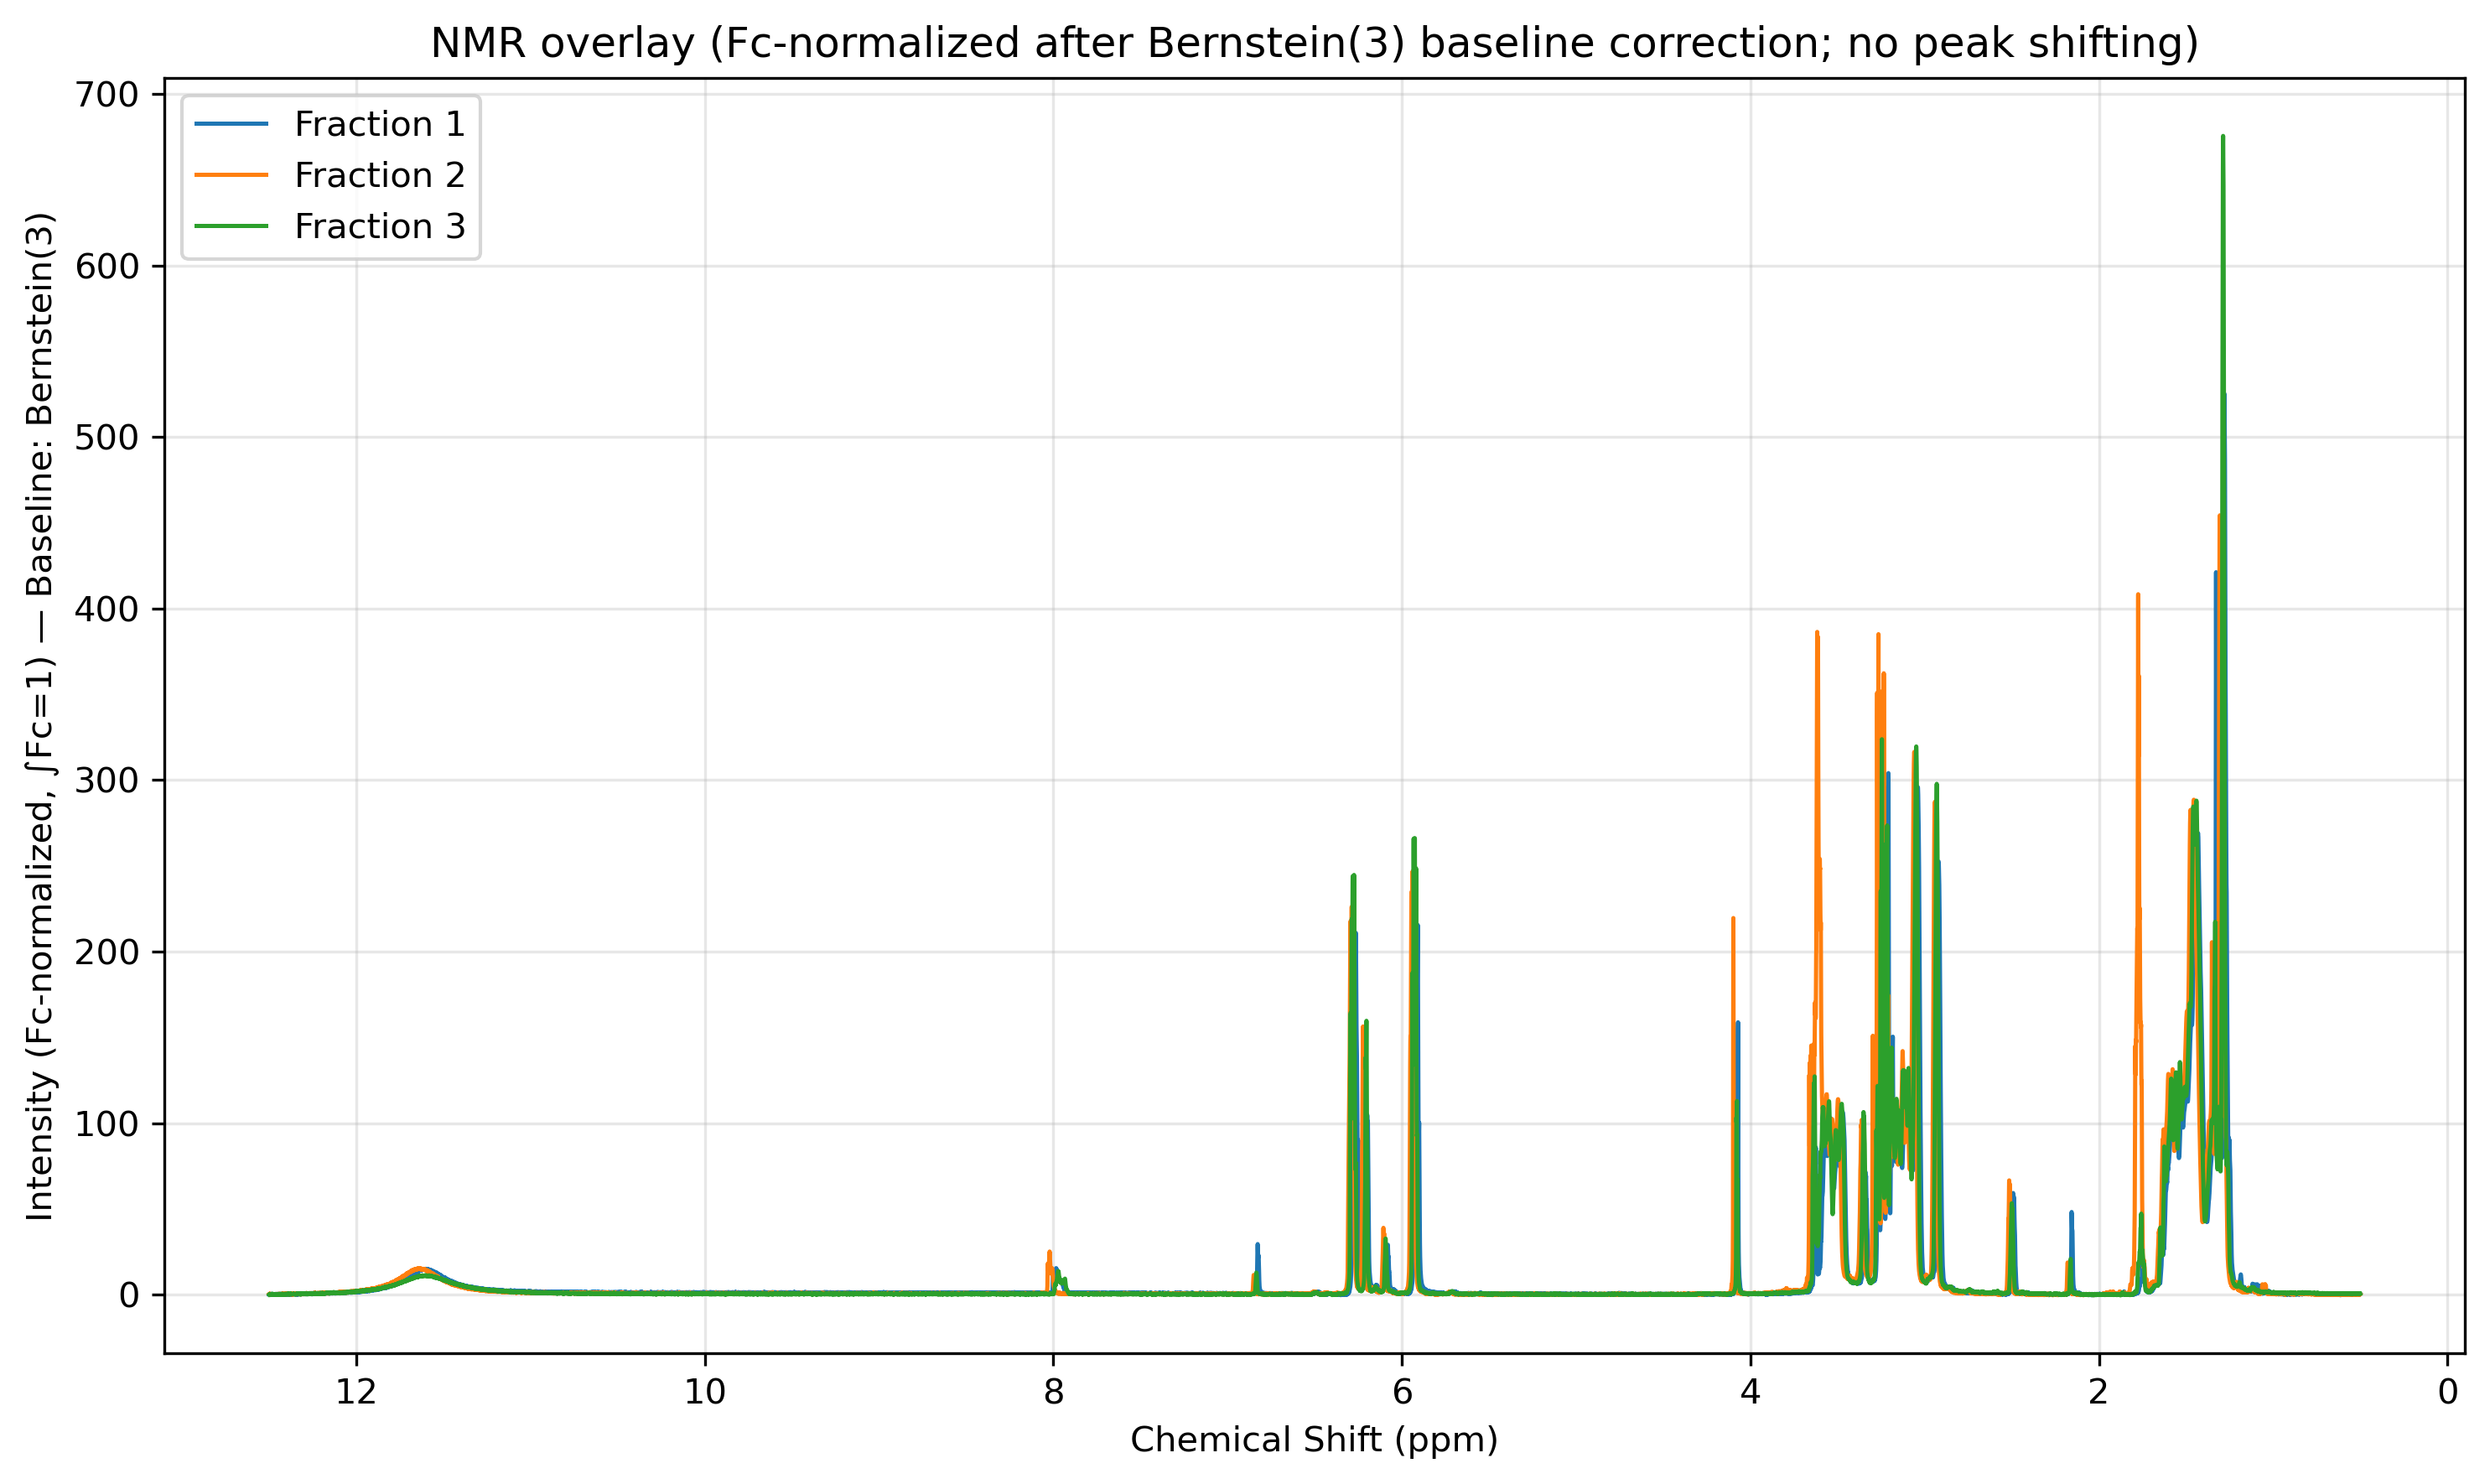

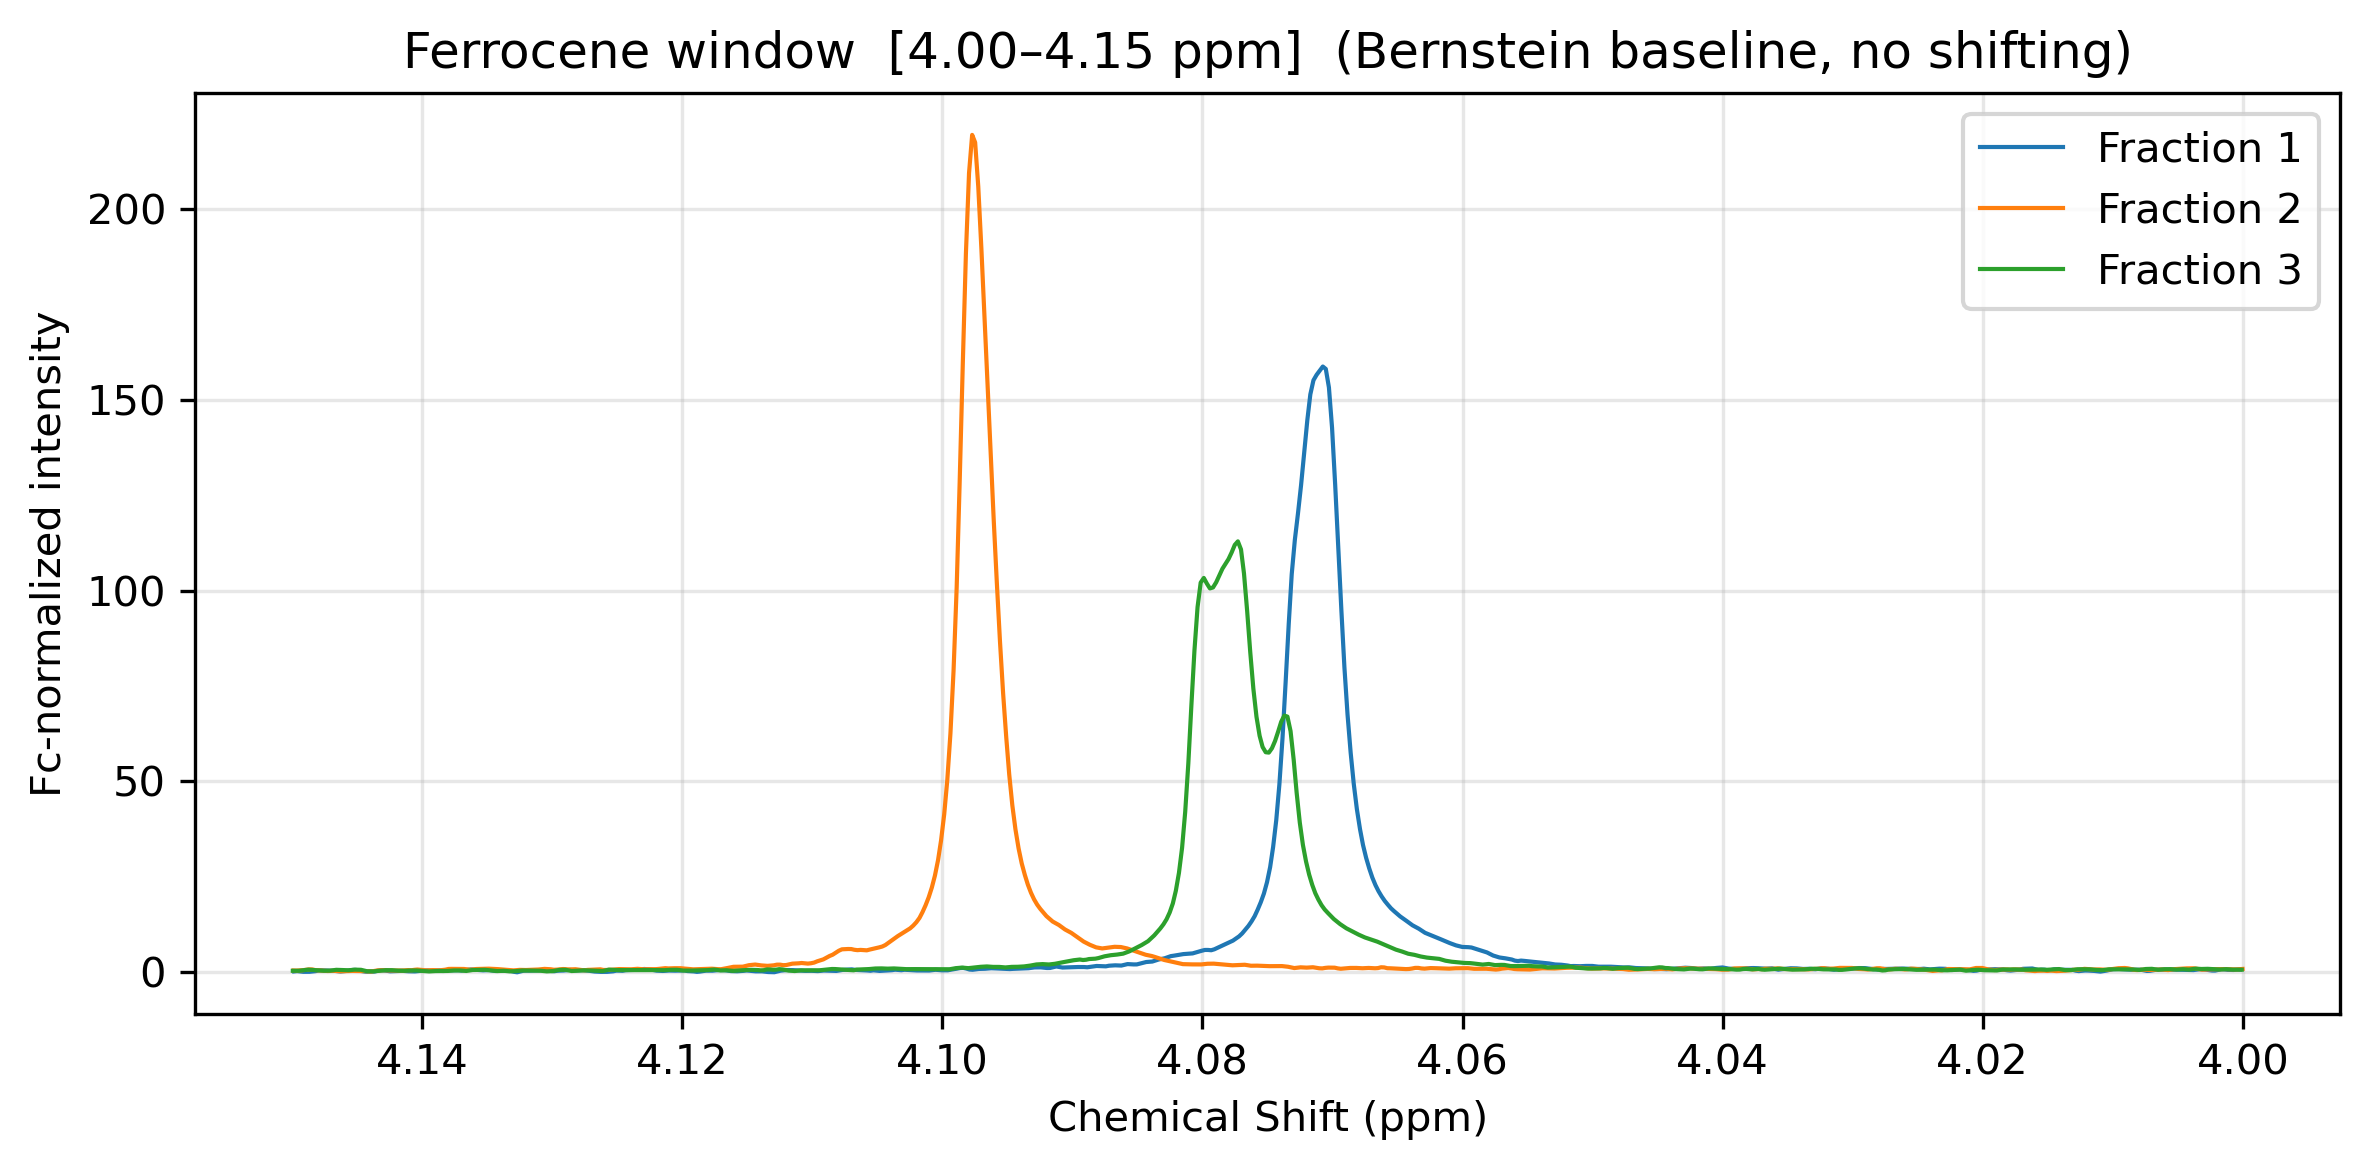

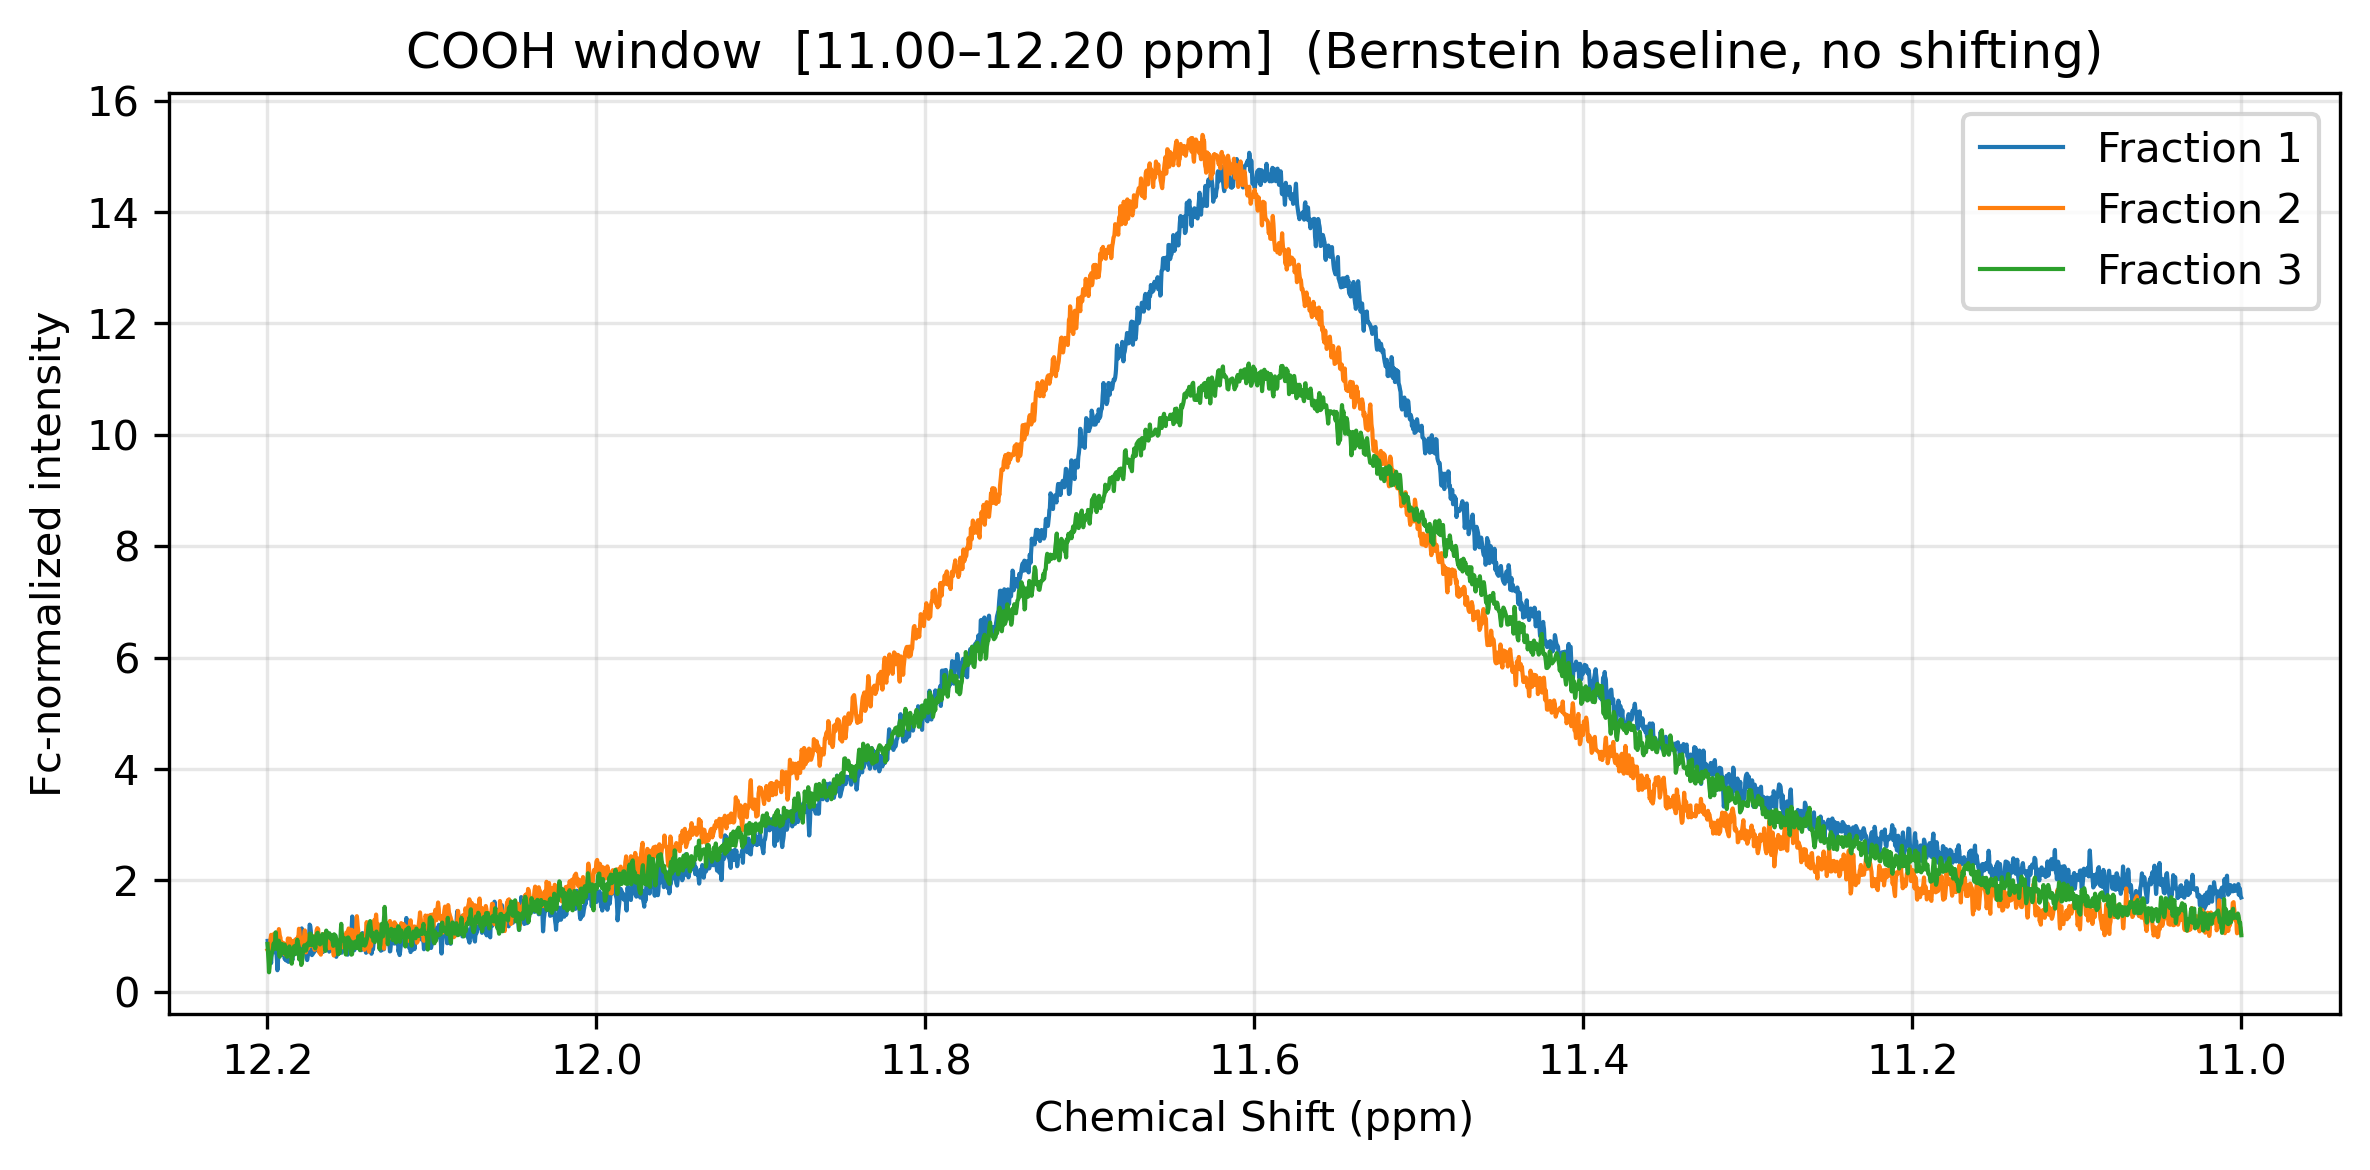

In [36]:
# --- Fc-normalized NMR overlay with Bernstein(3) baseline; NO PEAK SHIFTING ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import re
from typing import Optional

# ======== Config ========
paths = [
    ("NMR_data/NMR HCW_8_1.csv", "Fraction 1"),
    ("NMR_data/NMR HCW_8_2.csv", "Fraction 2"),
    ("NMR_data/NMR HCW_8_3.csv", "Fraction 3"),
]

# Integration windows (ppm) – adjust if needed
FERROCENE_WIN = (4.0, 4.15)   # ferrocene internal standard
COOH_WIN      = (11, 12.2)   # COOH proton

# Peak alignment disabled (per your request)
ALIGN_FC_TO_4PPM = False

# Bernstein baseline params
BERN_ORDER = 3       # polynomial order
N_ITER     = 100     # IRLS iterations
ASYM_P     = 0.0001    # asymmetry; smaller => baseline hugs lower envelope more
EPS        = 1e-15

# ======== Helpers ========
def load_two_cols_loose(path: str) -> pd.DataFrame:
    rows = []
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            parts = re.split(r"[\t,; ]+", line)
            if len(parts) >= 2:
                try:
                    x = float(parts[0]); y = float(parts[1])
                    rows.append((x, y))
                except ValueError:
                    continue
    df = pd.DataFrame(rows, columns=["ppm", "intensity"])
    return df.sort_values("ppm").reset_index(drop=True)

def slice_window(df: pd.DataFrame, win: tuple) -> pd.DataFrame:
    lo, hi = min(win), max(win)
    return df[(df["ppm"] >= lo) & (df["ppm"] <= hi) | (df["ppm"] >= hi) & (df["ppm"] <= lo)].copy()

def integrate_trapz(x: np.ndarray, y: np.ndarray) -> float:
    if x.size < 2: 
        return 0.0
    if x[1] < x[0]:  # if ppm decreases left-to-right, flip for trapz
        x = x[::-1]; y = y[::-1]
    return float(np.trapz(y, x))

def bernstein_basis(t: np.ndarray, n: int) -> np.ndarray:
    from math import comb
    B = np.empty((t.size, n+1), dtype=float)
    for k in range(n+1):
        B[:, k] = comb(n, k) * (t**k) * ((1 - t)**(n - k))
    return B

def bernstein_baseline(ppm: np.ndarray, y: np.ndarray,
                       order: int = 3, n_iter: int = 50, asym_p: float = 0.05) -> np.ndarray:
    """Fit a Bernstein polynomial baseline via IRLS with asymmetric weights."""
    x = np.asarray(ppm).ravel()
    z = np.asarray(y).ravel()
    x_min, x_max = x.min(), x.max()
    if np.isclose(x_max, x_min):
        return np.zeros_like(z)
    t = (x - x_min) / (x_max - x_min)

    B = bernstein_basis(t, order)
    w = np.ones_like(z)

    for _ in range(max(1, n_iter)):
        BW = B * w[:, None]
        M  = B.T @ BW
        rhs = BW.T @ z
        M_reg = M + 1e-12 * np.eye(M.shape[0])  # tiny Tikhonov
        c = np.linalg.solve(M_reg, rhs)
        y_hat = B @ c
        r = z - y_hat
        w = np.where(r > 0, asym_p, 1.0)  # downweight positive residuals (peaks)
    return y_hat

# ======== Load, baseline-correct, normalize (∫Fc=1), integrate COOH ========
spectra = {}
for p, label in paths:
    if not Path(p).exists():
        print(f"[Warning] File not found: {p}")
        continue
    df = load_two_cols_loose(p)
    base = bernstein_baseline(df["ppm"].values, df["intensity"].values,
                              order=BERN_ORDER, n_iter=N_ITER, asym_p=ASYM_P)
    df["intensity_bc"] = df["intensity"].values - base
    spectra[label] = df
    print(f"[OK] {label}: {len(df)} points (baseline corrected)")

# NO PEAK SHIFTING
results_rows = []
normed_spectra = {}
for label, df in spectra.items():
    # Use baseline-corrected intensity for integration and normalization
    df_use = df[["ppm", "intensity_bc"]].copy().rename(columns={"intensity_bc": "intensity"})

    # Ferrocene area
    fc_seg = slice_window(df_use, FERROCENE_WIN)
    fc_area = integrate_trapz(fc_seg["ppm"].values, fc_seg["intensity"].values) if not fc_seg.empty else 0.0

    if abs(fc_area) < 1e-12:
        print(f"[Warn] {label}: Fc area ~ 0; cannot normalize. Using scale=1.")
        scale = 1.0
    else:
        scale = 1.0 / fc_area

    dfn = df.copy()
    dfn["intensity_norm"] = dfn["intensity_bc"].values * scale
    normed_spectra[label] = dfn

    # COOH integral on normalized (baseline-corrected) trace
    cooh_input = dfn[["ppm", "intensity_norm"]].rename(columns={"intensity_norm": "intensity"})
    cooh_seg   = slice_window(cooh_input, COOH_WIN)
    cooh_area  = integrate_trapz(cooh_seg["ppm"].values, cooh_seg["intensity"].values) if not cooh_seg.empty else 0.0

    results_rows.append({
        "Fraction": label,
        "Fc area (set to 1)": 1.0 if abs(fc_area) >= 1e-12 else np.nan,
        "COOH area (Fc-normalized)": cooh_area,
        "COOH/Fc ratio": cooh_area,  # since Fc = 1
    })

results = pd.DataFrame(results_rows).sort_values("Fraction").reset_index(drop=True)
display(results)

# ======== Plots ========
plt.figure(figsize=(10, 6), dpi=300, facecolor="white")
for label, dfn in normed_spectra.items():
    plt.plot(dfn["ppm"], dfn["intensity_norm"], label=label, lw=1.2)
plt.gca().invert_xaxis()
plt.xlabel("Chemical Shift (ppm)")
plt.ylabel("Intensity (Fc-normalized, ∫Fc=1) — Baseline: Bernstein(3)")
plt.title("NMR overlay (Fc-normalized after Bernstein(3) baseline correction; no peak shifting)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Optional zooms
for title, win in [("Ferrocene window", FERROCENE_WIN), ("COOH window", COOH_WIN)]:
    plt.figure(figsize=(8, 4), dpi=300, facecolor="white")
    for label, dfn in normed_spectra.items():
        seg = slice_window(dfn[["ppm", "intensity_norm"]].rename(columns={"intensity_norm":"intensity"}), win)
        if seg.empty: 
            continue
        plt.plot(seg["ppm"], seg["intensity"], label=label, lw=1.0)
    plt.gca().invert_xaxis()
    plt.xlabel("Chemical Shift (ppm)")
    plt.ylabel("Fc-normalized intensity")
    plt.title(f"{title}  [{min(win):.2f}–{max(win):.2f} ppm]  (Bernstein baseline, no shifting)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


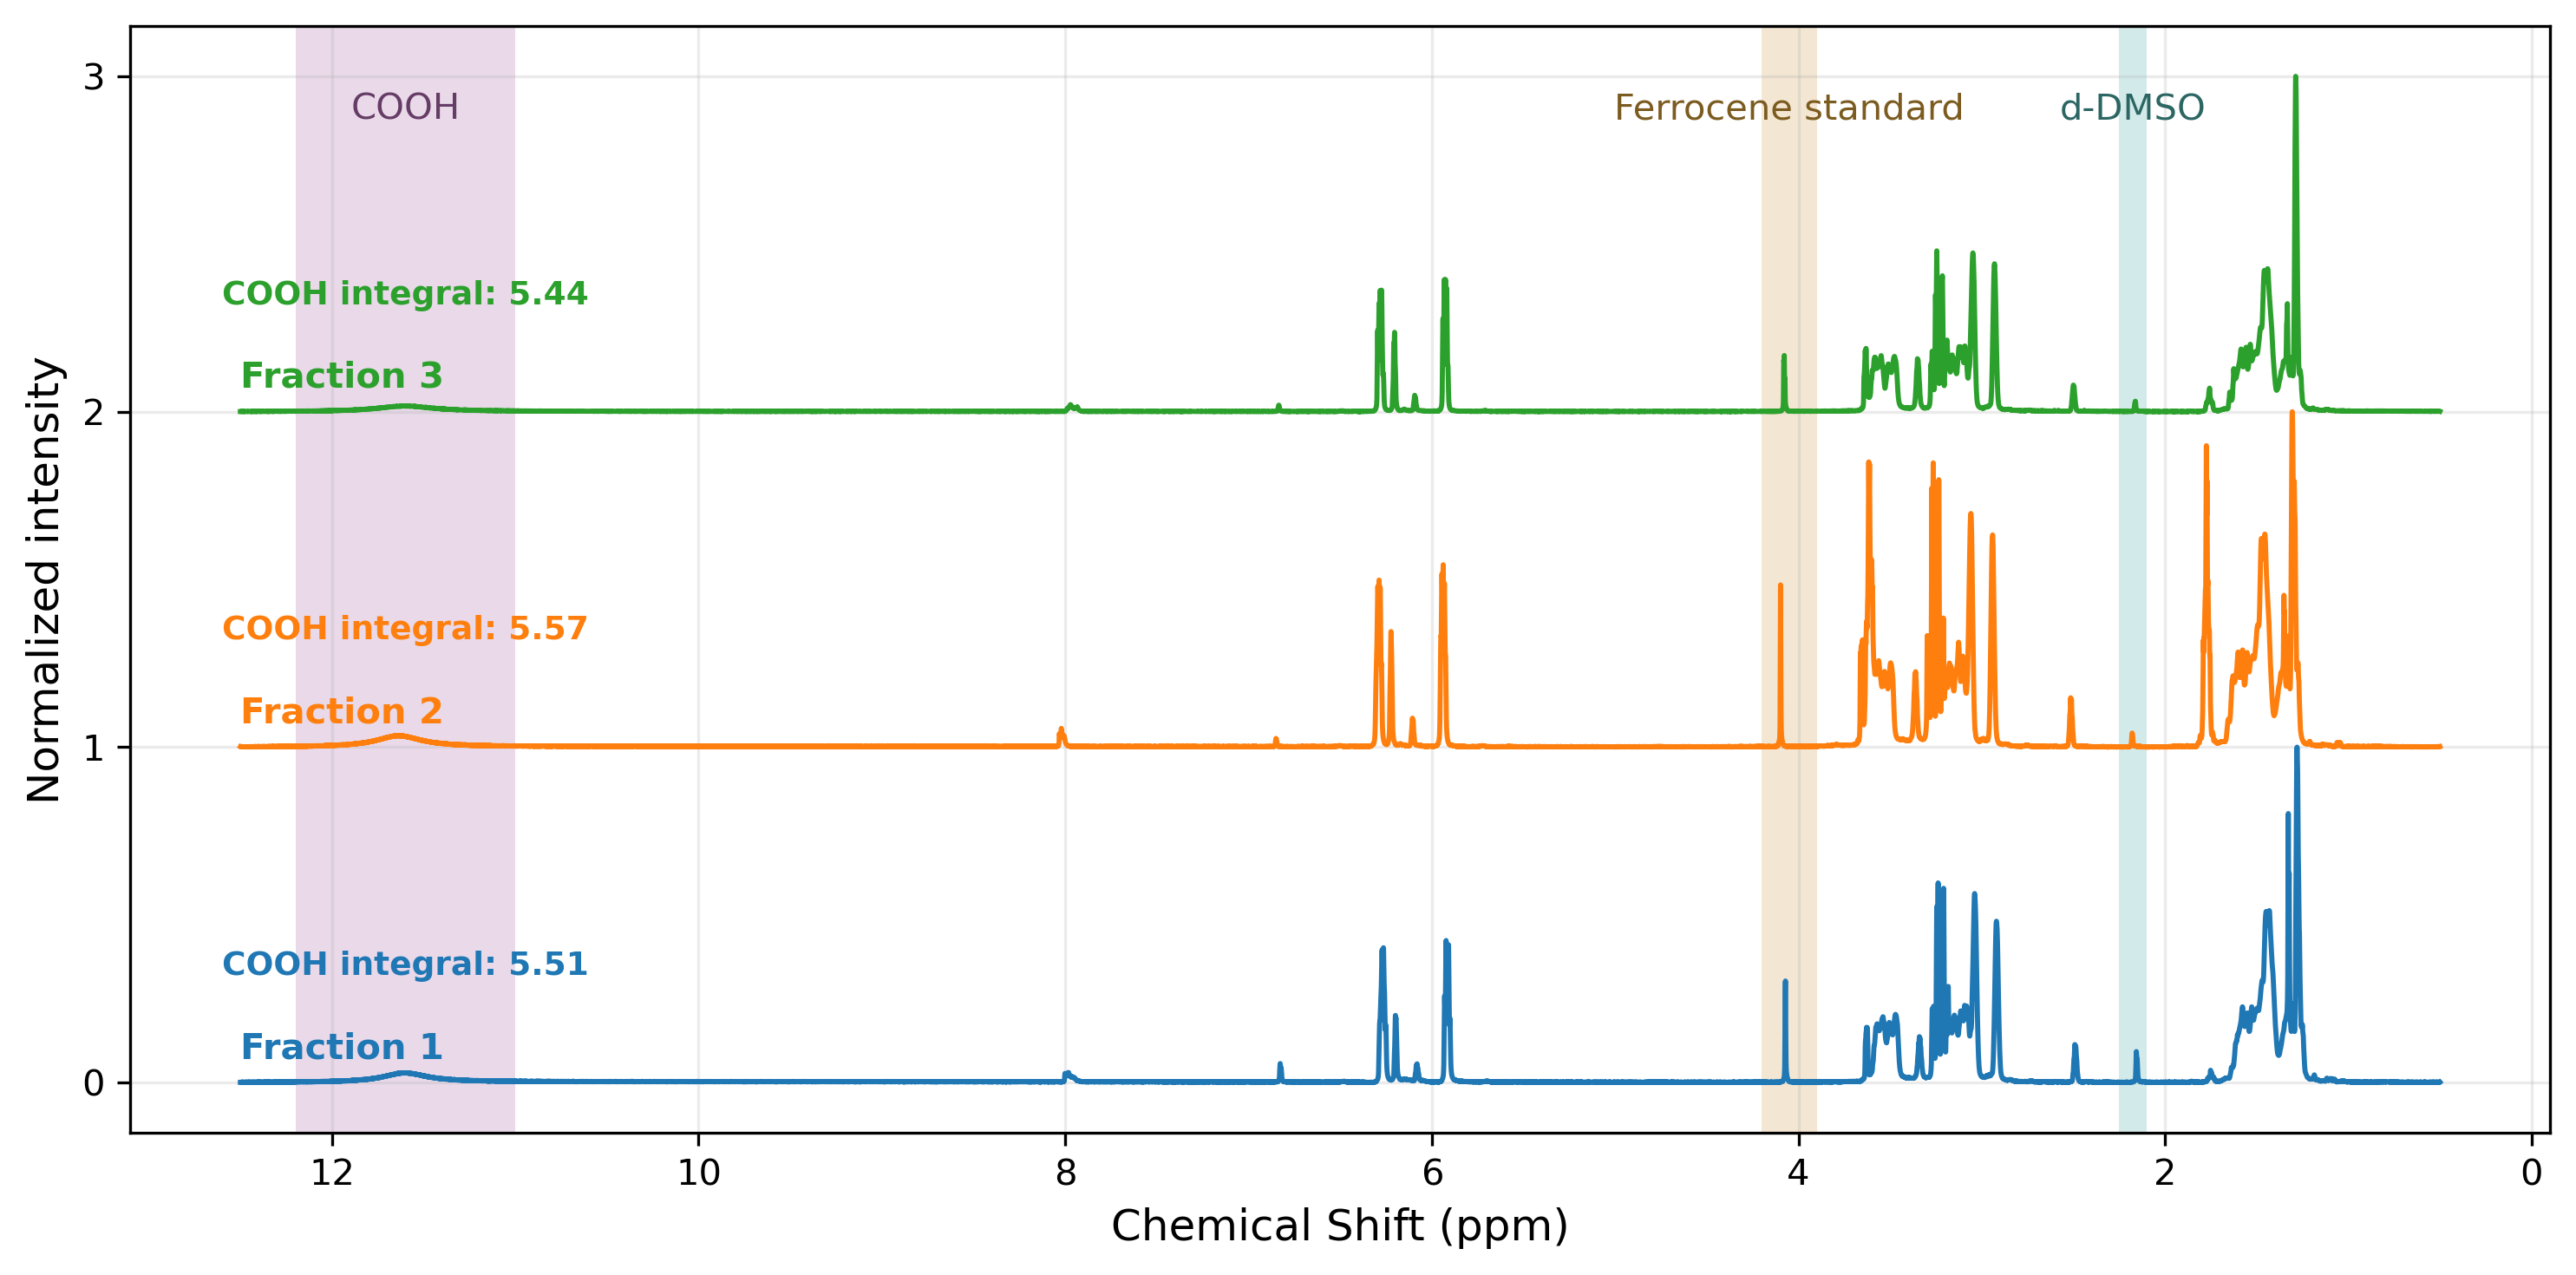

In [76]:
# === NMR min–max normalized (0–1 per trace) with Bernstein(3) baseline + STACKED (+1) and shaded regions ===
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from math import comb
from matplotlib.ticker import MaxNLocator

# -----------------------------
# Config
# -----------------------------
paths = [
    ("NMR_data/NMR HCW_8_1.csv", "Fraction 1"),
    ("NMR_data/NMR HCW_8_2.csv", "Fraction 2"),
    ("NMR_data/NMR HCW_8_3.csv", "Fraction 3"),
]

# Regions (ppm)
FERROCENE_WIN = (3.9, 4.2)
COOH_WIN      = (11.00, 12.20)
DMSO_WIN      = (2.10, 2.25)

# Baseline params
BERN_ORDER = 3
N_ITER     = 100
ASYM_P     = 1e-4
EPS        = 1e-15

STACK_STEP = 1.0

# -----------------------------
# Helpers
# -----------------------------
def load_two_cols_loose(path: str) -> pd.DataFrame:
    rows = []
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            parts = re.split(r"[\t,; ]+", line)
            if len(parts) >= 2:
                try:
                    x = float(parts[0]); y = float(parts[1])
                    rows.append((x, y))
                except ValueError:
                    continue
    if not rows:
        return pd.DataFrame(columns=["ppm","intensity"])
    df = pd.DataFrame(rows, columns=["ppm","intensity"])
    return df.sort_values("ppm").reset_index(drop=True)

def bernstein_basis(t: np.ndarray, n: int) -> np.ndarray:
    t = np.asarray(t).ravel()
    B = np.empty((t.size, n + 1), dtype=float)
    for k in range(n + 1):
        B[:, k] = comb(n, k) * (t ** k) * ((1 - t) ** (n - k))
    return B

def bernstein_baseline(ppm: np.ndarray, y: np.ndarray,
                       order: int = 3, n_iter: int = 50, asym_p: float = 0.05) -> np.ndarray:
    x = np.asarray(ppm).ravel()
    z = np.asarray(y).ravel()
    if x.size == 0:
        return np.zeros_like(z)
    x_min, x_max = np.min(x), np.max(x)
    if np.isclose(x_max, x_min):
        return np.zeros_like(z)
    t = (x - x_min) / (x_max - x_min)
    B = bernstein_basis(t, order)
    w = np.ones_like(z)
    for _ in range(max(1, n_iter)):
        BW  = B * w[:, None]
        M   = B.T @ BW
        rhs = BW.T @ z
        M_reg = M + 1e-12 * np.eye(M.shape[0])
        c = np.linalg.solve(M_reg, rhs)
        y_hat = B @ c
        r = z - y_hat
        w = np.where(r > 0, asym_p, 1.0)
    return y_hat

# -----------------------------
# Load, baseline-correct, normalize
# -----------------------------
normed_spectra = {}
for path, label in paths:
    if not Path(path).exists():
        print(f"[Warning] Not found: {path}")
        continue
    df = load_two_cols_loose(path)
    baseline = bernstein_baseline(df["ppm"].values, df["intensity"].values,
                                  order=BERN_ORDER, n_iter=N_ITER, asym_p=ASYM_P)
    y_bc = df["intensity"].values - baseline
    y_min, y_max = np.min(y_bc), np.max(y_bc)
    denom = (y_max - y_min) if (y_max - y_min) > EPS else 1.0
    y_norm_01 = (y_bc - y_min) / denom
    df["intensity_bc"] = y_bc
    df["intensity_norm_01"] = y_norm_01
    normed_spectra[label] = df

# -----------------------------
# Plot stacked spectra
# -----------------------------
fig, ax = plt.subplots(figsize=(10, 5), dpi=300, facecolor="white")

labels_in_order = list(normed_spectra.keys())
offsets = {lab: i * STACK_STEP for i, lab in enumerate(labels_in_order)}

# --- refined neutral pastel palette ---
FC_SHADE_COLOR   = "#E2C290"  # warm sand/gold
COOH_SHADE_COLOR = "#C8A2C8"  # lilac
DMSO_SHADE_COLOR = "#8FCBC8"  # teal-mint
SHADE_ALPHA      = 0.40

FC_TITLE_COLOR   = "#7B5B1F"
COOH_TITLE_COLOR = "#653C65"
DMSO_TITLE_COLOR = "#2C6663"

# Plot spectra
line_colors = {}
for lab in labels_in_order:
    dfn = normed_spectra[lab]
    x, y = dfn["ppm"].values, dfn["intensity_norm_01"].values + offsets[lab]
    line, = ax.plot(x, y, lw=1.4)
    line_colors[lab] = line.get_color()
    # Label fraction
    x_right = np.nanmax(x)
    idx = np.nanargmin(np.abs(x - x_right))
    ax.text(x_right, y[idx] + 0.1, f"{lab}", fontsize=10,
            color=line_colors[lab], fontweight="bold", va="center")

# --- shaded regions ---
fc_lo, fc_hi = sorted(FERROCENE_WIN)
cooh_lo, cooh_hi = sorted(COOH_WIN)
dmso_lo, dmso_hi = sorted(DMSO_WIN)
ax.axvspan(fc_lo, fc_hi, facecolor=FC_SHADE_COLOR, alpha=SHADE_ALPHA, zorder=0)
ax.axvspan(cooh_lo, cooh_hi, facecolor=COOH_SHADE_COLOR, alpha=SHADE_ALPHA, zorder=0)
ax.axvspan(dmso_lo, dmso_hi, facecolor=DMSO_SHADE_COLOR, alpha=SHADE_ALPHA, zorder=0)

# Titles for shaded regions
ax.relim(); ax.autoscale_view()
ymin, ymax = ax.get_ylim()
ytop = ymax - 0.06 * (ymax - ymin)
ax.text((fc_lo + fc_hi)/2,   ytop, "Ferrocene standard", ha="center", va="top",
        fontsize=10, color=FC_TITLE_COLOR)
ax.text((cooh_lo + cooh_hi)/2, ytop, "COOH", ha="center", va="top",
        fontsize=10, color=COOH_TITLE_COLOR)
ax.text((dmso_lo + dmso_hi)/2, ytop, "d-DMSO", ha="center", va="top",
        fontsize=10, color=DMSO_TITLE_COLOR)

# Optional COOH integral labels
cooh_integrals = {"Fraction 1": 5.51, "Fraction 2": 5.57, "Fraction 3": 5.44}
for lab in labels_in_order:
    if lab in cooh_integrals:
        x_mid = (cooh_lo + cooh_hi) / 2
        ax.text(x_mid, offsets[lab] + 0.3, f"COOH integral: {cooh_integrals[lab]:.2f}",
                ha="center", va="bottom", fontsize=9,
                color=line_colors[lab], fontweight="bold")

# Formatting
ax.invert_xaxis()
ax.set_xlabel("Chemical Shift (ppm)", fontsize=12)
ax.set_ylabel("Normalized intensity", fontsize=12)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(lambda v, pos: f"{int(v)}")
ax.grid(alpha=0.25)
fig.tight_layout()
plt.show()


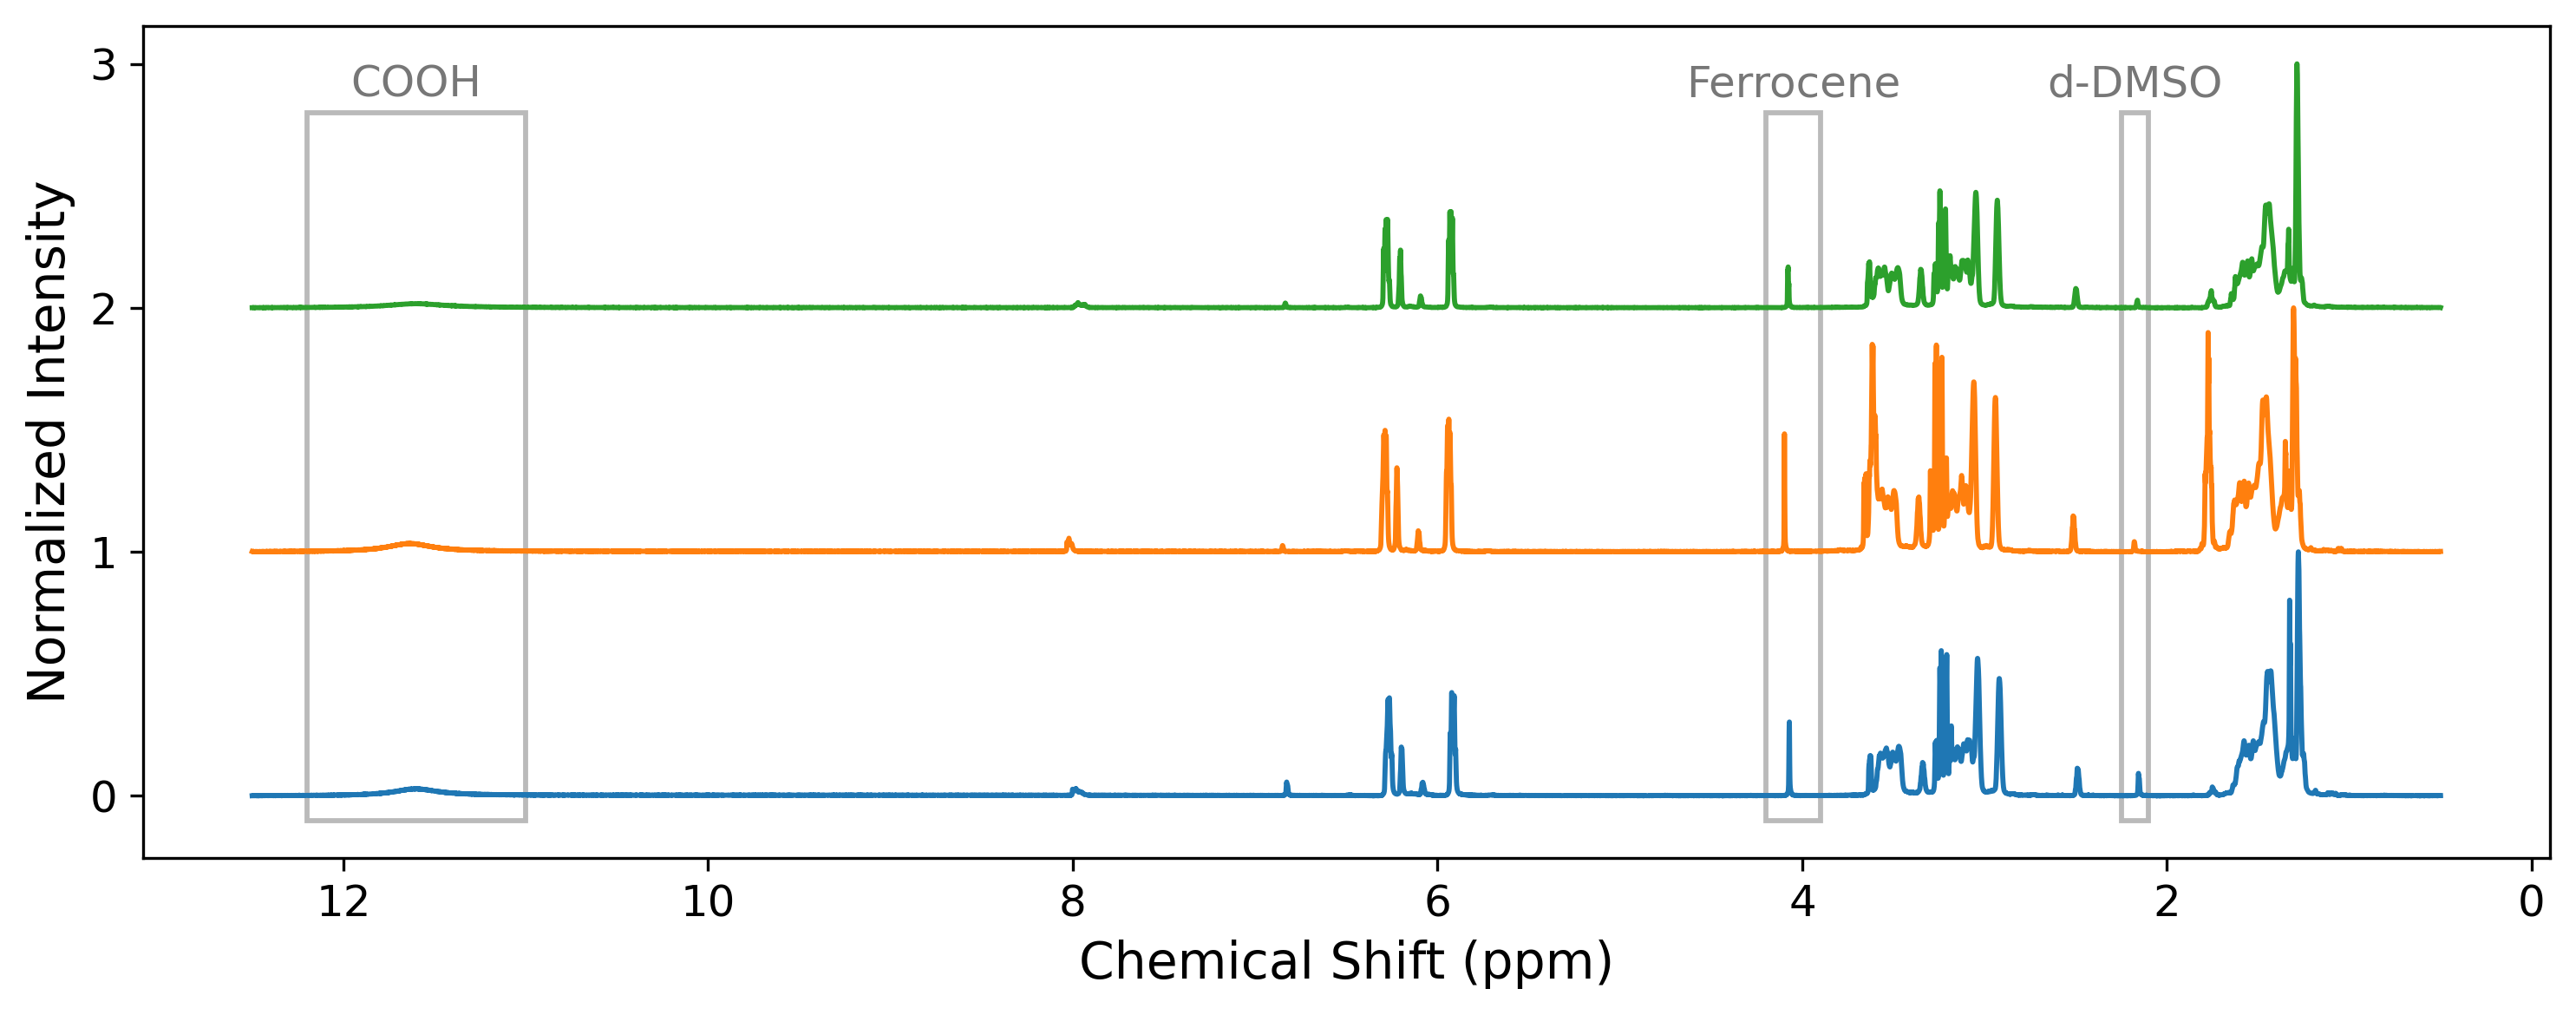

In [4]:
# === NMR min–max normalized (0–1 per trace) with Bernstein(3) baseline + STACKED (+1) and hollow grey boxes ===
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.ticker import MaxNLocator
from pathlib import Path
from math import comb

# -----------------------------
# Config
# -----------------------------
paths = [
    ("NMR_data/NMR HCW_8_1.csv", "Fraction 1"),
    ("NMR_data/NMR HCW_8_2.csv", "Fraction 2"),
    ("NMR_data/NMR HCW_8_3.csv", "Fraction 3"),
]

# Regions (ppm)
FERROCENE_WIN = (3.9, 4.2)
COOH_WIN      = (11.00, 12.20)
DMSO_WIN      = (2.10, 2.25)

# Baseline params
BERN_ORDER = 3
N_ITER     = 100
ASYM_P     = 1e-4
EPS        = 1e-15

STACK_STEP = 1.0

# -----------------------------
# Helpers
# -----------------------------
def load_two_cols_loose(path: str) -> pd.DataFrame:
    rows = []
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            parts = re.split(r"[\t,; ]+", line)
            if len(parts) >= 2:
                try:
                    x = float(parts[0]); y = float(parts[1])
                    rows.append((x, y))
                except ValueError:
                    continue
    if not rows:
        return pd.DataFrame(columns=["ppm","intensity"])
    df = pd.DataFrame(rows, columns=["ppm","intensity"])
    return df.sort_values("ppm").reset_index(drop=True)

def bernstein_basis(t: np.ndarray, n: int) -> np.ndarray:
    t = np.asarray(t).ravel()
    B = np.empty((t.size, n + 1), dtype=float)
    for k in range(n + 1):
        B[:, k] = comb(n, k) * (t ** k) * ((1 - t) ** (n - k))
    return B

def bernstein_baseline(ppm: np.ndarray, y: np.ndarray,
                       order: int = 3, n_iter: int = 50, asym_p: float = 0.05) -> np.ndarray:
    x = np.asarray(ppm).ravel()
    z = np.asarray(y).ravel()
    if x.size == 0:
        return np.zeros_like(z)
    x_min, x_max = np.min(x), np.max(x)
    if np.isclose(x_max, x_min):
        return np.zeros_like(z)
    t = (x - x_min) / (x_max - x_min)
    B = bernstein_basis(t, order)
    w = np.ones_like(z)
    for _ in range(max(1, n_iter)):
        BW  = B * w[:, None]
        M   = B.T @ BW
        rhs = BW.T @ z
        M_reg = M + 1e-12 * np.eye(M.shape[0])
        c = np.linalg.solve(M_reg, rhs)
        y_hat = B @ c
        r = z - y_hat
        w = np.where(r > 0, asym_p, 1.0)
    return y_hat

# -----------------------------
# Load, baseline-correct, normalize
# -----------------------------
normed_spectra = {}
for path, label in paths:
    if not Path(path).exists():
        print(f"[Warning] Not found: {path}")
        continue
    df = load_two_cols_loose(path)
    baseline = bernstein_baseline(df["ppm"].values, df["intensity"].values,
                                  order=BERN_ORDER, n_iter=N_ITER, asym_p=ASYM_P)
    y_bc = df["intensity"].values - baseline
    y_min, y_max = np.min(y_bc), np.max(y_bc)
    denom = (y_max - y_min) if (y_max - y_min) > EPS else 1.0
    y_norm_01 = (y_bc - y_min) / denom
    df["intensity_bc"] = y_bc
    df["intensity_norm_01"] = y_norm_01
    normed_spectra[label] = df

# -----------------------------
# Plot stacked spectra
# -----------------------------
fig, ax = plt.subplots(figsize=(10, 4), dpi=300, facecolor="white")

labels_in_order = list(normed_spectra.keys())
offsets = {lab: i * STACK_STEP for i, lab in enumerate(labels_in_order)}

# Plot spectra and annotations
line_colors = {}
for lab in labels_in_order:
    dfn = normed_spectra[lab]
    x, y = dfn["ppm"].values, dfn["intensity_norm_01"].values + offsets[lab]
    line, = ax.plot(x, y, lw=1.4)
    line_colors[lab] = line.get_color()
    # Label fraction on the right
    x_right = np.nanmax(x)
    idx = np.nanargmin(np.abs(x - x_right))
    # ax.text(x_right, y[idx] + 0.1, f"{lab}", fontsize=10,
    #         color=line_colors[lab], fontweight="bold", va="center")

# ---- Hollow grey boxes for key regions ----
EDGE_GREY = "#777777"
TEXT_GREY = "#777777"
BOX_LW    = 1.4
Y0, YH    = -0.1, 2.9  # covers three stacked bands

def draw_box(win, label):
    lo, hi = sorted(win)
    rect = Rectangle((lo, Y0), hi - lo, YH, fill=False,
                     edgecolor=EDGE_GREY, linewidth=BOX_LW, zorder=0.5, alpha=0.5)
    ax.add_patch(rect)
    ax.text((lo + hi) / 2, YH + 0.1, label, ha="center", va="top",
            fontsize=12, color=TEXT_GREY)

draw_box(FERROCENE_WIN, "Ferrocene")
draw_box(COOH_WIN,      "COOH")
draw_box(DMSO_WIN,      "d-DMSO")

# ---- COOH integral labels ----
# cooh_integrals = {"Fraction 1": 5.51, "Fraction 2": 5.57, "Fraction 3": 5.44}
# for lab in labels_in_order:
#     if lab in cooh_integrals:
#         x_mid = (COOH_WIN[0] + COOH_WIN[1]) / 2
#         ax.text(x_mid, offsets[lab] + 0.3, f"COOH integral: {cooh_integrals[lab]:.2f}",
#                 ha="center", va="bottom", fontsize=9,
#                 color=line_colors[lab], fontweight="bold")

# ---- Formatting ----
ax.invert_xaxis()
ax.set_xlabel("Chemical Shift (ppm)", fontsize=14)
ax.set_ylabel("Normalized Intensity", fontsize=14)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(lambda v, pos: f"{int(v)}")
# tick sizes
ax.tick_params(axis="both", which="major", labelsize=12)
#ax.grid(alpha=0.25)
fig.tight_layout()
plt.show()
